In [3]:
# Preamble

## Matplotlib Configuration
import matplotlib.pyplot as plt
import matplotlib

%precision 1
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
set_matplotlib_formats('png')

#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## Other Crap
import numpy as np
import scipy as sp
import sympy as sym
from instrumental import Q_, u
import sys
import h5py
#matplotlib.rc('text', usetex=True)
#matplotlib.rc('xtick', labelsize=16) 
#matplotlib.rc('ytick', labelsize=16)
#matplotlib.rcParams.update({'axes.labelsize': 20,'axes.titlesize': 20,'axes.facecolor': '0.9','font.size': 14 })
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath,bm}"]
np.set_printoptions(precision=3)
%precision %.3g
import  matplotlib.cm as cm
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import trapz, cumtrapz
from matplotlib.colors import  ListedColormap, LogNorm, Normalize, BoundaryNorm
import matplotlib.patches as patches
from scipy.optimize import minimize_scalar
from scipy.signal import square
from scipy.integrate import solve_ivp
from scipy.signal import blackman
from scipy.fftpack import fft
from os import path
from datetime import datetime
import time
fig_dir = '/Users/doddgray/Google Drive/figs'
data_dir = '/Volumes/USB20FD/sweep3_mat'
import sympy as sy
from time import sleep
import pickle
#import RII_db_tools as rii
#rii.RII_db_dir = '/Users/doddgray/Google Drive/notebooks/RII_db'
import warnings
warnings.filterwarnings('ignore') # set back to 'default' to see warnings again.
#warnings.filterwarnings('default')
colors = ['r','b','g','m','c','k','orange','purple']
from instrumental import instrument, list_instruments, list_visa_instruments
from glob import glob
#from instrumental.optics.optical_elements import Mirror, Lens, Space, Interface
#import instrumental.optics.beam_tools as bt
#import instrumental.optics.beam_plotting as bp
import os

# add MATLAB's parula colormap because it's nice

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
plt.register_cmap(cmap=parula)
# define lowest common multiple function for use in Herriott cell modeling
import fractions
def lcm(a,b): return abs(a * b) / fractions.gcd(a,b) if a and b else 0

# functions for twiny plotting (dual unit x axes sharing ticks)
def lm2f_tickfn(X):
    X_lm = X * u.nm
    X_f = (u.speed_of_light / X_lm ).to(u.THz).m
    return ["%3.3f" % z for z in X_f]

def lm2f_tickfn_offset(X,offset):
    X_lm = X * u.nm
    offset_lm = offset * u.nm
    X_f_GHz = (u.speed_of_light / X_lm ).to(u.GHz).m
    offset_f_GHz = (u.speed_of_light / offset_lm ).to(u.GHz).m
    offset_f_THz = (u.speed_of_light / offset_lm ).to(u.THz).m
    X_offset_GHz = X_f_GHz - offset_f_GHz
    return "{:3.3f}".format(offset_f_THz), ["%3.1f" % z for z in X_offset_GHz]

def f2lm_tickfn(X):
    X_f = X * u.THz
    X_lm = (u.speed_of_light / X_f ).to(u.nm).m
    return ["%4.3f" % z for z in X_lm]

def lm2f_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(lm2f_tickfn(ticks))
    ax2.set_xlabel('frequency [THz]')
    return ax2

def lm2f_twiny_offset(ax,offset=None):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    if offset is None:
        offset = np.median(ticks)
    offset_THz_str, tick_str_list = lm2f_tickfn_offset(ticks,offset)
    ax2.set_xticklabels(tick_str_list)
    ax2.set_xlabel('frequency [GHz] offset from ' + offset_THz_str + ' THz')
    return ax2



def f2lm_twiny(ax):
    ax2=ax.twiny()
    ticks = ax.get_xticks()
    ax2.set_xticks(ticks)
    ax2.set_xbound(ax.get_xbound())
    ax2.set_xticklabels(f2lm_tickfn(ticks))
    ax2.set_xlabel('wavelength [nm]')
    return ax2

scope_plot_params = {"lines.color": "white",
                    "patch.edgecolor": "white",
                    "text.color": "black",
                    "axes.facecolor": "black",
                    "axes.edgecolor": "lightgray",
                    "axes.labelcolor": "white",
                    "xtick.color": "white",
                    "ytick.color": "white",
                    "grid.color": "lightgray",
                    "figure.facecolor": "black",
                    "figure.edgecolor": "black",
                    "savefig.facecolor": "black",
                    "savefig.edgecolor": "black",
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'font.size': 20,
                    'lines.linewidth': 1,
                    'axes.linewidth': 2,
                    'axes.grid': True,}

my_default_plot_params = {'savefig.dpi': 75,
                    'figure.autolayout': False,
                    'figure.figsize': (10, 6),
                    'font.size': 16,
                    'lines.linewidth': 2.0,
                    'lines.markersize': 8,
                    'legend.fontsize': 14,
                    'text.usetex': False,
                    'font.family': "serif",
                    'font.serif': "cm",
                    'xtick.labelsize': 20,
                    'ytick.labelsize': 20,
                    'axes.labelsize': 20,
                    'axes.titlesize': 20,
                    'font.size': 20,
                    'lines.linewidth': 2,
                    'axes.linewidth': 1.5,
                    "grid.color": '#707070',
                    'grid.linestyle':':',
                    'grid.linewidth':1,
                    'axes.grid': True,
                    'axes.grid.axis': 'both',
                    'axes.grid.which': 'both',
                    'image.cmap':'parula'}

plt.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update(my_default_plot_params)
%matplotlib inline

C:\Users\Lab\Miniconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Define functions

## data load functions

In [7]:
# define data load functions

# lab computer dirs
# scope_data_dir = 'C:/Users/Lab/Google Drive/data/'
# agilent_data_dir = 'C:/Users/Lab/agilent_scope_data'

# mac laptop dirs
scope_data_dir = '/Users/doddgray/Google Drive/data'
agilent_data_dir = '/Users/doddgray/Box Sync/IMEC Kerr Free Carrier Rings/agilent_scope_data'
#agilent_data_dir = '/Users/doddgray/Box Sync/IMEC Kerr Free Carrier Rings/agilent_scope_data/IMEC V1 Wirebond Batch 2 Chip 2 FC Kerr ring spectra'

# load data from tek scope

def load_scope_trace(name='',data_dir=scope_data_dir,latest_file=True,verbose=False):
    if latest_file:
        file_list =  glob(path.normpath(data_dir)+path.normpath('/Tektronix_MSO_scope_trace_' + name + '_*'))
        latest_file = max(file_list,key=path.getctime)
        if verbose:
            print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
        data = np.load(latest_file)
    else:
        fpath = path.normpath(path.join(data_dir,name))
        if verbose:
            print_statusline('Loading ' + name +' trace from file: ' + path.basename(fpath))
        data = np.load(fpath)
    t = data[:,0] * u.second
    V = data[:,1] * u.volt
    return t,V

# load data from Agilent 6GHz scope
## warning! these are large arrays, probably good to process them one at a time and and then delete the variables to avoid 
## memory leaks

def load_agilent_trace(name='',data_dir=agilent_data_dir,verbose=False):
    file_list =  glob(path.normpath(data_dir)+path.normpath('/Agilent_54855A_scope_trace_' + name + '_*'))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
    with h5py.File(latest_file, 'r') as f:
        t0 = f['t0'][0] * u.second
        dt = f['dt'][0] * u.second
        V = f['V'][:] * u.volt
    nt = len(V)
    t = np.linspace(t0,t0+nt*dt,nt) * u.second
    return t,V

def Vrb_sweep_load(Vrb_list,set_dir='C:/Users/Lab/agilent_scope_data',use_P_T_slow_bg=True):
    # first find length of traces by loading first trace from the first Vrb value
    Vrb0 = Vrb_list[0]
    t,P_T_slow_V0 = load_scope_trace(name='Vrb{:2.1f}_tek_ch1_P_trans_slow'.format(Vrb0.m),data_dir=set_dir)
    # find V_P_T_slow background voltage if needed
    if use_P_T_slow_bg:
        t, V_P_T_slow_bg = load_scope_trace(name='tek_ch1_P_trans_slow_bg',data_dir=set_dir)
        V_P_T_slow_bg = V_P_T_slow_bg.mean()
    else:
        V_P_T_slow_bg = Q_(0.0, u.volt)
    # create arrays to hold loaded data
    L = len(P_T_slow_V0)
    V_P_T_slow = np.zeros((L,len(Vrb_list)))*u.volt
    V_P_ref = np.zeros((L,len(Vrb_list)))*u.volt
    V_mod = np.zeros((L,len(Vrb_list)))*u.volt
    V_I_TPA = np.zeros((L,len(Vrb_list)))*u.volt
    # load data into newly created arrays
    for Vind, VV in enumerate(Vrb_list):
        t,V_P_T_slow_raw =load_scope_trace(name='Vrb{:2.1f}_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir)
        V_P_T_slow[:,Vind] = V_P_T_slow_raw - V_P_T_slow_bg
        t,V_P_ref[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir)
        t,V_mod[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir)
        t,V_I_TPA[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir)
    return {'Vrb_list':Vrb_list,'t':t,'V_P_T_slow':V_P_T_slow,'V_P_ref':V_P_ref,'V_mod':V_mod,'V_I_TPA':V_I_TPA}


def Vrb_sweep_load_new(Vrb_list,set_dir='C:/Users/Lab/agilent_scope_data',use_P_T_slow_bg=True):
    # first find length of traces by loading first trace from the first Vrb value
    Vrb0 = Vrb_list[0]
    t,P_T_slow_V0 = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_sb_on_tek_ch1_P_trans_slow'.format(Vrb0.m),data_dir=set_dir)
    # find V_P_T_slow background voltage if needed
    if use_P_T_slow_bg:
        t, V_P_T_slow_bg = load_scope_trace(name='tek_ch1_P_trans_slow_bg',data_dir=set_dir)
        V_P_T_slow_bg = V_P_T_slow_bg.mean()
    else:
        V_P_T_slow_bg = Q_(0.0, u.volt)
    # create arrays to hold loaded data
    L = len(P_T_slow_V0)
    V_P_T_slow = np.zeros((L,len(Vrb_list)))*u.volt
    V_P_ref = np.zeros((L,len(Vrb_list)))*u.volt
    V_mod = np.zeros((L,len(Vrb_list)))*u.volt
    V_I_TPA = np.zeros((L,len(Vrb_list)))*u.volt
    # load data into newly created arrays
    for Vind, VV in enumerate(Vrb_list):
        t,V_P_T_slow_raw =load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_sb_on_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir)
        V_P_T_slow[:,Vind] = V_P_T_slow_raw - V_P_T_slow_bg
        t,V_P_ref[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_sb_on_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir)
        t,V_mod[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_sb_on_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir)
        t,V_I_TPA[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_sb_on_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir)
        t,V_P_T_slow_sb_raw =load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_sb_on_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir)
        V_P_T_slow_sb[:,Vind] = V_P_T_slow_raw_sb - V_P_T_slow_bg
        t,V_P_ref_sb[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_sb_on_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir)
        t,V_mod_sb[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_sb_on_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir)
        t,V_I_TPA_sb[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_sb_on_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir)
    return {'Vrb_list':Vrb_list,'t':t,'V_P_T_slow':V_P_T_slow,'V_P_ref':V_P_ref,'V_mod':V_mod,'V_I_TPA':V_I_TPA,'V_P_T_slow_sb':V_P_T_slow_sb,'V_P_ref_sb':V_P_ref_sb,'V_mod_sb':V_mod_sb,'V_I_TPA_sb':V_I_TPA_sb}


def load_agilent_trace(name='',data_dir='C:/Users/Lab/agilent_scope_data',verbose=False):
    file_list =  glob(path.normpath(data_dir)+path.normpath('/Agilent_54855A_scope_trace_' + name + '_*'))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
    with h5py.File(latest_file, 'r') as f:
        t0 = f['t0'][0] * u.second
        dt = f['dt'][0] * u.second
        V = f['V'][:] * u.volt
    nt = len(V)
    t = np.linspace(t0,t0+nt*dt,nt) * u.second
    return t,V


## data processing functions

In [8]:
# define data processing functions

##### Lorentzian fitting ######
from scipy.optimize import curve_fit


# define lorentzian fitting functions

def lorentzian(x, A, x0, FWHM):
    """
    Lorentzian curve. Takes an array ``x`` and returns an array
    :math:`\\frac{A}{1 + (\\frac{2(x-x0)}{FWHM})^2}`
    """
    return A / (1 + ( 2*(x-x0)/FWHM )**2)

def lorentzian_reflection(nu, A0, nu0, FWHM):
    """
    Lorentzian curve. Takes an array ``x`` and returns an array
    :math:`\\frac{A}{1 + (\\frac{2(x-x0)}{FWHM})^2}`
    """
    return 1 - A0 / (1 + ( 2*(nu-nu0)/FWHM )**2)

def offset_lorentzian(x, A, x0, FWHM,y0):
    """
    Lorentzian curve. Takes an array ``x`` and returns an array
    :math:`\\frac{A}{1 + (\\frac{2(x-x0)}{FWHM})^2}`
    """
    return A / (1 + ( 2*(x-x0)/FWHM )**2) + y0

def offset_lorentzian_reflection(nu, A0, nu0, FWHM,y0):
    """
    Lorentzian curve. Takes an array ``x`` and returns an array
    :math:`\\frac{A}{1 + (\\frac{2(x-x0)}{FWHM})^2}`
    """
    return (1 - A0 / (1 + ( 2*(nu-nu0)/FWHM )**2)) + y0

def double_lorentzian(t, A0, FWHM, t0, dt):
    """
    Triple lorentzian curve. Takes an array ``t`` and returns an array
    that is the sum of three lorentzians
    ``lorentzian(t, A0, t0, FWHM) + lorentzian(nu, B0, nu0-dt_sb, FWHM)
    + lorentzian(t, B0, t0+dt_sb, FWHM)``.
    """
    l1 = lorentzian(t, A0, t0-dt/2.0, FWHM)
    l2 = lorentzian(t, A0, t0+dt/2.0, FWHM)
    return l1 + l2 

def triple_lorentzian(t, A0, B0, FWHM, t0, dt_sb):
    """
    Triple lorentzian curve. Takes an array ``t`` and returns an array
    that is the sum of three lorentzians
    ``lorentzian(t, A0, t0, FWHM) + lorentzian(nu, B0, nu0-dt_sb, FWHM)
    + lorentzian(t, B0, t0+dt_sb, FWHM)``.
    """
    l1 = lorentzian(t, A0, t0, FWHM)
    l2 = lorentzian(t, B0, t0-dt_sb, FWHM)
    l3 = lorentzian(t, B0, t0+dt_sb, FWHM)
    return l1 + l2 + l3 


def triple_double_lorentzian(t, A0, B0, FWHM, t0, dt, dt_sb):
    """
    Triple lorentzian curve. Takes an array ``t`` and returns an array
    that is the sum of three lorentzians
    ``lorentzian(t, A0, t0, FWHM) + lorentzian(nu, B0, nu0-dt_sb, FWHM)
    + lorentzian(t, B0, t0+dt_sb, FWHM)``.
    """
    l1 = lorentzian(t, A0, t0-dt/2.0, FWHM)
    l2 = lorentzian(t, A0, t0+dt/2.0, FWHM)
    l3 = lorentzian(t, B0, t0-dt_sb-dt/2.0, FWHM)
    l4 = lorentzian(t, B0, t0-dt_sb+dt/2.0, FWHM)
    l5 = lorentzian(t, B0, t0+dt_sb-dt/2.0, FWHM)
    l6 = lorentzian(t, B0, t0+dt_sb+dt/2.0, FWHM)
    return l1 + l2 + l3 + l4 + l5 + l6

def triple_lorentzian_freq(f, A0, B0, FWHM, f0, df_sb):
    """
    Triple lorentzian curve. Takes an array ``t`` and returns an array
    that is the sum of three lorentzians
    ``lorentzian(t, A0, t0, FWHM) + lorentzian(nu, B0, nu0-dt_sb, FWHM)
    + lorentzian(t, B0, t0+dt_sb, FWHM)``.
    """
    l1 = lorentzian(f, A0, f0, FWHM)
    l2 = lorentzian(f, B0, f0-df_sb, FWHM)
    l3 = lorentzian(f, B0, f0+df_sb, FWHM)
    return l1 + l2 + l3 


def _estimate_FWHM_pint(t, amp, half_max, left_limit, center, right_limit,verbose=False):
    """ Pint-friendly way to estimate FWHM. Doesn't use 'bad' numpy stuff. Edited by Dodd to work on a time
    x-axis (ms) rather than frequency (MHz) as Nate originally wrote.  
    """
    if verbose:
        print('entering estimate_FWHM_pint')
        print('half_max: {}'.format(half_max))
        print('t[0]: {}'.format(t[0]))
        print('left_limit: {}'.format(left_limit))
        print('center: {}'.format(center))
        print('right_limit: {}'.format(right_limit))
    left_sum, right_sum = 0 * u.ms, 0 * u.ms
    divisor = 0
    i = 0
    while t[i] < left_limit:
        #print('loop 1, i={}'.format(i))
        i += 1

    while t[i] < center:
        if amp[i-1] <= half_max and amp[i] > half_max:
            if verbose:
                print('entered loop2 conditional!')
                print('i={}'.format(i))
                print('amp[i-1]={}'.format(amp[i-1]))
            left_sum += t[i]
            divisor += 1
        i += 1

    if verbose:
        print('after loops 1 and 2, i={}'.format(i))
    left_mean = left_sum / divisor
    divisor = 0

    while t[i] < right_limit:
        if amp[i-1] >= half_max and amp[i] < half_max:
            right_sum += t[i]
            divisor += 1
        i += 1
    right_mean = right_sum / divisor
    return right_mean - left_mean

def _estimate_FWHM(nu, amp, half_max, left_limit, center, right_limit):
    # Get x values of points where the data crosses half_max
    all_points = extract(diff(sign(amp-half_max)), nu)

    # Filter out the crossings from the sidebands
    middle_points = extract(logical_and(left_limit < all_points, all_points < right_limit),
                            all_points)
    center_index = searchsorted(middle_points, center)
    FWHM = middle_points[center_index:].mean() - middle_points[:center_index].mean()
    return FWHM

# # scales and offsets
# t0_norm = 3.5 * u.ms
# t1_norm = 3.9 * u.ms
# t0 = -4.5 * u.ms
# t1 = -0.2 * u.ms
# f_eom = 7.81 * u.GHz
# t_sb_guess = 1.3 * u.ms # time from line center to sideband peak
# T_center_peak_guess = 0.35 
# T_sb_peak_guess = 0.18 
# # T_y_offset = -0.0264 # measured using triple lorentzian fit, scaled
# # I think this is because I forgot to take a background trace immediately after this sweep
# # I'm using the background from the previous sweep but it seems to be a tiny bit off


def sweep_triple_lorentzian_fit(data,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,
                                f_eom,t_sb_guess,T_sb_peak_guess,t_max_range=2*u.us):
    # find ratio between V_P_T_slow in time range V_P_ref during which laser is off resonance.
    # take mean over this time range and then mean of this mean over all Vrb values to find
    # a single scale factor. assume 0 offset on V_P_T_slow.
    t = data['t'].to(u.ms)
    V_P_T_norm = data['V_P_T_slow']
    V_P_ref_norm = data['V_P_ref']
    V_P_T_norm_lim = V_P_T_norm[(t<t1_norm)*(t>t0_norm),:]
    V_P_ref_norm_lim = V_P_ref_norm[(t<t1_norm)*(t>t0_norm),:]
    T_scale_list = np.mean(V_P_T_norm_lim/V_P_ref_norm_lim, axis=0)
    T_scale = T_scale_list.mean()
    # use scale factor and triple lorentzian fit time range to create fit input data
    T_rel = ( data['V_P_T_slow'] / data['V_P_ref'] )  / T_scale 
    T_rel_lim = 1-T_rel[(t>t0)*(t<t1),:]
    t_lim = t[(t>t0)*(t<t1)]
    # find remaining offset from T=0 in offset time range and subtract on a trace-by-trace basis
    T_offset = np.mean(T_rel_lim[(t_lim>t0_offset)*(t_lim<t1_offset),:],axis=0)
    T_rel_lim_corrected = T_rel_lim - T_offset
    
    ### fit ###
    ## based on Nate's old code
    # Scale the data into frequency space
    scan_rate_per_ms_guess = (f_eom / t_sb_guess).to(u.GHz/u.ms)
    nu_init = (t_lim * scan_rate_per_ms_guess).to(u.GHz)
    # Calculate the initial estimated parameters minus FWHM (done in loop)
    B0 = T_sb_peak_guess 
    #nu0 = (t_lim.mean() * scan_rate_per_ms_guess).to(u.GHz)
    t00 = t_lim[T_rel_lim_corrected[:,0].argmax()]
    #dnu = (f_eom).to(u.GHz)
    triple_lorentzian_fit_params_list = []
    triple_lorentzian_fit_freq_params_list = []
    triple_lorentzian_fit_stddev_list = []
    other_fit_params_list = []
    scan_rate_per_ms_fit = np.zeros(len(data['Vrb_list'])) * u.GHz/u.ms
    ## fit loop ##
    for Vind in range(len(data['Vrb_list'])):
        t_max = t_lim[T_rel_lim_corrected[:,Vind].argmax()]
        A0 = np.mean(T_rel_lim_corrected[(t_lim>(t_max - t_max_range/2.0))*(t_lim<(t_max + t_max_range/2.0)),Vind]).m
        # Calculate the initial FWHM parameter
        FWHM = (_estimate_FWHM_pint(t_lim, T_rel_lim_corrected[:,Vind], A0/2, t_max-t_sb_guess/2.0, t_max, t_max+t_sb_guess/2.0)).to(u.ms)
        # Do a curve fit to get new dt and FWHM_t params
        popt, pcov = curve_fit(triple_lorentzian, t_lim.m, T_rel_lim_corrected[:,Vind].m, p0=(A0, B0, FWHM.m, t_max.m, t_sb_guess.m))
        perr = np.sqrt(np.diag(pcov))
        V_mod_range = data['V_mod'][:,Vind].max() - data['V_mod'][:,Vind].min()
        V_mod_half_period = np.abs(data['t'][data['V_mod'][:,Vind].argmax()] - data['t'][data['V_mod'][:,Vind].argmin()])
        f_V_mod = (1 / (2*V_mod_half_period)).to(u.Hz)
        t_sb_fit = popt[4] * u.ms
        scan_rate_per_ms_fit[Vind] = f_eom / t_sb_fit
        scan_rate_per_V = (scan_rate_per_ms_fit[Vind] * V_mod_half_period / V_mod_range).to(u.GHz/u.volt)
        f_scan_range = (scan_rate_per_ms_fit[Vind] * V_mod_half_period).to(u.GHz)
        # put fit results in dicts
        triple_lorentzian_params = {'A0': popt[0],
                                    'B0': popt[1],
                                    'FWHM': popt[2] * u.ms,
                                    't0': popt[3] * u.ms,
                                    'dt_sb': popt[4] * u.ms,
                                    }
        
        triple_lorentzian_freq_params = {'A0': popt[0],
                                    'B0': popt[1],
                                    'FWHM': (popt[2] * u.ms * scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                    'f0': (popt[3] * u.ms * scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                    'df_sb': (popt[4] * u.ms * scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                    }
        
        triple_lorentzian_stddev = {'A0_stddev': perr[0],
                                    'B0_stddev': perr[1],
                                    'FWHM_stddev': perr[2] * u.ms,
                                    't0_stddev': perr[3] * u.ms,
                                    'dt_sb_stddev': perr[4] * u.ms,
                                    }
        
        other_fit_params = {'V_mod_range': V_mod_range,
                            'V_mod_half_period': V_mod_half_period,
                            'f_V_mod': f_V_mod,
                            'scan_rate_per_V': scan_rate_per_V,
                            'f_scan_range': f_scan_range,
                            'scan_rate_per_ms_fit': scan_rate_per_ms_fit}
        
        triple_lorentzian_fit_params_list.append(triple_lorentzian_params)
        triple_lorentzian_fit_stddev_list.append(triple_lorentzian_stddev)
        triple_lorentzian_fit_freq_params_list.append(triple_lorentzian_freq_params)
        other_fit_params_list.append(other_fit_params)
    nu = (t_lim * scan_rate_per_ms_fit.mean()).to(u.GHz)
    nu00 = (t00 * scan_rate_per_ms_fit.mean()).to(u.GHz)
    data['nu'] = nu
    data['nu00'] = nu00
    data['t00'] = t00
    data['T_offset'] = T_offset
    data['T'] = T_rel_lim_corrected
    data['t_T'] = t_lim
    data['triple_lorentzian_fit_params'] = triple_lorentzian_fit_params_list
    data['triple_lorentzian_fit_freq_params'] = triple_lorentzian_fit_freq_params_list
    data['triple_lorentzian_fit_stddev'] = triple_lorentzian_fit_stddev_list
    data['other_fit_params'] = other_fit_params_list


def sweep_single_lorentzian_fit(data,data_sb,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,t_max_range=2*u.us):
    # find ratio between V_P_R_slow in time range V_P_ref during which laser is off resonance.
    # take mean over this time range and then mean of this mean over all Vrb values to find
    # a single scale factor. assume 0 offset on V_P_T_slow.
    t = data['t'].to(u.ms)
    V_P_T_norm = data['V_P_T_slow']
    V_P_ref_norm = data['V_P_ref']
    V_P_T_norm_lim = V_P_T_norm[(t<t1_norm)*(t>t0_norm),:]
    V_P_ref_norm_lim = V_P_ref_norm[(t<t1_norm)*(t>t0_norm),:]
    T_scale_list = np.mean(V_P_T_norm_lim/V_P_ref_norm_lim, axis=0)
    T_scale = T_scale_list.mean()
    # use scale factor and triple lorentzian fit time range to create fit input data
    T_rel = ( data['V_P_T_slow'] / data['V_P_ref'] )  / T_scale 
    T_rel_lim = 1-T_rel[(t>t0)*(t<t1),:]
    t_lim = t[(t>t0)*(t<t1)]
    # find remaining offset from T=0 in offset time range and subtract on a trace-by-trace basis
    T_offset = np.mean(T_rel_lim[(t_lim>t0_offset)*(t_lim<t1_offset),:],axis=0)
    T_rel_lim_corrected = T_rel_lim - T_offset
    Vrb = data['Vrb_list']
    Vrb_sb = data_sb['Vrb_list']
    FWHM_sb = np.mean(np.array([data_sb['triple_lorentzian_fit_freq_params'][i]['FWHM'].m for i in range(len(Vrb_sb))]) * u.GHz)
    scan_rate_per_ms_sb = np.mean(np.array([data_sb['other_fit_params'][i]['scan_rate_per_ms_fit'].m for i in range(len(Vrb_sb))]) * u.GHz / u.ms)
    t00 = t_lim[T_rel_lim_corrected[:,0].argmax()].to(u.ms) # look near cavity reflection minimum at Vrb=0
    scan_rate_per_ms_fit = np.zeros(len(data['Vrb_list'])) * u.GHz/u.ms
    lorentzian_fit_params_list = []
    lorentzian_fit_stddev_list = []
    ### fit ###
    for Vind in range(len(Vrb)):
        t_max = t_lim[T_rel_lim_corrected[:,Vind].argmax()]
        A0 = np.mean(T_rel_lim_corrected[(t_lim>(t_max - t_max_range/2.0))*(t_lim<(t_max + t_max_range/2.0)),Vind])
        #print('A0: {:3.3f}'.format(A0))
        FWHM_t_guess = (FWHM_sb / scan_rate_per_ms_sb).to(u.ms)
        def constrained_lorentzian(x,x0,FWHM):
            return lorentzian(x,A0,x0,FWHM)
        # popt, pcov = curve_fit(lorentzian, t_lim.m, T_rel_lim_corrected[:,Vind].m, p0=(A0, t00.m, FWHM_t_guess.m))
        popt, pcov = curve_fit(constrained_lorentzian, t_lim.m, T_rel_lim_corrected[:,Vind].m, p0=(t00.m, FWHM_t_guess.m))
        perr = np.sqrt(np.diag(pcov))
        FWHM_t_fit = popt[1] * u.ms
        scan_rate_per_ms_fit[Vind] = (FWHM_sb / FWHM_t_fit).to(u.GHz/u.ms)
        t0 = popt[0] * u.ms # residual error in centering Lorentzian found by fit in ms
        nu0 = (t0 * scan_rate_per_ms_fit[Vind]).to(u.GHz) # Lorentzian offset from 0 found by fit in GHz, gives tuning
        nu0_err = nu0 * np.sqrt( (perr[0] / popt[0])**2 + (perr[1] / popt[1])**2 ) # missing previous fit error
        lorentzian_fit_params = {'A': A0, # I didn't really fit this here, the fitting routine was making this value worse
                                'x0': nu0,
                                'FWHM': FWHM_sb,
                                }
        lorentzian_fit_stddev = {'A_stddev': 0, # I didn't really fit this here
                                'x0_stddev': nu0_err.to(u.GHz), # not strictly right, probably don't care
                                'FWHM_stddev': 0 * u.GHz, # I didn't really fit this here
                                }
        
        lorentzian_fit_params_list.append(lorentzian_fit_params)
        lorentzian_fit_stddev_list.append(lorentzian_fit_stddev)
    
    nu = (t_lim * scan_rate_per_ms_fit.mean()).to(u.GHz)
    nu00 = (t00 * scan_rate_per_ms_fit.mean()).to(u.GHz)
    V_mod_range = np.mean(np.array([data['V_mod'][:,i].max().m - data['V_mod'][:,i].min().m for i in range(len(Vrb))]) * u.volt)
    V_mod_half_period = np.mean(np.array([np.abs(data['t'][data['V_mod'][:,i].argmax()].m - data['t'][data['V_mod'][:,i].argmin()].m) for i in range(len(Vrb))]) * u.ms)
    f_V_mod = (1 / (2*V_mod_half_period)).to(u.Hz)
    scan_rate_per_V = (scan_rate_per_ms_fit.mean() * V_mod_half_period / V_mod_range).to(u.GHz/u.volt)
    f_scan_range = (scan_rate_per_ms_fit.mean() * V_mod_half_period).to(u.GHz)
    
    data['nu'] = nu
    data['nu00'] = nu00
    data['scan_rate_per_ms_fit'] = scan_rate_per_ms_fit
    data['T'] = T_rel_lim_corrected
    data['t_T'] = t_lim
    data['lorentzian_fit_params'] = lorentzian_fit_params_list
    data['lorentzian_fit_stddev'] = lorentzian_fit_stddev_list
    data['FWHM_sb'] = FWHM_sb  
    data['scan_rate_per_V'] = scan_rate_per_V
    data['T_offset'] = T_offset
    data['V_mod_range'] = V_mod_range  
    data['V_mod_half_period'] = V_mod_half_period  
    data['f_V_mod'] = f_V_mod  
    data['f_scan_range'] = f_scan_range  


def sweep_double_lorentzian_fit(data,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess,f_eom,t_max_range=2*u.us):
    # find ratio between V_P_T_slow in time range V_P_ref during which laser is off resonance.
    # take mean over this time range and then mean of this mean over all Vrb values to find
    # a single scale factor. assume 0 offset on V_P_T_slow.
    t = data['t'].to(u.ms)
    V_P_T_norm = data['V_P_T_slow']
    V_P_ref_norm = data['V_P_ref']
    V_P_T_norm_lim = V_P_T_norm[(t<t1_norm)*(t>t0_norm),:]
    V_P_ref_norm_lim = V_P_ref_norm[(t<t1_norm)*(t>t0_norm),:]
    T_scale_list = np.mean(V_P_T_norm_lim/V_P_ref_norm_lim, axis=0)
    T_scale = T_scale_list.mean()
    # use scale factor and double lorentzian fit time range to create fit input data
    T_rel = ( data['V_P_T_slow'] / data['V_P_ref'] )  / T_scale 
    T_rel_lim = 1-T_rel[(t>t0)*(t<t1),:]
    t_lim = t[(t>t0)*(t<t1)]
    # find remaining offset from T=0 in offset time range and subtract on a trace-by-trace basis
    T_offset = np.mean(T_rel_lim[(t_lim>t0_offset)*(t_lim<t1_offset),:],axis=0)
    T_rel_lim_corrected = T_rel_lim - T_offset
    
    # now do it again with the triple-double-lorentzian data
    t_triple = data['t'].to(u.ms)
    V_P_T_triple_norm = data['V_P_T_slow_sb']
    V_P_ref_triple_norm = data['V_P_ref_sb']
    V_P_T_triple_norm_lim = V_P_T_triple_norm[(t_triple<t1_norm)*(t_triple>t0_norm),:]
    V_P_ref_triple_norm_lim = V_P_ref_triple_norm[(t_triple<t1_norm)*(t_triple>t0_norm),:]
    T_scale_list_triple = np.mean(V_P_T_triple_norm_lim/V_P_ref_triple_norm_lim, axis=0)
    T_scale_triple = T_scale_list_triple.mean()
    # use scale factor and double lorentzian fit time range to create fit input data
    T_rel_triple = ( data['V_P_T_slow_sb'] / data['V_P_ref_sb'] )  / T_scale_triple 
    T_rel_triple_lim = 1-T_rel_triple[(t>t0)*(t<t1),:]
    t_triple_lim = t_triple[(t_triple>t0)*(t_triple<t1)]
    # find remaining offset from T=0 in offset time range and subtract on a trace-by-trace basis
    T_offset_triple = np.mean(T_rel_triple_lim[(t_triple_lim>t0_offset)*(t_triple_lim<t1_offset),:],axis=0)
    T_rel_triple_lim_corrected = T_rel_triple_lim - T_offset_triple
    
    ### fits ###
    ## based on Nate's old code
    # Scale the data into frequency space
    scan_rate_per_ms_guess = (f_eom / t_sb_guess).to(u.GHz/u.ms)
    nu_init = (t_lim * scan_rate_per_ms_guess).to(u.GHz)
    # Calculate the initial estimated parameters minus FWHM (done in loop)
    B0 = T_sb_peak_guess 
    #nu0 = (t_lim.mean() * scan_rate_per_ms_guess).to(u.GHz)
    t00 = t_lim[T_rel_lim_corrected[:,0].argmax()]
    #dnu = (f_eom).to(u.GHz)
    double_lorentzian_fit_params_list = []
    double_lorentzian_fit_freq_params_list = []
    double_lorentzian_fit_stddev_list = []
    triple_double_lorentzian_fit_params_list = []
    triple_double_lorentzian_fit_freq_params_list = []
    triple_double_lorentzian_fit_stddev_list = []
    other_fit_params_list = []
    scan_rate_per_ms_fit = np.zeros(len(data['Vrb_list'])) * u.GHz/u.ms
    ## fit loop ##
    for Vind in range(len(data['Vrb_list'])):
        t_max = t_lim[T_rel_lim_corrected[:,Vind].argmax()]
        A0 = np.mean(T_rel_lim_corrected[(t_lim>(t_max - t_max_range/2.0))*(t_lim<(t_max + t_max_range/2.0)),Vind]).m
        A0_triple = np.mean(T_rel_triple_lim_corrected[(t_triple_lim>(t_max - t_max_range/2.0))*(t_triple_lim<(t_max + t_max_range/2.0)),Vind]).m
        B0_triple = A0_triple / 3.0
        # Calculate the initial FWHM parameter
#         FWHM = (_estimate_FWHM_pint(t_lim, T_rel_lim_corrected[:,Vind], A0/2, t_max-t_sb_guess/2.0, t_max, t_max+t_sb_guess/2.0)).to(u.ms)
        
        # Do a curve fit to get new dt and FWHM_t params
        popt, pcov = curve_fit(double_lorentzian, t_lim.m, T_rel_lim_corrected[:,Vind].m, p0=(A0, FWHM_guess.m, t_max.m, dt_guess.to(u.ms).m))
        def triple_double_lorentzian_constrained(t, A0, B0,t0, dt_sb):
            return triple_double_lorentzian(t, A0, B0, popt[1], t0, popt[3], dt_sb)
        
        popt_triple, pcov_triple = curve_fit(triple_double_lorentzian_constrained, t_lim.m, T_rel_triple_lim_corrected[:,Vind].m, p0=(A0_triple,B0_triple,t_max.m, dt_sb_guess.to(u.ms).m))
        perr = np.sqrt(np.diag(pcov))
        perr_triple = np.sqrt(np.diag(pcov_triple))
        V_mod_range = data['V_mod'][:,Vind].max() - data['V_mod'][:,Vind].min()
        V_mod_half_period = np.abs(data['t'][data['V_mod'][:,Vind].argmax()] - data['t'][data['V_mod'][:,Vind].argmin()])
        f_V_mod = (1 / (2*V_mod_half_period)).to(u.Hz)
        dt_fit = popt[3] * u.ms

        double_lorentzian_params = {'A0': popt[0],
                                    'FWHM': popt[1] * u.ms,
                                    't0': popt[2] * u.ms,
                                    'dt': popt[3] * u.ms,
                                    }
        
        triple_double_lorentzian_params = {'A0': popt_triple[0],
                                           'B0': popt_triple[1],
                                            'FWHM': popt[1] * u.ms,
                                            't0': popt_triple[2] * u.ms,
                                            'dt': popt[3] * u.ms,
                                            'dt_sb': popt_triple[3] * u.ms,
                                            }
        scan_rate_per_ms_fit[Vind] = f_eom / triple_double_lorentzian_params['dt_sb']
        scan_rate_per_V = (scan_rate_per_ms_fit[Vind] * V_mod_half_period / V_mod_range).to(u.GHz/u.volt)
        f_scan_range = (scan_rate_per_ms_fit[Vind] * V_mod_half_period).to(u.GHz)
#        put fit results in dicts        
        
        double_lorentzian_freq_params = {'A0': popt[0],
                                    'FWHM': (popt[1] * u.ms * scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                    'f0': (popt[2] * u.ms * scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                    'df': (popt[3] * u.ms * scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                    }
        
        triple_double_lorentzian_freq_params = {'A0': popt_triple[0],
                                           'B0': popt_triple[1],
                                            'FWHM': (popt[1] * u.ms* scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                            't0': (popt_triple[2] * u.ms* scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                            'dt': (popt[3] * u.ms* scan_rate_per_ms_fit[Vind]).to(u.GHz),
                                            'dt_sb': (popt_triple[3] * u.ms* scan_rate_per_ms_fit[Vind]).to(u.GHz)
                                               }
        
        double_lorentzian_stddev = {'A0_stddev': perr[0],
                                    'FWHM_stddev': perr[1] * u.ms,
                                    't0_stddev': perr[2] * u.ms,
                                    'dt_stddev': perr[3] * u.ms,
                                    }
        
        triple_double_lorentzian_stddev = {'A0_stddev': perr_triple[0],
                                           'B0_stddev': perr_triple[1],
                                            'FWHM_stddev': perr[1] * u.ms,
                                            't0_stddev': perr_triple[2] * u.ms,
                                            'dt_stddev': perr[3] * u.ms,
                                           'dt_sb_stddev': perr_triple[3] * u.ms,
                                    }
        
        other_fit_params = {'V_mod_range': V_mod_range,
                            'V_mod_half_period': V_mod_half_period,
                            'f_V_mod': f_V_mod,
                            'scan_rate_per_V': scan_rate_per_V,
                            'f_scan_range': f_scan_range,
                            'scan_rate_per_ms_fit': scan_rate_per_ms_fit}
        
        double_lorentzian_fit_params_list.append(double_lorentzian_params)
        double_lorentzian_fit_stddev_list.append(double_lorentzian_stddev)
        double_lorentzian_fit_freq_params_list.append(double_lorentzian_freq_params)
        triple_double_lorentzian_fit_params_list.append(triple_double_lorentzian_params)
        triple_double_lorentzian_fit_freq_params_list.append(triple_double_lorentzian_freq_params)
        triple_double_lorentzian_fit_stddev_list.append(triple_double_lorentzian_stddev)
#         double_lorentzian_fit_freq_params_list.append(double_lorentzian_freq_params)
        other_fit_params_list.append(other_fit_params)
    nu = (t_lim * scan_rate_per_ms_fit.mean()).to(u.GHz)
    nu00 = (t00 * scan_rate_per_ms_fit.mean()).to(u.GHz)
    data['nu'] = nu
    data['nu00'] = nu00
    data['t00'] = t00
    data['T_offset'] = T_offset
    data['T'] = T_rel_lim_corrected
    data['t_T'] = t_lim
    data['T_offset_triple'] = T_offset_triple
    data['T_triple'] = T_rel_triple_lim_corrected
    data['t_T_triple'] = t_triple_lim
    data['double_lorentzian_fit_params'] = double_lorentzian_fit_params_list
    data['double_lorentzian_fit_params'] = double_lorentzian_fit_params_list
    data['double_lorentzian_fit_freq_params'] = double_lorentzian_fit_freq_params_list
    data['double_lorentzian_fit_stddev'] = double_lorentzian_fit_stddev_list
    data['triple_double_lorentzian_fit_params'] = triple_double_lorentzian_fit_params_list
    data['triple_double_lorentzian_fit_freq_params'] = triple_double_lorentzian_fit_freq_params_list
    data['triple_double_lorentzian_fit_stddev'] = triple_double_lorentzian_fit_stddev_list
    data['other_fit_params'] = other_fit_params_list


## plotting functions

In [4]:
# fill between error bar function

# copied from https://tonysyu.github.io/plotting-error-bars.html#.WvNtAdOUvOQ

def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if color is None:
        color = ax._get_lines.color_cycle.next()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)

In [9]:
# scope trace plot function

import matplotlib.ticker as ticker


def scope_trace_plot(data,scales=[1,1,1,1],offsets=np.r_[0,0,0,0]*u.volt,
                     colors=['yellow','cyan','magenta','limegreen'],data_skip=30,Vind=0,tick_spacing=1*u.ms):
    t = data['t'][::data_skip].to(u.ms)
    with plt.rc_context(scope_plot_params):
        fig = plt.figure(figsize=(15,10))
        ax0 = fig.add_subplot(111)
        ax0.plot(t,(data['V_mod'][::data_skip,Vind] + offsets[2])*scales[2],label='$V_{mod}$',color=colors[2])

        ax0.plot(t,(data['V_P_T_slow'][::data_skip,Vind]+offsets[0])*scales[0],label='$P_{T,slow}$',color=colors[0])

        ax0.plot(t,(data['V_P_ref'][::data_skip,Vind] + offsets[1])*scales[1],label='$P_{ref}$',color=colors[1])

        ax0.plot(t,(data['V_I_TPA'][::data_skip,Vind] + offsets[3])*scales[3],label='$I_{TPA}$',color=colors[3])

        ax0.set_xlim([t.m.min(),t.m.max()])
        xtick_loc = ticker.MultipleLocator(tick_spacing.to(u.ms).m) # this locator puts ticks at specified regular intervals
        ax0.xaxis.set_major_locator(xtick_loc)
        ax0.set_xlabel('time [ms]')
        ax0.set_ylabel('voltage [V]')
        ax0.grid(linewidth=1.5,linestyle='--')
        legend = ax0.legend(loc=(1.02,0.4),fontsize=24,fancybox=True)
        # set the linewidth of each legend object
        for legobj in legend.legendHandles:
            legobj.set_linewidth(3.0)
        plt.setp(legend.get_texts(), color='w')
    return ax0


def scope_trace_plot_new(data,scales=[1,1,1,1],offsets=np.r_[0,0,0,0]*u.volt,
                     colors=['yellow','cyan','magenta','limegreen'],data_skip=30,Vind=0,tick_spacing=1*u.ms,sb=False):
    t = data['t'][::data_skip].to(u.ms)
    if not(sb):
        with plt.rc_context(scope_plot_params):
            fig = plt.figure(figsize=(15,10))
            ax0 = fig.add_subplot(111)
            ax0.plot(t,(data['V_mod'][::data_skip,Vind] + offsets[2])*scales[2],label='$V_{mod}$',color=colors[2])

            ax0.plot(t,(data['V_P_T_slow'][::data_skip,Vind]+offsets[0])*scales[0],label='$P_{T,slow}$',color=colors[0])

            ax0.plot(t,(data['V_P_ref'][::data_skip,Vind] + offsets[1])*scales[1],label='$P_{ref}$',color=colors[1])

            ax0.plot(t,(data['V_I_TPA'][::data_skip,Vind] + offsets[3])*scales[3],label='$I_{TPA}$',color=colors[3])

    else:
        with plt.rc_context(scope_plot_params):
            fig = plt.figure(figsize=(15,10))
            ax0 = fig.add_subplot(111)
            ax0.plot(t,(data['V_mod_sb'][::data_skip,Vind] + offsets[2])*scales[2],label='$V_{mod}$',color=colors[2])

            ax0.plot(t,(data['V_P_T_slow_sb'][::data_skip,Vind]+offsets[0])*scales[0],label='$P_{T,slow}$',color=colors[0])

            ax0.plot(t,(data['V_P_ref_sb'][::data_skip,Vind] + offsets[1])*scales[1],label='$P_{ref}$',color=colors[1])

            ax0.plot(t,(data['V_I_TPA_sb'][::data_skip,Vind] + offsets[3])*scales[3],label='$I_{TPA}$',color=colors[3])

        ax0.set_xlim([t.m.min(),t.m.max()])
        xtick_loc = ticker.MultipleLocator(tick_spacing.to(u.ms).m) # this locator puts ticks at specified regular intervals
        ax0.xaxis.set_major_locator(xtick_loc)
        ax0.set_xlabel('time [ms]')
        ax0.set_ylabel('voltage [V]')
        ax0.grid(linewidth=1.5,linestyle='--')
        legend = ax0.legend(loc=(1.02,0.4),fontsize=24,fancybox=True)
        # set the linewidth of each legend object
        for legobj in legend.legendHandles:
            legobj.set_linewidth(3.0)
        plt.setp(legend.get_texts(), color='w')
     
    return ax0



In [32]:
# test scope trace plot function
%matplotlib inline

Vind = 20

# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.29
offset_P_ref = 0 * u.volt

scale_V_mod = 7e-3
offset_V_mod = 5 * u.volt

scale_I_TPA = 1
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

ax0 = scope_trace_plot(data_sb,scales=scales,offsets=offsets,Vind=Vind)

NameError: name 'data_sb' is not defined

# Lorentzian fitting

## DFB tuning data

In [18]:
# load DFB trace with 10GHz siedbands

## use 'data 2'
#t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_2')
bg2_fname = 'Tektronix_MSO_scope_trace_IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_2_2018_04_24_13_15_54.npy'
t_T_bg,V_T_bg = load_scope_trace(name=bg2_fname,latest_file=False)
t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_0V_10uW_CW_DFB_sweep_relative_transmission_2')
t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_0V_10uW_CW_DFB_sweep_internal_photodiode_2')
t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_0V_10uW_CW_DFB_sweep_modulation_voltage_2')

## use 'data 1'
# 109uW input at fiber couple
# 20dBm 10GHz power adding sidebands via EO modulation, EO DC bias is +10V
# 200x SRS gain
# 0V reverse bias on cavity's lateral diode
# 4x averaging on scope

# t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_0V_52uW_CW_DFB_sweep_relative_transmission_bg1')
# t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_0V_100uW_CW_DFB_sweep_relative_transmission_1')
# t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_0V_100uW_CW_DFB_sweep_internal_photodiode_1')
# t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_0V_100uW_CW_DFB_sweep_modulation_voltage_1')


## use 'data 3'

# 10uW input at fiber couple
# 20dBm 10GHz power adding sidebands via EO modulation, EO DC bias is +10V
# 500x SRS gain
# 15V reverse bias on cavity's lateral diode
# 32x averaging on scope

# t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_2')
# t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_3')
# t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_internal_photodiode_3')
# t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_modulation_voltage_3')


## use 'data 4'

# 300uW input at fiber couple
# 20dBm 10GHz power adding sidebands via EO modulation, EO DC bias is +10V
# 100x SRS gain
# 15V reverse bias on cavity's lateral diode
# no averaging

# t_T_bg,V_T_bg = load_scope_trace(name='IMECV1_wb2_dev1_15V_10uW_CW_DFB_sweep_relative_transmission_bg_4')
# t_T,V_T = load_scope_trace(name='IMECV1_wb2_dev1_15V_300uW_CW_DFB_sweep_relative_transmission_4')
# t_ipd,V_ipd = load_scope_trace(name='IMECV1_wb2_dev1_15V_300uW_CW_DFB_sweep_internal_photodiode_4')
# t_mod,V_mod = load_scope_trace(name='IMECV1_wb2_dev1_15V_300uW_CW_DFB_sweep_modulation_voltage_4')



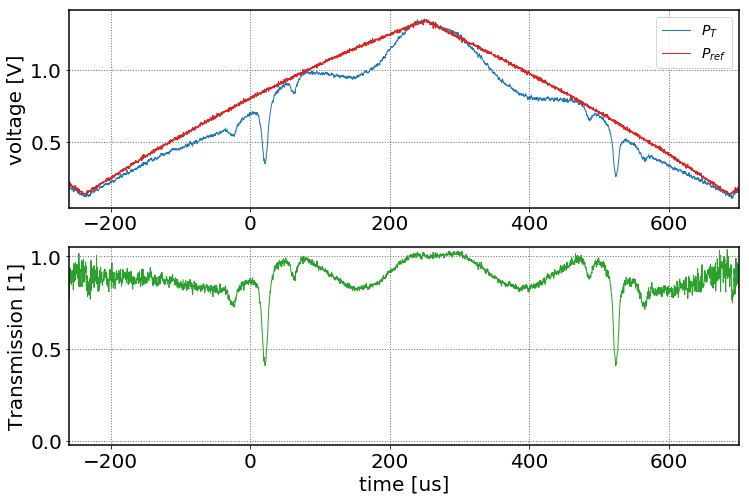

In [33]:
# plot tuning data
%matplotlib inline
data_skip = 20
ipd_T_ratio = (V_T[::10]-np.mean(V_T_bg)).max()/V_ipd[::10].max()
T_rel = (V_T-np.mean(V_T_bg))/V_ipd/ipd_T_ratio
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

ax0.plot(t_T[::data_skip].to(u.us),V_T[::data_skip]-np.mean(V_T_bg),'C0',label='$P_T$')
ax0.plot(t_ipd[::data_skip].to(u.us),V_ipd[::data_skip]*ipd_T_ratio,'C3',label='$P_{ref}$')
ax0.set_xlim([-260,700])
#ax0.set_ylim([-0.001,0.02])
ax0.grid(True,which='minor')
ax0.legend()

ax0.set_ylabel('voltage [V]')


ax1.plot(t_T[::data_skip].to(u.us),T_rel[::data_skip],color='C2',label='100$\mu$W,$V_{RB}$=15V')
ax1.set_xlim([-260,700])
ax1.set_ylim([-0.02,1.05])
ax1.grid(True,which='both')

ax1.set_xlabel('time [us]')
ax1.set_ylabel('Transmission [1]')

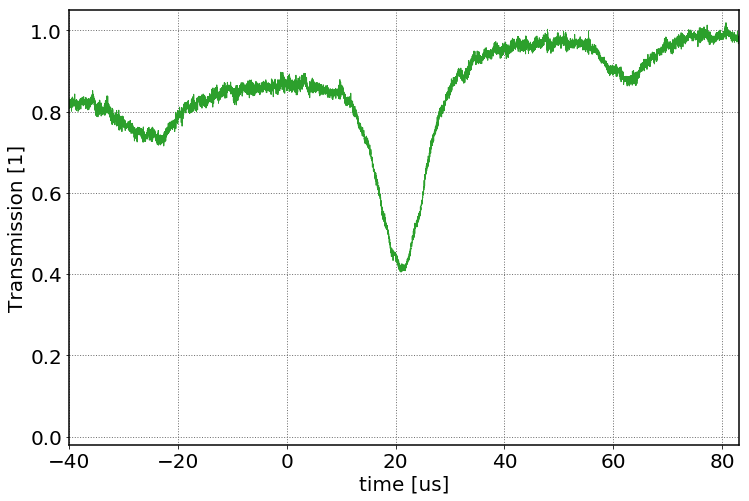

In [37]:
data_skip = 1
fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)
ax0.plot(t_T[::data_skip].to(u.us),T_rel[::data_skip],color='C2',label='100$\mu$W,$V_{RB}$=15V')
ax0.set_xlim([-40,83])
ax0.set_ylim([-0.02,1.05])


ax0.set_xlabel('time [us]')
ax0.set_ylabel('Transmission [1]')

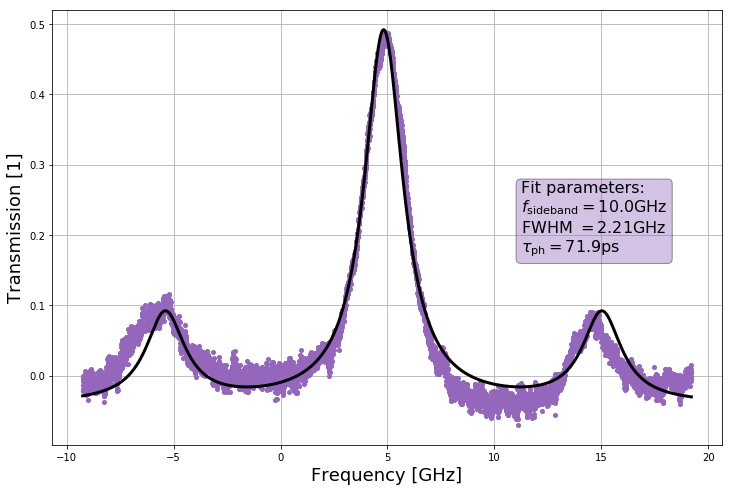

In [60]:
# process trace by fitting to triple Lorentzian
from cavity_trace_fitting import lorentzian, triple_lorentzian

EOM_freq = 10 * u.GHz
# linear fit parameters (taken by hand for now)
a = -1.42e-3/u.us
b = 0.136


T_rel_lim = 1 - T_rel[t_T<83.0*u.us]
t_T_lim = t_T[t_T<83.0*u.us]
T_rel_lim = T_rel_lim[t_T_lim>-40.0*u.us]
t_T_lim = t_T_lim[t_T_lim>-40.0*u.us]
T_rel_lim_corr = T_rel_lim - a * t_T_lim - b # remove afine background to make T_rel ~ 0 away from lorentzians

# fit parameters attained using Nate's code via an ipython session in a terminal:

params = {'A0': Q_(0.530925040118, 'dimensionless'),
              'B0': Q_(0.127577109513, 'dimensionless'),
              'FWHM': Q_(2212.15988845, 'megahertz'),
              'dnu': Q_(10.2092101522, 'gigahertz'),
              'nu0': Q_(4.82039573452, 'gigahertz'),
              'y0': Q_(-0.042015987444, 'dimensionless')} 

scale_factor_x = Q_(231479.988062, 'gigahertz / second')
scale_factor_y = 1 / u.volt
data_x = t_T_lim.to(u.s)
data_y = T_rel_lim_corr*u.volt

nu = data_x * scale_factor_x
amp = data_y * scale_factor_y

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)
ax0.plot(nu, amp, '.',color='C4',label='data')
ax0.plot(nu, triple_lorentzian(nu, **params), '-',color='k',linewidth=3,label='fit')
ax0.grid()
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('Transmission [1]')

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

### add text box with fit properties 
title_str = 'Fit parameters:\n'
f_sb_str = '$f_\mathrm{sideband} = %3.1f \mathrm{GHz}$\n'%(EOM_freq.to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
val_str = f_sb_str + f_fwhm_str + tau_ph_str
text_str = title_str + val_str

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.7, 0.6 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

## ECDL tuning data

### low power data with sidebands

In [6]:
### load data with 7.81GHz sidebands ###
# note i'm a bit unsure about this data - both because the sideband frequency measurement might have been messed up
# because I put too much power in the microwave frequency counter instrument and because I can't remember if I have
# background data to subtract the offset from the amplified (by SRS preamp) V_P_T_slow 
set_name ='Pf_70uW_with_7p81GHz_sidebands'
set_dir = path.normpath(path.join(agilent_data_dir,set_name))
Vmin = 0 * u.volt
Vmax = 30 * u.volt
nV = 31
Vrb_list = np.linspace(Vmin.to(u.volt).m,Vmax.to(u.volt).m,nV) * u.volt
data_sb = Vrb_sweep_load(Vrb_list,set_dir=set_dir)
t, V_P_T_slow_bg = load_scope_trace(name='tek_ch1_P_trans_slow_bg',data_dir=set_dir)


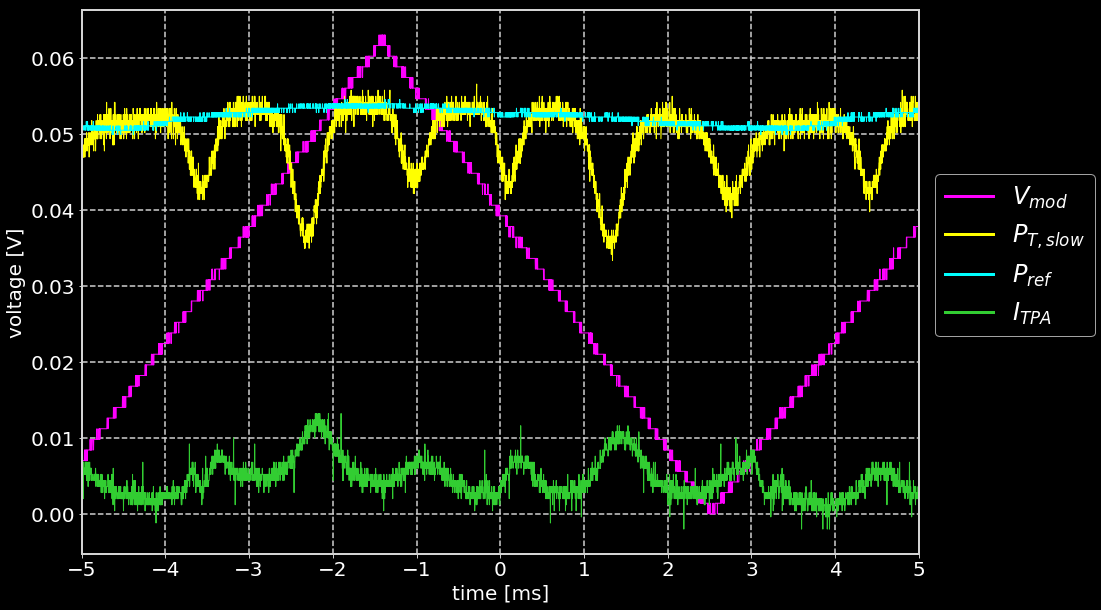

In [9]:
# plot raw data example
Vind = 20

# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.29
offset_P_ref = 0 * u.volt

scale_V_mod = 7e-3
offset_V_mod = 5 * u.volt

scale_I_TPA = 1
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

ax0 = scope_trace_plot(data_sb,scales=scales,offsets=offsets,Vind=Vind)

In [36]:
# crop traces, normalize P_T and perform fit



Vind = 10

# scales and offsets
scale_P_T_slow = 1
scale_P_ref = 0.29

t0 = -4.5 * u.ms
t1 = -0.2 * u.ms
scale_P_ref = 0.29
scale_P_T_slow = 1.0
EOM_freq = 7.81 * u.GHz
t_sb_guess = 1.3 * u.ms # time from line center to sideband peak
T_center_peak_guess = 0.35 
T_sb_peak_guess = 0.18 
T_y_offset = -0.0264 # measured using triple lorentzian fit, scaled
# I think this is because I forgot to take a background trace immediately after this sweep
# I'm using the background from the previous sweep but it seems to be a tiny bit off


T_rel = ( data_sb['V_P_T_slow'] / data_sb['V_P_ref'] )  * ( scale_P_T_slow / scale_P_ref ) + T_y_offset
t = data_sb['t'].to(u.ms)
T_rel_lim = 1 - T_rel[t<t1,:]
t_lim = t[t<t1]
T_rel_lim = T_rel_lim[t_lim>t0,:]
t_lim = t_lim[t_lim>t0]


### fit ###
## based on Nate's old code
# Scale the data into frequency space
scale_factor_x = (EOM_freq / t_sb_guess).to(u.GHz/u.second) 
scale_factor_y = 1 
nu = (t_lim * scale_factor_x).to(u.GHz)
amp = T_rel_lim[::,Vind] * scale_factor_y

# Calculate the initial estimated parameters
A0 = T_center_peak_guess * scale_factor_y
B0 = T_sb_peak_guess * scale_factor_y
nu0 = (t_lim.mean() * scale_factor_x).to(u.GHz)
dnu = (EOM_freq).to(u.GHz)
y0 = 0 * u.dimensionless
FWHM = (_estimate_FWHM_pint(nu, amp, A0/2, nu0-dnu/2, nu0, nu0+dnu/2)).to(u.GHz)

# Do a curve fit to get new params
#popt, pcov = curve_fit(triple_lorentzian, nu.m, amp.m, p0=(A0, B0, FWHM.m, nu0.m, dnu.m, y0.m))
popt, pcov = curve_fit(triple_lorentzian_no_y_offset, nu.m, amp.m, p0=(A0, B0, FWHM.m, nu0.m, dnu.m))
A0 = popt[0]
B0 = popt[1]
FWHM = popt[2] * u.GHz
nu0 = popt[3] * u.GHz
dnu = popt[4] * u.GHz
#y0 = popt[5] 



# Put params in format needed for param_plot
params = {
    'A0': A0,
    'B0': B0,
    'FWHM': FWHM,
    'nu0': nu0,
    'dnu': dnu,
}



entering estimate_FWHM_pint
half_max: 0.175
nu[0]: -27.034134769230768 gigahertz
left_limit: -18.02307692307692 gigahertz
center: -14.118076923076922 gigahertz
right_limit: -10.213076923076922 gigahertz
entered loop2 conditional!
i=24268
amp[i-1]=0.1746127332123414 dimensionless
entered loop2 conditional!
i=24292
amp[i-1]=0.16555116654438762 dimensionless
entered loop2 conditional!
i=24302
amp[i-1]=0.1746127332123414 dimensionless
entered loop2 conditional!
i=24324
amp[i-1]=0.16555116654438762 dimensionless
entered loop2 conditional!
i=24326
amp[i-1]=0.16555116654438762 dimensionless
entered loop2 conditional!
i=24350
amp[i-1]=0.1746127332123414 dimensionless
entered loop2 conditional!
i=24427
amp[i-1]=0.16555116654438762 dimensionless
entered loop2 conditional!
i=24429
amp[i-1]=0.16555116654438762 dimensionless
entered loop2 conditional!
i=24439
amp[i-1]=0.16555116654438762 dimensionless
entered loop2 conditional!
i=24451
amp[i-1]=0.1746127332123414 dimensionless
entered loop2 conditi

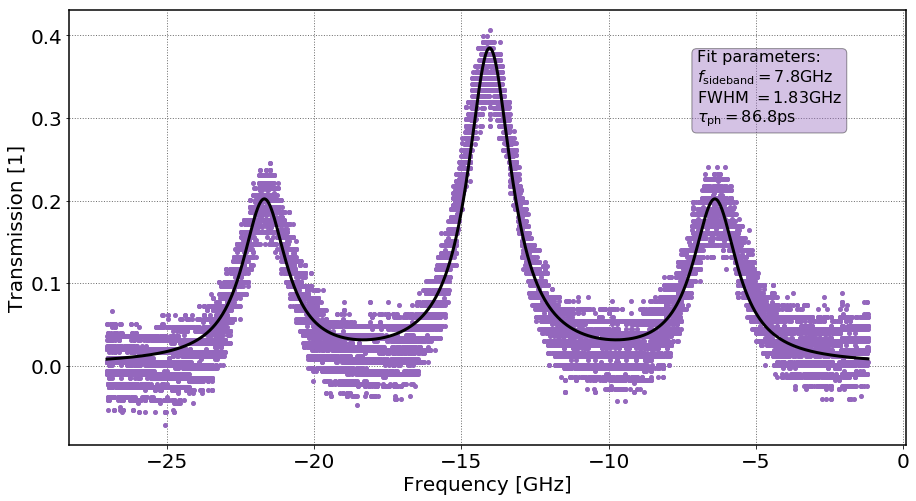

In [117]:
# plot normalized P_T and fit
#Vind = 0
data_skip=10
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, amp, '.',color='C4',label='data')
ax0.plot(nu, triple_lorentzian_no_y_offset(nu, **params), '-',color='k',linewidth=3,label='fit')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('Transmission [1]')

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

### add text box with fit properties 
title_str = 'Fit parameters:\n'
f_sb_str = '$f_\mathrm{sideband} = %3.1f \mathrm{GHz}$\n'%(EOM_freq.to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
val_str = f_sb_str + f_fwhm_str + tau_ph_str
text_str = title_str + val_str

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.9 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

In [50]:
# go back and use fit x scale from above to calcualte laser frequency scan rate vs. time and voltage
#scale_factor_x_fit_sb = scale_factor_x
Vind = 20
V_mod_range_sb = data_sb['V_mod'][:,Vind].max() - data_sb['V_mod'][:,Vind].min()
V_mod_half_period_sb = np.abs(data_sb['t'][data_sb['V_mod'][:,Vind].argmax()] - data_sb['t'][data_sb['V_mod'][:,Vind].argmin()])
scan_rate_per_V_sb = (scale_factor_x * V_mod_half_period_sb / V_mod_range_sb).to(u.GHz/u.volt)
f_scan_range_sb = (scale_factor_x * V_mod_half_period_sb).to(u.GHz)

print('Vind: {:}'.format(Vind))
print('V_mod_range_sb: {:3.2f} V'.format(V_mod_range_sb.m))
print('V_mod_half_period_sb: {:3.2f} ms'.format(V_mod_half_period_sb.to(u.ms).m))
print('scale_factor_x_fit_sb: {:3.2f} GHz/ms'.format(scale_factor_x_fit_sb.to(u.GHz/u.ms).m))
print('scan_rate_per_V_sb: {:3.2f} GHz/V'.format(scan_rate_per_V_sb.m))


# Vind: 0
# V_mod_range_sb: 9.00 V
# V_mod_half_period_sb: 3.89 ms
# scale_factor_x_fit_sb: 6.01 GHz/ms
# scan_rate_per_V_sb: 2.60 GHz/V

# looks like <1% devation of V_mod_half_period_sb and scan_rate_per_V_sb for Vind 1-20

Vind: 20
V_mod_range_sb: 9.00 V
V_mod_half_period_sb: 3.91 ms
scale_factor_x_fit_sb: 6.01 GHz/ms
scan_rate_per_V_sb: 2.61 GHz/V


In [123]:
# run batch triple lorentzian fitting function

# scales and offsets
t0_norm = 3.5 * u.ms
t1_norm = 3.9 * u.ms
t0_offset = -4.499 * u.ms
t1_offset = -4.47 * u.ms
t0 = -4.5 * u.ms
t1 = -0.2 * u.ms
f_eom = 7.81 * u.GHz
t_sb_guess = 1.3 * u.ms # time from line center to sideband peak
T_center_peak_guess = 0.35 
T_sb_peak_guess = 0.18 

sweep_triple_lorentzian_fit(data_sb,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,f_eom,t_sb_guess,T_sb_peak_guess)


{'A0': 0.38221534828457226, 'B0': 0.17743714317932194, 'FWHM': <Quantity(1.8508960567184838, 'gigahertz')>, 'f0': <Quantity(-14.508895682420663, 'gigahertz')>, 'df_sb': <Quantity(7.81, 'gigahertz')>}


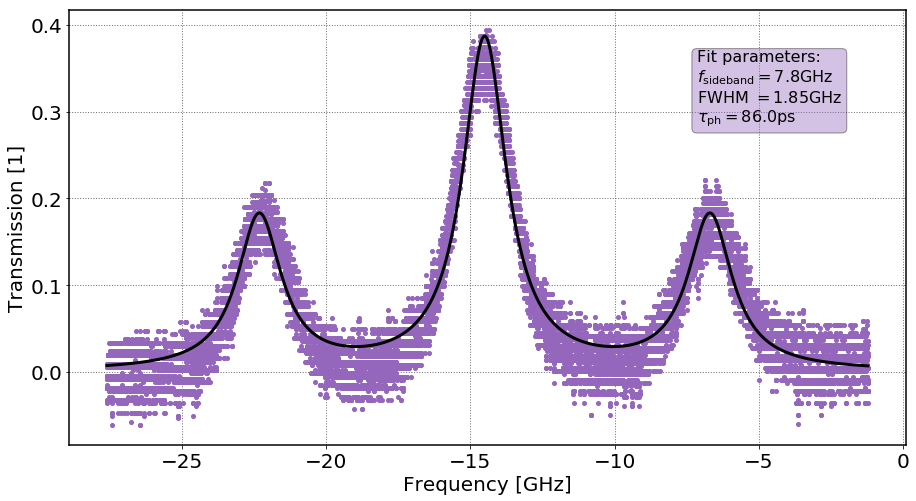

In [127]:
# plot normalized P_T and fit
Vind = 0
data_skip=1

params = data_sb['triple_lorentzian_fit_freq_params'][Vind]
print(params)
nu = data_sb['nu'][::data_skip]
t = data_sb['t_T'][::data_skip]
T = data_sb['T'][::data_skip,Vind]
scan_rate = data_sb['other_fit_params'][Vind]['scan_rate_per_ms_fit']

fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, T, '.',color='C4',label='data')
ax0.plot(nu, triple_lorentzian_freq(nu, **params), '-',color='k',linewidth=3,label='fit')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('Transmission [1]')

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

### add text box with fit properties 
title_str = 'Fit parameters:\n'
f_sb_str = '$f_\mathrm{sideband} = %3.1f \mathrm{GHz}$\n'%(f_eom.to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
val_str = f_sb_str + f_fwhm_str + tau_ph_str
text_str = title_str + val_str

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.9 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

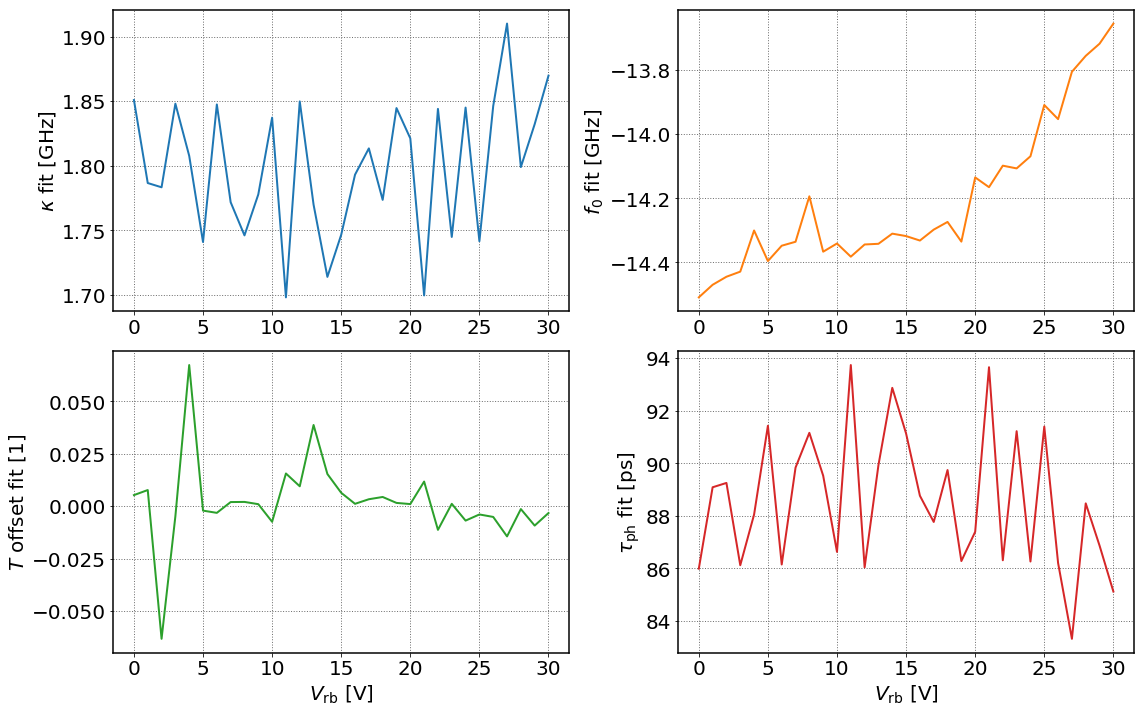

In [126]:
# plot fit results as a function of Vrb
fig = plt.figure(figsize=(16,10))
ax00 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)
ax10 = fig.add_subplot(223)
ax11 = fig.add_subplot(224)
Vrb = data_sb['Vrb_list']
FWHM = np.array([data_sb['triple_lorentzian_fit_freq_params'][i]['FWHM'].m for i in range(len(Vrb))]) * u.GHz
nu0 = np.array([data_sb['triple_lorentzian_fit_freq_params'][i]['f0'].m for i in range(len(Vrb))]) * u.GHz
y0 = data_sb['T_offset']
# FWHM_err = np.array([data_sb['triple_lorentzian_fit_stddev'][i]['FWHM_stddev'].m for i in range(len(Vrb))]) * u.GHz
# nu0_err = np.array([data_sb['triple_lorentzian_fit_stddev'][i]['nu0_stddev'].m for i in range(len(Vrb))]) * u.GHz
# y0_err = np.array([data_sb['triple_lorentzian_fit_stddev'][i]['y0_stddev'] for i in range(len(Vrb))]) 
tau_ph = (1 / (2 * np.pi * FWHM.to(u.GHz))).to(u.ps)
# tau_ph_err = (FWHM_err / (2 * np.pi * FWHM**2)).to(u.ps)

ax00.plot(Vrb,FWHM,color='C0')
ax01.plot(Vrb,nu0,color='C1')
ax10.plot(Vrb,y0,color='C2')
ax11.plot(Vrb,tau_ph,color='C3')

# errorfill(Vrb,FWHM,FWHM_err,color='C0',alpha_fill=0.3, ax=ax00)
# errorfill(Vrb,nu0,nu0_err,color='C1',alpha_fill=0.3, ax=ax01)
# errorfill(Vrb,y0,y0_err,color='C2',alpha_fill=0.3, ax=ax10)
# errorfill(Vrb,tau_ph,tau_ph_err,color='C3',alpha_fill=0.3, ax=ax11)

ax00.set_ylabel('$\kappa$ fit [GHz]')
ax01.set_ylabel('$f_0$ fit [GHz]')
ax10.set_ylabel('$T$ offset fit [1]')
ax11.set_ylabel(r'$\tau_\mathrm{ph}$ fit [ps]')

ax10.set_xlabel('$V_\mathrm{rb}$ [V]')
ax11.set_xlabel('$V_\mathrm{rb}$ [V]')

fig.tight_layout()

### low power data without sidebands

In [128]:
### load data without sidebands ###

set_name ='Pf_70uW'
set_dir = path.normpath(path.join(agilent_data_dir,set_name))
Vmin = 0 * u.volt
Vmax = 30 * u.volt
nV = 31
Vrb_list = np.linspace(Vmin.to(u.volt).m,Vmax.to(u.volt).m,nV) * u.volt
data_70uW = Vrb_sweep_load(Vrb_list,set_dir=set_dir)


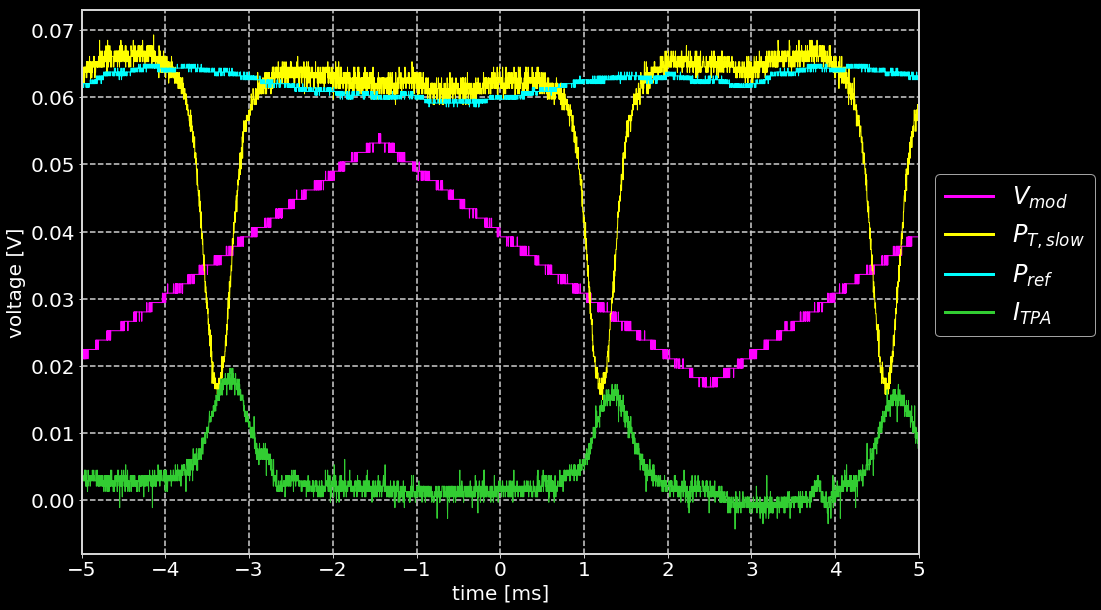

In [15]:
# plot raw data 
Vind = 0

# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.29
offset_P_ref = 0 * u.volt

scale_V_mod = 7e-3
offset_V_mod = 5 * u.volt

scale_I_TPA = 1
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

ax0 = scope_trace_plot(data_70uW,scales=scales,offsets=offsets,Vind=Vind)

In [131]:
# test batch single lorentzian fitting function

# time ranges used for fit
# ## use first dip ##
# t0 = -4.5 * u.ms
# t1 = -0.2 * u.ms
# ## use second dip ##
t0 = -0.5 * u.ms
t1 = 3.3 * u.ms
t0_offset = 2.7 * u.ms
t1_offset = 3.2 * u.ms
t0_norm = -2.8 * u.ms
t1_norm = -2.2 * u.ms
sweep_single_lorentzian_fit(data_70uW,data_sb,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset)


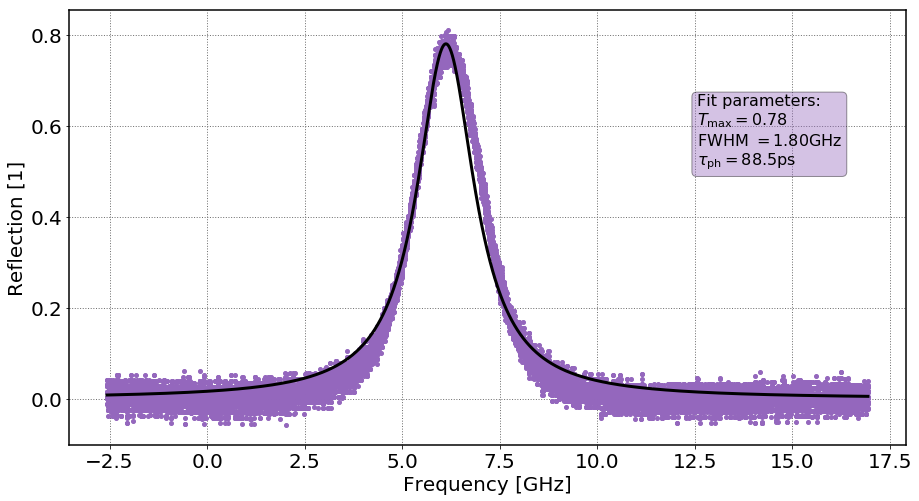

In [143]:
# plot normalized P_T and fit
Vind = 0
data_skip=1

params = data_70uW['lorentzian_fit_params'][Vind]
nu = data_70uW['nu'][::data_skip]
R = data_70uW['T'][::data_skip,Vind]


fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, R, '.',color='C4',label='data')
ax0.plot(nu, lorentzian(nu, **params), '-',color='k',linewidth=3,label='fit')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('Reflection [1]')

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

### add text box with fit properties 
title_str = 'Fit parameters:\n'
T_max_str = '$T_\mathrm{max} = %3.2f$\n'%(params['A'])
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
val_str = T_max_str + f_fwhm_str + tau_ph_str
text_str = title_str + val_str

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.8 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

In [134]:
# play around with fitting lorentzians to the data
data = data_70uW.copy()
t = data['t'].to(u.ms)
V_P_T_norm = data['V_P_T_slow']
V_P_ref_norm = data['V_P_ref']
V_P_T_norm_lim = V_P_T_norm[(t<t1_norm)*(t>t0_norm),:]
V_P_ref_norm_lim = V_P_ref_norm[(t<t1_norm)*(t>t0_norm),:]
T_scale_list = np.mean(V_P_T_norm_lim/V_P_ref_norm_lim, axis=0)
T_scale = T_scale_list.mean()
# use scale factor and triple lorentzian fit time range to create fit input data
T_rel = ( data['V_P_T_slow'] / data['V_P_ref'] )  / T_scale 
T_rel_lim = 1-T_rel[(t>t0)*(t<t1),:]
t_lim = t[(t>t0)*(t<t1)]
# find remaining offset from T=0 in offset time range and subtract on a trace-by-trace basis
T_offset = np.mean(T_rel_lim[(t_lim>t0_offset)*(t_lim<t1_offset),:],axis=0)
T_stddev = np.std(T_rel_lim[(t_lim>t0_offset)*(t_lim<t1_offset),:],axis=0)
T_rel_lim_corrected = T_rel_lim - T_offset
Vrb = data['Vrb_list']
Vrb_sb = data_sb['Vrb_list']
FWHM_sb = np.mean(np.array([data_sb['triple_lorentzian_fit_freq_params'][i]['FWHM'].m for i in range(len(Vrb_sb))]) * u.GHz)
scan_rate_per_ms_sb = np.mean(np.array([data_sb['other_fit_params'][i]['scan_rate_per_ms_fit'].m for i in range(len(Vrb_sb))]) * u.GHz / u.ms)
t00 = t_lim[T_rel_lim_corrected[:,0].argmax()].to(u.ms) # look near cavity reflection minimum at Vrb=0
scan_rate_per_ms = np.zeros(len(data['Vrb_list'])) * u.GHz/u.ms
lorentzian_fit_params_list = []
lorentzian_fit_stddev_list = []
### fit ###
Vind=0
t_max_range = (2 * u.us).to(u.ms)
t_max = t_lim[T_rel_lim_corrected[:,Vind].argmax()]
T_max = T_rel_lim_corrected[T_rel_lim_corrected[:,Vind].argmax(),Vind]
A0 = np.mean(T_rel_lim_corrected[(t_lim>(t_max - t_max_range/2.0))*(t_lim<(t_max + t_max_range/2.0)),Vind])
FWHM_t_guess = (FWHM_sb / scan_rate_per_ms_sb).to(u.ms)
popt, pcov = curve_fit(lorentzian, t_lim.m, T_rel_lim_corrected[:,Vind].m, p0=(A0, t00.m, FWHM_t_guess.m),ftol=1e-9,xtol=1e-9)

params = {
                'A': popt[0],
                'x0': popt[1] * u.ms,
                'FWHM': popt[2]*u.ms,
            }

init_params = {
                'A': A0,
                'x0': t00,
                'FWHM': FWHM_t_guess,
            }

my_params = {
                'A': A0,
                'x0': t00,
                'FWHM': 1.2*FWHM_t_guess,
            }

# plotting

# fig = plt.figure(figsize=(15,8))
# ax = fig.add_subplot(111)


# ax.plot(t_lim.m, T_rel_lim_corrected[:,Vind].m,'.',label='data')
# ax.plot(t_lim, lorentzian(t_lim, **init_params), '-',color='m',linewidth=3,label='guess_fit')
# ax.plot(t_lim, lorentzian(t_lim, **params), '-',color='k',linewidth=3,label='fit')
# ax.plot(t_lim, lorentzian(t_lim, **my_params),'r--',linewidth=2,label='my fit')
# #ax.plot(t_max, T_max,'ro',label='max')
# ax.legend()
# print('T_stddev[Vind]: {:3.5f}'.format(T_stddev[Vind]))
# print('init_params: {:}'.format(init_params))
# print('params: {:}'.format(params))

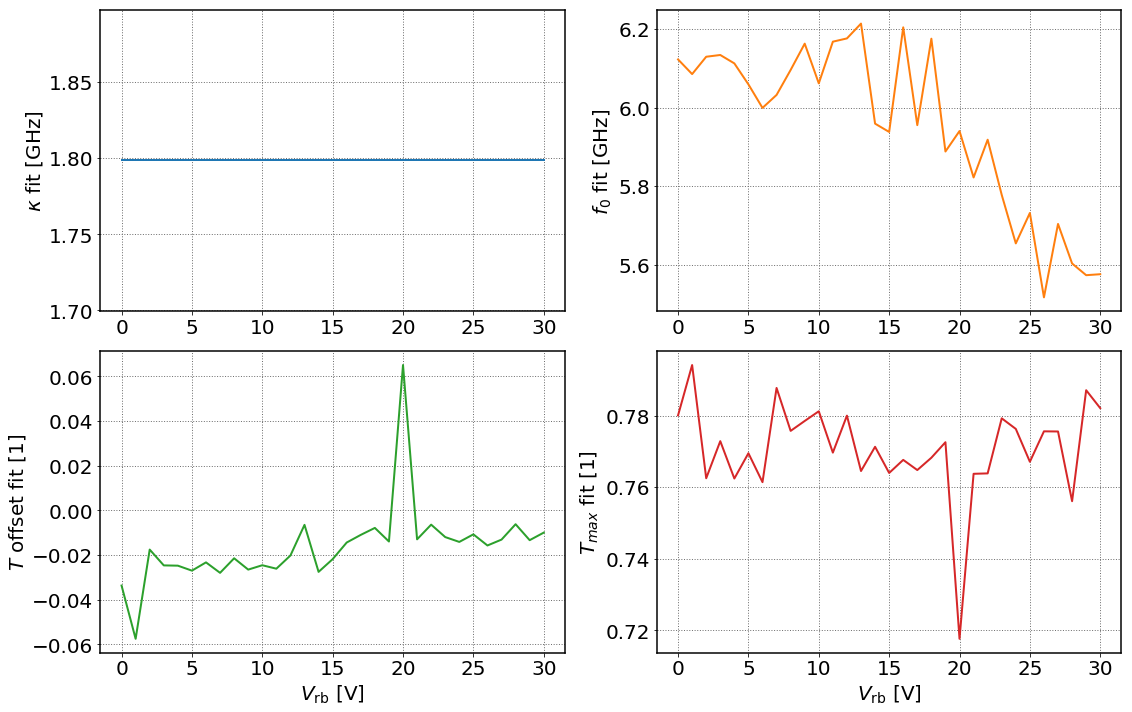

In [140]:
# plot single lorentzian fit results as a function of Vrb
fig = plt.figure(figsize=(16,10))
ax00 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)
ax10 = fig.add_subplot(223)
ax11 = fig.add_subplot(224)
Vrb = data_70uW['Vrb_list']
A0 = np.array([data_70uW['lorentzian_fit_params'][i]['A'].m for i in range(len(Vrb))]) * u.GHz
nu0 = np.array([data_70uW['lorentzian_fit_params'][i]['x0'].m for i in range(len(Vrb))]) * u.GHz
FWHM = np.array([data_70uW['lorentzian_fit_params'][i]['FWHM'].m for i in range(len(Vrb))]) * u.GHz
y0 = data_70uW['T_offset']
# FWHM_err = np.array([data_70uW['lorentzian_fit_stddev'][i]['FWHM_stddev'].m for i in range(len(Vrb))]) * u.GHz
# nu0_err = np.array([data_70uW['single_lorentzian_fit_stddev'][i]['nu0_stddev'].m for i in range(len(Vrb))]) * u.GHz
# y0_err = np.array([data_70uW['single_lorentzian_fit_stddev'][i]['y0_stddev'] for i in range(len(Vrb))]) 
tau_ph = (1 / (2 * np.pi * FWHM.to(u.GHz))).to(u.ps)
# tau_ph_err = (FWHM_err / (2 * np.pi * FWHM**2)).to(u.ps)

ax00.plot(Vrb,FWHM,color='C0')
ax01.plot(Vrb,nu0,color='C1')
ax10.plot(Vrb,y0,color='C2')
ax11.plot(Vrb,A0,color='C3')

# errorfill(Vrb,FWHM,FWHM_err,color='C0',alpha_fill=0.3, ax=ax00)
# errorfill(Vrb,nu0,nu0_err,color='C1',alpha_fill=0.3, ax=ax01)
# errorfill(Vrb,y0,y0_err,color='C2',alpha_fill=0.3, ax=ax10)
# errorfill(Vrb,tau_ph,tau_ph_err,color='C3',alpha_fill=0.3, ax=ax11)

ax00.set_ylabel('$\kappa$ fit [GHz]')
ax01.set_ylabel('$f_0$ fit [GHz]')
ax10.set_ylabel('$T$ offset fit [1]')
ax11.set_ylabel(r'$T_{max}$ fit [1]')

ax10.set_xlabel('$V_\mathrm{rb}$ [V]')
ax11.set_xlabel('$V_\mathrm{rb}$ [V]')

fig.tight_layout()

## data from Dev1-Dev4

In [25]:
def load_scope_trace(name='',data_dir=scope_data_dir,latest_file=True,verbose=False):
    if latest_file:
        file_list =  glob(path.normpath(data_dir)+path.normpath('/Tektronix_MSO_scope_trace_' + name + '_*'))
        latest_file = max(file_list,key=path.getctime)
        if verbose:
            print_statusline('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
        data = np.load(latest_file)
    else:
        fpath = path.normpath(path.join(data_dir,name))
        if verbose:
            print_statusline('Loading ' + name +' trace from file: ' + path.basename(fpath))
        data = np.load(fpath)
    t = data[:,0] * u.second
    V = data[:,1] * u.volt
    return t,V

def Vrb_sweep_load_new(Vrb_list,set_dir='C:/Users/Lab/agilent_scope_data',use_P_T_slow_bg=True):
    # first find length of traces by loading first trace from the first Vrb value
    Vrb0 = Vrb_list[0]
    t,P_T_slow_V0 = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_tek_ch1_P_trans_slow'.format(Vrb0.m),data_dir=set_dir)
    # find V_P_T_slow background voltage if needed
    if use_P_T_slow_bg:
        t, V_P_T_slow_bg = load_scope_trace(name='tek_ch1_P_trans_slow_bg',data_dir=set_dir)
        V_P_T_slow_bg = V_P_T_slow_bg.mean()
    else:
        V_P_T_slow_bg = Q_(0.0, u.volt)
    # create arrays to hold loaded data
    L = len(P_T_slow_V0)
    V_P_T_slow = np.zeros((L,len(Vrb_list)))*u.volt
    V_P_ref = np.zeros((L,len(Vrb_list)))*u.volt
    V_mod = np.zeros((L,len(Vrb_list)))*u.volt
    V_I_TPA = np.zeros((L,len(Vrb_list)))*u.volt
    V_P_T_slow_sb = np.zeros((L,len(Vrb_list)))*u.volt
    V_P_ref_sb = np.zeros((L,len(Vrb_list)))*u.volt
    V_mod_sb = np.zeros((L,len(Vrb_list)))*u.volt
    V_I_TPA_sb = np.zeros((L,len(Vrb_list)))*u.volt
    # load data into newly created arrays
    for Vind, VV in enumerate(Vrb_list):
        t,V_P_T_slow_raw =load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir)
        V_P_T_slow[:,Vind] = V_P_T_slow_raw - V_P_T_slow_bg
        t,V_P_ref[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir)
        t,V_mod[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir)
        t,V_I_TPA[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_off_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir)
        t,V_P_T_slow_sb_raw =load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir)
        V_P_T_slow_sb[:,Vind] = V_P_T_slow_sb_raw - V_P_T_slow_bg
        t,V_P_ref_sb[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir)
        t,V_mod_sb[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir)
        t,V_I_TPA_sb[:,Vind] = load_scope_trace(name='Vrb{:2.1f}_sb9.5GHz_on_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir)
    return {'Vrb_list':Vrb_list,'t':t,'V_P_T_slow':V_P_T_slow,'V_P_ref':V_P_ref,'V_mod':V_mod,'V_I_TPA':V_I_TPA,'V_P_T_slow_sb':V_P_T_slow_sb,'V_P_ref_sb':V_P_ref_sb,'V_mod_sb':V_mod_sb,'V_I_TPA_sb':V_I_TPA_sb}




In [189]:
# import data

Vmin = 0 * u.volt
Vmax = 0 * u.volt
nV = 1
Vrb_list = np.linspace(Vmin.to(u.volt).m,Vmax.to(u.volt).m,nV) * u.volt

g_dev0 = 200 * u.nm
g_dev1 = 400 * u.nm
g_dev2 = 600 * u.nm
g_dev3 = 800 * u.nm

set_name ='Dev1_Pf_50uW'
set_dir = path.normpath(path.join(agilent_data_dir,set_name))
data_dev1 = Vrb_sweep_load_new(Vrb_list,set_dir=set_dir)

set_name ='Dev2_Pf_50uW'
set_dir = path.normpath(path.join(agilent_data_dir,set_name))
data_dev2 = Vrb_sweep_load_new(Vrb_list,set_dir=set_dir)

set_name ='Dev3_Pf_50uW'
set_dir = path.normpath(path.join(agilent_data_dir,set_name))
data_dev3 = Vrb_sweep_load_new(Vrb_list,set_dir=set_dir)

set_name ='Dev4_Pf_50uW'
set_dir = path.normpath(path.join(agilent_data_dir,set_name))
data_dev4 = Vrb_sweep_load_new(Vrb_list,set_dir=set_dir)

In [28]:
data_dev1.keys()

dict_keys(['Vrb_list', 't', 'V_P_T_slow', 'V_P_ref', 'V_mod', 'V_I_TPA', 'V_P_T_slow_sb', 'V_P_ref_sb', 'V_mod_sb', 'V_I_TPA_sb'])

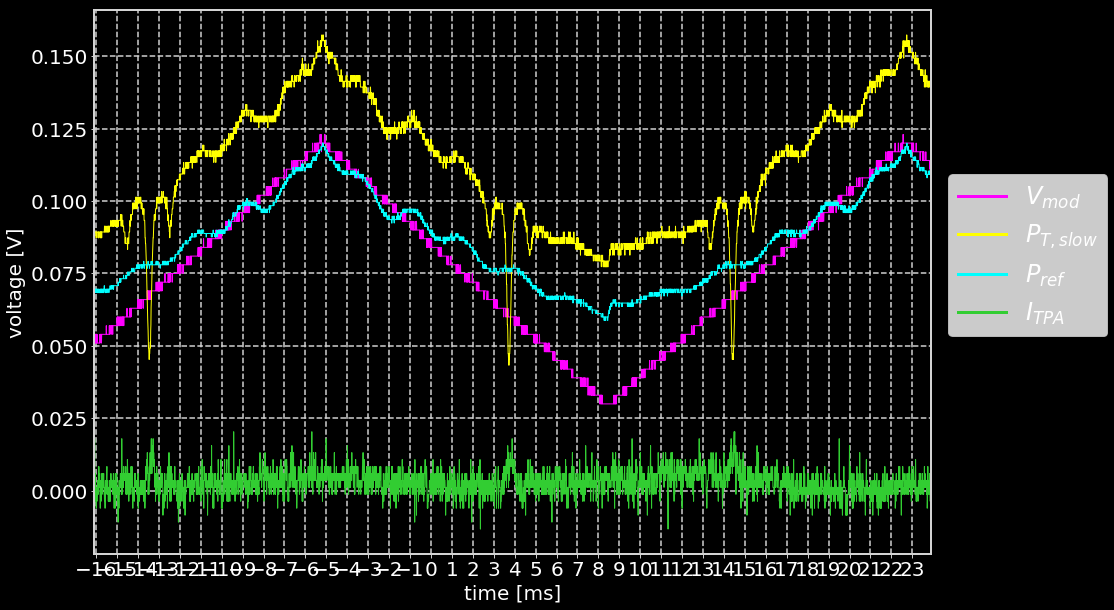

In [157]:
# plot dev1 raw data 
Vind = 0
%matplotlib inline
# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.6
offset_P_ref = 0 * u.volt

scale_V_mod = 1.5e-2
offset_V_mod = 5 * u.volt

scale_I_TPA = 3
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

ax0 = scope_trace_plot_new(data_dev1,scales=scales,offsets=offsets,Vind=Vind,sb=True)

#ax0.set_xlim([-13,-10])

In [190]:
# run batch double lorentzian fitting function with non-sb data

# scales and offsets
t0_norm = -3 * u.ms
t1_norm = -2 * u.ms
t0_offset = 16 * u.ms
t1_offset = 17.5 * u.ms
t0 = 11 * u.ms
t1 = 17.6 * u.ms
dt_guess = 0.1 * u.ms # time from line center to sideband peak
dt_sb_guess = 0.95 * u.ms
FWHM_guess = 0.03 * u.ms
f_eom = 9.5*u.GHz
#T_center_peak_guess = 0.35 
#T_sb_peak_guess = 0.18 


sweep_double_lorentzian_fit(data_dev1,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess,f_eom)

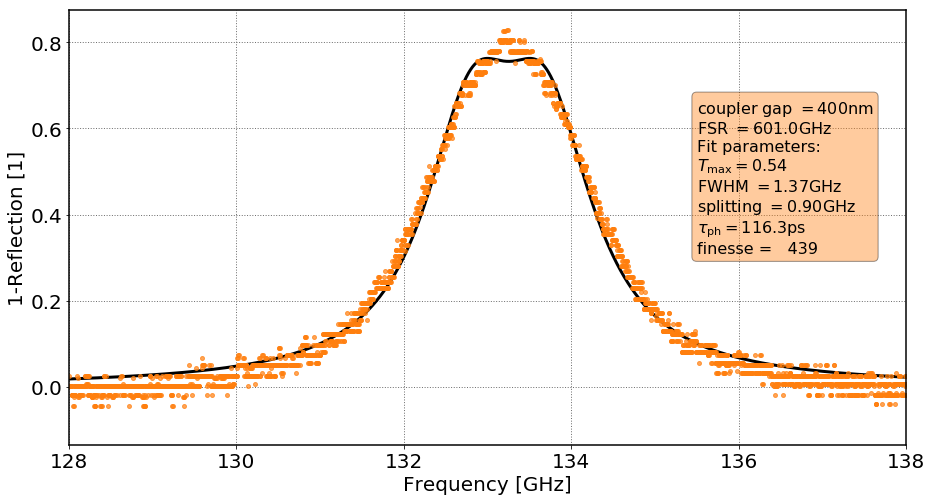

In [191]:
# plot normalized P_T and fit
Vind = 0
data_skip=1
data = data_dev1
gap = g_dev1
dev_color='C1'
f_range = 10 # GHz
f_center = 133
FSR = 601.0 * u.GHz
FSR_rad = 2*np.pi * FSR
params = data['double_lorentzian_fit_freq_params'][Vind]
nu = data['nu'][::data_skip]
R = data['T'][::data_skip,Vind]

#params_mag = [p.m for p in params.values()]
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, double_lorentzian(nu, *params.values()), '-',color='k',linewidth=3,label='fit')
ax0.plot(nu, R, '.',color=dev_color,alpha=0.7,label='data')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('1-Reflection [1]')

#ax0.set_xlim([-122,-115])
ax0.set_xlim([f_center-f_range/2.0,f_center+f_range/2.0])

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)
Finesse = (tau_ph * FSR_rad).to(u.dimensionless).m
### add text box with fit properties 
FSR_str = 'FSR $= %4.1f \mathrm{GHz}$\n'%(FSR.to(u.GHz).m)
gap_str = 'coupler gap $= %3.0f \mathrm{nm}$\n'%(gap.to(u.nm).m)
title_str = 'Fit parameters:\n'
T_max_str = '$T_\mathrm{max} = %3.2f$\n'%(params['A0'])
f_split_str = 'splitting $= %3.2f \mathrm{GHz}$\n'%(params['df'].to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
Finesse_str = '\nfinesse =%6.0f'%(Finesse)
val_str = T_max_str + f_fwhm_str + f_split_str + tau_ph_str + Finesse_str
text_str = gap_str + FSR_str + title_str + val_str 

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor=dev_color, alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.8 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

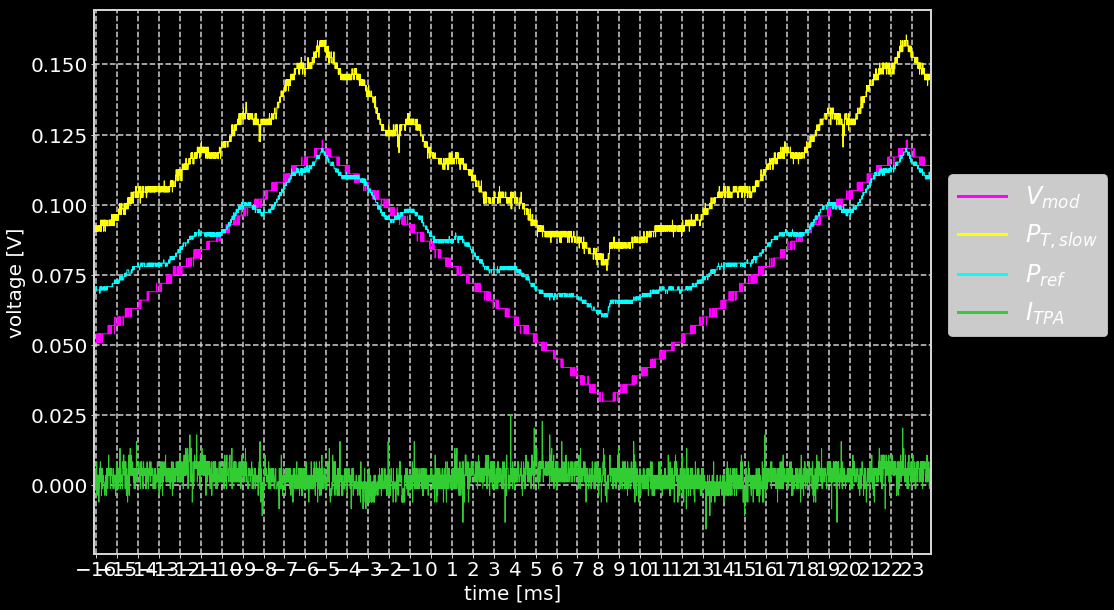

In [168]:
# plot dev2 raw data 
Vind = 0
%matplotlib inline
# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.6
offset_P_ref = 0 * u.volt

scale_V_mod = 1.5e-2
offset_V_mod = 5 * u.volt

scale_I_TPA = 3
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

ax0 = scope_trace_plot_new(data_dev2,scales=scales,offsets=offsets,Vind=Vind,sb=True)

#ax0.set_xlim([-13,-10])

In [192]:
# run batch double lorentzian fitting function with non-sb data

# scales and offsets
t0_norm = 3 * u.ms
t1_norm = 4 * u.ms
t0_offset = 0 * u.ms
t1_offset = 0.45 * u.ms
t0 = -3.5 * u.ms
t1 = 0.5 * u.ms
dt_guess = 0.1 * u.ms # time from line center to sideband peak
dt_sb_guess = 0.95 * u.ms
FWHM_guess = 0.03 * u.ms
f_eom = 9.5*u.GHz
#T_center_peak_guess = 0.35 
#T_sb_peak_guess = 0.18 


sweep_double_lorentzian_fit(data_dev2,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess,f_eom)

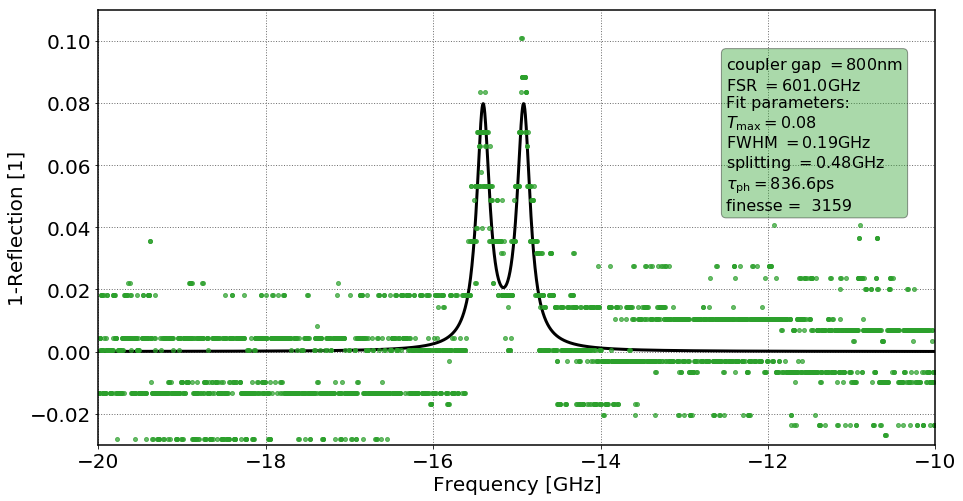

In [199]:
# plot normalized P_T and fit
Vind = 0
data_skip=1
data = data_dev2
gap = 800 * u.nm
dev_color='C2'
f_range = 10 # GHz
f_center = -15 # GHz
FSR = 601.0 * u.GHz
FSR_rad = 2*np.pi * FSR
params = data['double_lorentzian_fit_freq_params'][Vind]
nu = data['nu'][::data_skip]
R = data['T'][::data_skip,Vind]

#params_mag = [p.m for p in params.values()]
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, double_lorentzian(nu, *params.values()), '-',color='k',linewidth=3,label='fit')
ax0.plot(nu, R, '.',color=dev_color,alpha=0.7,label='data')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('1-Reflection [1]')

#ax0.set_xlim([-122,-115])
ax0.set_xlim([f_center-f_range/2.0,f_center+f_range/2.0])
ax0.set_ylim([-0.03,0.11])

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)
Finesse = (tau_ph * FSR_rad).to(u.dimensionless).m
### add text box with fit properties 
FSR_str = 'FSR $= %4.1f \mathrm{GHz}$\n'%(FSR.to(u.GHz).m)
gap_str = 'coupler gap $= %3.0f \mathrm{nm}$\n'%(gap.to(u.nm).m)
title_str = 'Fit parameters:\n'
T_max_str = '$T_\mathrm{max} = %3.2f$\n'%(params['A0'])
f_split_str = 'splitting $= %3.2f \mathrm{GHz}$\n'%(params['df'].to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
Finesse_str = '\nfinesse =%6.0f'%(Finesse)
val_str = T_max_str + f_fwhm_str + f_split_str + tau_ph_str + Finesse_str
text_str = gap_str + FSR_str + title_str + val_str 

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor=dev_color, alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.9 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

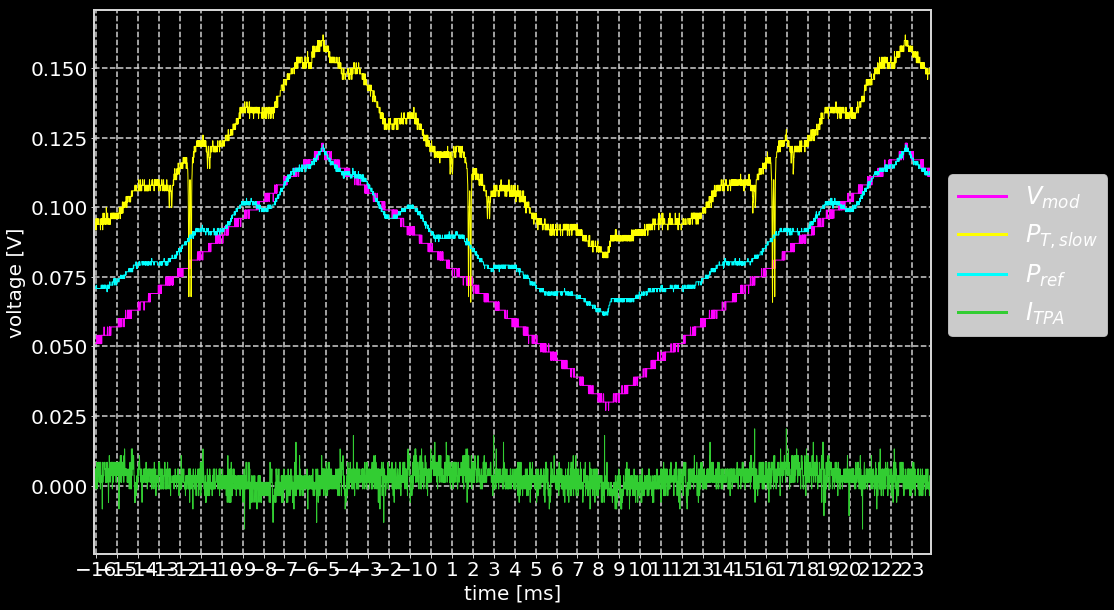

In [200]:
# plot raw data 
Vind = 0
%matplotlib inline
# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.6
offset_P_ref = 0 * u.volt

scale_V_mod = 1.5e-2
offset_V_mod = 5 * u.volt

scale_I_TPA = 3
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

#ax0 = scope_trace_plot(data_dev3,scales=scales,offsets=offsets,Vind=Vind)

ax0 = scope_trace_plot_new(data_dev3,scales=scales,offsets=offsets,Vind=Vind,sb=True)

#ax0.set_xlim([-13,-10])


In [196]:
# run batch double lorentzian fitting function with non-sb data

# scales and offsets
t0_norm = -7 * u.ms
t1_norm = -5 * u.ms
t0_offset = -14.9 * u.ms
t1_offset = -14 * u.ms
t0 = -15 * u.ms
t1 = -8 * u.ms
dt_guess = 0.1 * u.ms # time from line center to sideband peak
dt_sb_guess = 0.95 * u.ms
FWHM_guess = 0.03 * u.ms
f_eom = 9.5*u.GHz
#T_center_peak_guess = 0.35 
#T_sb_peak_guess = 0.18 


out = sweep_double_lorentzian_fit(data_dev3,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess,f_eom)

In [121]:
data_dev3.keys()

dict_keys(['Vrb_list', 't', 'V_P_T_slow', 'V_P_ref', 'V_mod', 'V_I_TPA', 'V_P_T_slow_sb', 'V_P_ref_sb', 'V_mod_sb', 'V_I_TPA_sb', 't00', 'T_offset', 'T', 't_T', 'double_lorentzian_fit_params', 'double_lorentzian_fit_stddev', 'triple_double_lorentzian_fit_params', 'triple_double_lorentzian_fit_stddev', 'T_offset_triple', 'T_triple', 't_T_triple', 'nu', 'nu00', 'double_lorentzian_fit_freq_params', 'triple_double_lorentzian_fit_freq_params', 'other_fit_params'])

{'A0': 0.5642680089938541, 'FWHM': <Quantity(0.037212504480214924, 'millisecond')>, 't0': <Quantity(-11.482409009654733, 'millisecond')>, 'dt': <Quantity(0.10831758653383755, 'millisecond')>}


(-12, -11)

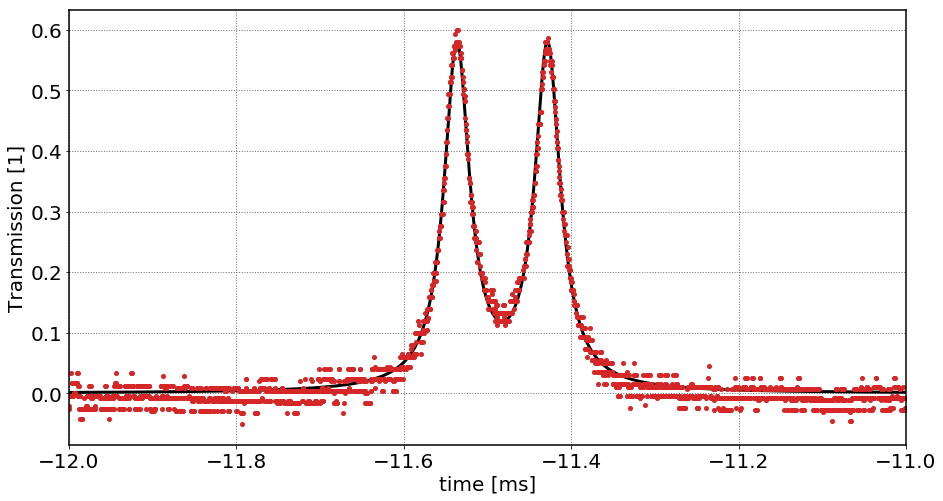

In [176]:
# plot normalized P_T and fit without sidebands
Vind = 0
data_skip=1

params = data_dev3['double_lorentzian_fit_params'][Vind]
print(params)
#nu = data_dev3['nu'][::data_skip]
t = data_dev3['t_T'][::data_skip]
T = data_dev3['T'][::data_skip,Vind]
#scan_rate = data_dev3['other_fit_params'][Vind]['scan_rate_per_ms_fit']

fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(t, double_lorentzian(t, **params), '-',color='k',linewidth=3,label='fit')
ax0.plot(t, T, '.',color='C3',label='data')

ax0.set_xlabel('time [ms]')
ax0.set_ylabel('Transmission [1]')

ax0.set_xlim([-12,-11])

# tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

# ### add text box with fit properties 
# title_str = 'Fit parameters:\n'
# f_sb_str = '$f_\mathrm{sideband} = %3.1f \mathrm{GHz}$\n'%(f_eom.to(u.GHz).m)
# f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
# tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
# val_str = f_sb_str + f_fwhm_str + tau_ph_str
# text_str = title_str + val_str

# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# # place a text box in upper left in axes coords
# ax0.text(0.75, 0.9 ,text_str, transform=ax0.transAxes, fontsize=16,
#         verticalalignment='top', bbox=props)

{'A0': 0.42609057744837125, 'B0': 0.063178924108534526, 'FWHM': <Quantity(0.037212504480214924, 'millisecond')>, 't0': <Quantity(-11.51377966434191, 'millisecond')>, 'dt': <Quantity(0.10831758653383755, 'millisecond')>, 'dt_sb': <Quantity(0.922545181292997, 'millisecond')>}


(-12.7, -10.3)

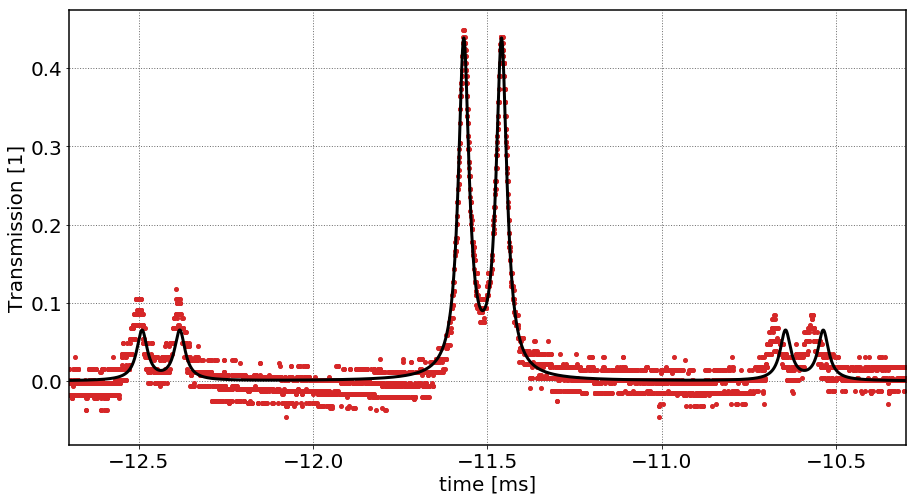

In [113]:
# plot normalized P_T and fit with sidebands
Vind = 0
data_skip=1

params = data_dev3['triple_double_lorentzian_fit_params'][Vind]
print(params)
#nu = data_dev3['nu'][::data_skip]
t = data_dev3['t_T_triple'][::data_skip]
T = data_dev3['T_triple'][::data_skip,Vind]
#scan_rate = data_dev3['other_fit_params'][Vind]['scan_rate_per_ms_fit']

fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(t, T, '.',color='C3',label='data')
ax0.plot(t, triple_double_lorentzian(t, **params), '-',color='k',linewidth=3,label='fit')

ax0.set_xlabel('time [ms]')
ax0.set_ylabel('Transmission [1]')

ax0.set_xlim([-12.7,-10.3])
#ax0.set_ylim([-0.04,0.15])

# tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)

# ### add text box with fit properties 
# title_str = 'Fit parameters:\n'
# f_sb_str = '$f_\mathrm{sideband} = %3.1f \mathrm{GHz}$\n'%(f_eom.to(u.GHz).m)
# f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
# tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
# val_str = f_sb_str + f_fwhm_str + tau_ph_str
# text_str = title_str + val_str

# # these are matplotlib.patch.Patch properties
# props = dict(boxstyle='round', facecolor='C4', alpha=0.4)

# # place a text box in upper left in axes coords
# ax0.text(0.75, 0.9 ,text_str, transform=ax0.transAxes, fontsize=16,
#         verticalalignment='top', bbox=props)

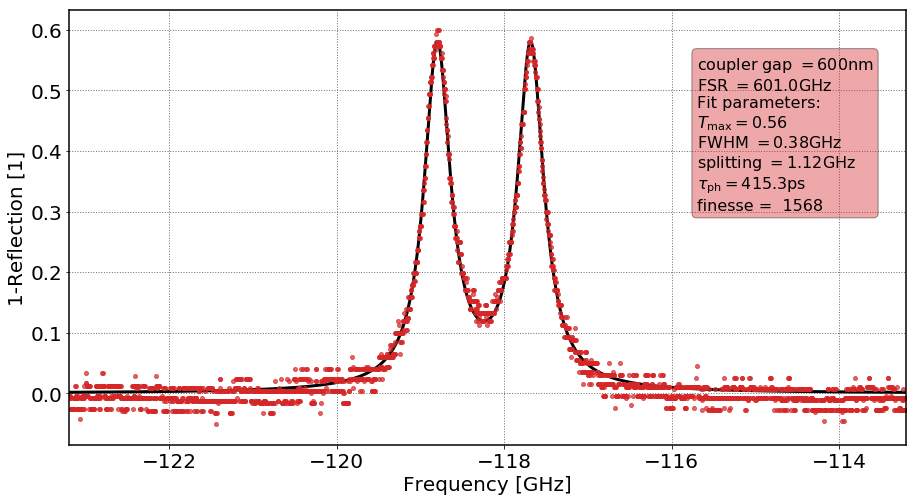

In [198]:
# plot normalized P_T and fit
Vind = 0
data_skip=1
data = data_dev3
dev_color='C3'
gap = 600 * u.nm
f_range = 10 # GHz
f_center = -118.2
FSR = 601.0 * u.GHz
FSR_rad = 2*np.pi * FSR
params = data['double_lorentzian_fit_freq_params'][Vind]
nu = data['nu'][::data_skip]
R = data['T'][::data_skip,Vind]

#params_mag = [p.m for p in params.values()]
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, double_lorentzian(nu, *params.values()), '-',color='k',linewidth=3,label='fit')
ax0.plot(nu, R, '.',color=dev_color,alpha=0.7,label='data')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('1-Reflection [1]')

#ax0.set_xlim([-122,-115])
ax0.set_xlim([f_center-f_range/2.0,f_center+f_range/2.0])

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)
Finesse = (tau_ph * FSR_rad).to(u.dimensionless).m
### add text box with fit properties 
FSR_str = 'FSR $= %4.1f \mathrm{GHz}$\n'%(FSR.to(u.GHz).m)
gap_str = 'coupler gap $= %3.0f \mathrm{nm}$\n'%(gap.to(u.nm).m)
title_str = 'Fit parameters:\n'
T_max_str = '$T_\mathrm{max} = %3.2f$\n'%(params['A0'])
f_split_str = 'splitting $= %3.2f \mathrm{GHz}$\n'%(params['df'].to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
Finesse_str = '\nfinesse =%6.0f'%(Finesse)
val_str = T_max_str + f_fwhm_str + f_split_str + tau_ph_str + Finesse_str
text_str = gap_str + FSR_str + title_str + val_str 

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor=dev_color, alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.9 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

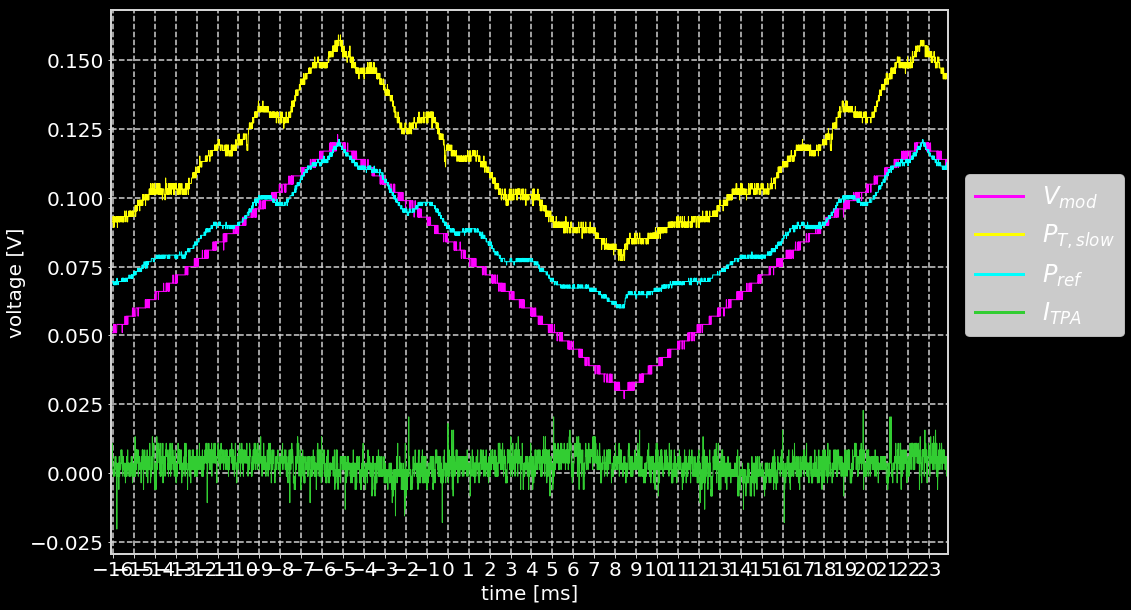

In [181]:
# plot dev4 raw data 
Vind = 0
%matplotlib inline
# scales and offsets
scale_P_T_slow = 1
offset_P_T_slow = 0 * u.volt

scale_P_ref = 0.6
offset_P_ref = 0 * u.volt

scale_V_mod = 1.5e-2
offset_V_mod = 5 * u.volt

scale_I_TPA = 3
offset_I_TPA = -0.01 * u.volt

scales = [scale_P_T_slow,scale_P_ref,scale_V_mod,scale_I_TPA]
offsets = [offset_P_T_slow,offset_P_ref,offset_V_mod,offset_I_TPA]

ax0 = scope_trace_plot_new(data_dev4,scales=scales,offsets=offsets,Vind=Vind,sb=True)

#ax0.set_xlim([-13,-10])

In [182]:
# run batch double lorentzian fitting function with non-sb data

# scales and offsets
t0_norm = 2 * u.ms
t1_norm = 3 * u.ms
t0_offset = 21 * u.ms
t1_offset = 21.9 * u.ms
t0 = 14 * u.ms
t1 = 22 * u.ms
dt_guess = 0.1 * u.ms # time from line center to sideband peak
dt_sb_guess = 0.95 * u.ms
FWHM_guess = 0.03 * u.ms
f_eom = 9.5*u.GHz
#T_center_peak_guess = 0.35 
#T_sb_peak_guess = 0.18 


sweep_double_lorentzian_fit(data_dev4,t0,t1,t0_norm,t1_norm,t0_offset,t1_offset,FWHM_guess,dt_guess,dt_sb_guess,f_eom)

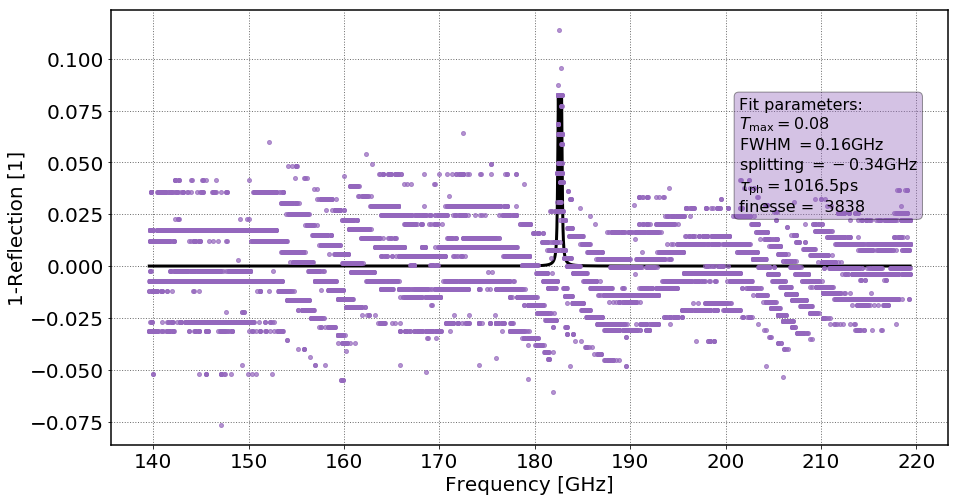

In [185]:
# plot normalized P_T and fit
Vind = 0
data_skip=1
data = data_dev4
dev_color='C4'
f_range = 10 # GHz
f_center = 182
FSR = 601.0 * u.GHz
FSR_rad = 2*np.pi * FSR
params = data['double_lorentzian_fit_freq_params'][Vind]
nu = data['nu'][::data_skip]
R = data['T'][::data_skip,Vind]

#params_mag = [p.m for p in params.values()]
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)

#ax0.plot(t_lim[::data_skip].to(u.ms),T_rel_lim[::data_skip,Vind],'-',color='C3')
ax0.plot(nu, double_lorentzian(nu, *params.values()), '-',color='k',linewidth=3,label='fit')
ax0.plot(nu, R, '.',color=dev_color,alpha=0.7,label='data')
ax0.set_xlabel('Frequency [GHz]')
ax0.set_ylabel('1-Reflection [1]')

#ax0.set_xlim([-122,-115])
#ax0.set_xlim([f_center-f_range/2.0,f_center+f_range/2.0])

tau_ph = (1 / (2 * np.pi * params['FWHM'].to(u.GHz))).to(u.ps)
Finesse = (tau_ph * FSR_rad).to(u.dimensionless).m
### add text box with fit properties 
title_str = 'Fit parameters:\n'
T_max_str = '$T_\mathrm{max} = %3.2f$\n'%(params['A0'])
f_split_str = 'splitting $= %3.2f \mathrm{GHz}$\n'%(params['df'].to(u.GHz).m)
f_fwhm_str = 'FWHM $= %3.2f \mathrm{GHz}$\n'%(params['FWHM'].to(u.GHz).m)
tau_ph_str = r'$\tau_\mathrm{ph} = %3.1f \mathrm{ps}$'%(tau_ph.to(u.ps).m)
Finesse_str = '\nfinesse =%6.0f'%(Finesse)
val_str = T_max_str + f_fwhm_str + f_split_str + tau_ph_str + Finesse_str
text_str = title_str + val_str 

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor=dev_color, alpha=0.4)

# place a text box in upper left in axes coords
ax0.text(0.75, 0.8 ,text_str, transform=ax0.transAxes, fontsize=16,
        verticalalignment='top', bbox=props)

# Self pulsing data analysis

## Example 1

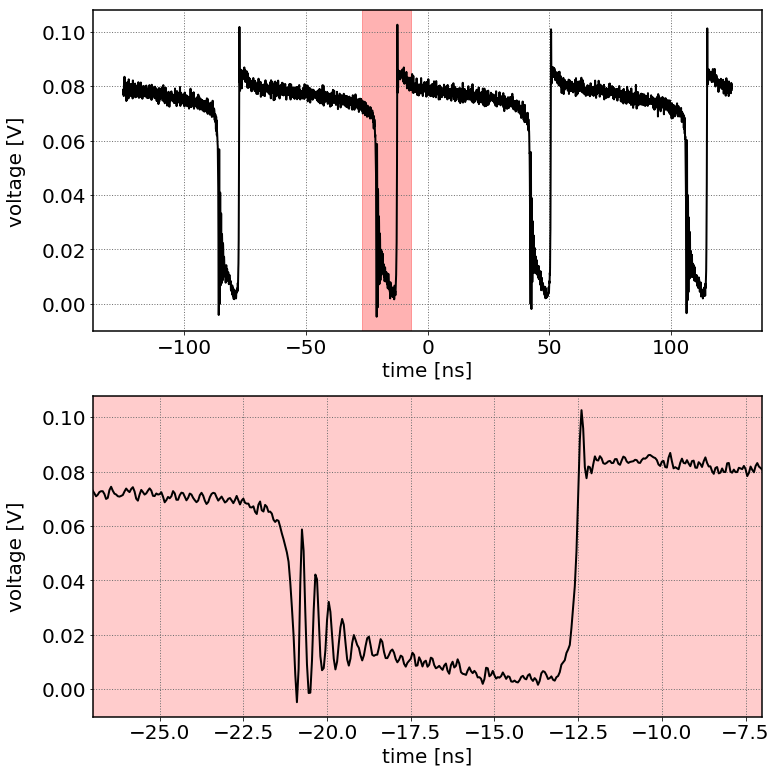

In [193]:
# plot sustained oscillation trace to check

trace_ind = 4

name_list = ['sustained_osc_Vrb0_agilent_ch3_P_trans_fast',
            'sustained_osc_Vrb1_agilent_ch3_P_trans_fast',
            'sustained_osc_Vrb2_agilent_ch3_P_trans_fast',
            'sustained_osc_Pf100mW_Vrb0_agilent_ch3_P_trans_fast',
            'sustained_osc_Pf100mW_Vrb1_agilent_ch3_P_trans_fast',
            'sustained_osc_Pf100mW_Vrb2_agilent_ch3_P_trans_fast',
            'sustained_osc_Pf200mW_Vrb0_agilent_ch3_P_trans_fast',
            'sustained_osc_Pf200mW_Vrb1_agilent_ch3_P_trans_fast',
            'sustained_osc_Pf200mW_Vrb2_agilent_ch3_P_trans_fast']
x_zoom_center_list = [14.5,14.5,14.5,0,-17,-17,15,25,4,]
x_zoom_width = 20
#x_zoom0_list = [0,7,7,-10,-25,7,7,7,7]
#x_zoom1_list = [50,22,22,10,-5,22,22,22,22]

t_load,V_load = load_agilent_trace(name=name_list[trace_ind],data_dir=agilent_data_dir)

# plot agilent scope test data 
data_skip0 = 10 #1
data_skip1 = 1
fig = plt.figure(figsize=(12,13))
gs = GridSpec(2,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
trace_len = len(t_load)
zoom_len0 = 5000#30000 
zoom_len1 = 4000#900
#zoom_offset = 18 * u.ns
t_plot0 = t_load[int(trace_len/2-zoom_len0/2):int(trace_len/2+zoom_len0/2)].to(u.ns) - t_load[int(trace_len/2)].to(u.ns)
t_plot1 = t_load[int(trace_len/2-zoom_len1/2):int(trace_len/2+zoom_len1/2)].to(u.ns) - t_load[int(trace_len/2)].to(u.ns)

V_plot0 = V_load[int(trace_len/2-zoom_len0/2):int(trace_len/2+zoom_len0/2)]
V_plot1 = V_load[int(trace_len/2-zoom_len1/2):int(trace_len/2+zoom_len1/2)]
ax0.plot(t_plot0,V_plot0,color='k',label='ch3 zoom data')
ax1.plot(t_plot1,V_plot1,color='k',label='ch3 zoom data')
#ax0.plot(t3_load[::data_skip].to(u.us),V3_load[::data_skip],color='C3',label='ch3 test data')
#del t_load
#del V_load
#ax0.set_xlim([0,28])
x_zoom0 = x_zoom_center_list[trace_ind] - x_zoom_width / 2.0
x_zoom1 = x_zoom_center_list[trace_ind] + x_zoom_width / 2.0
ax0.axvspan(x_zoom0, x_zoom1, alpha=0.3, color='red')
ax1.set_xlim([x_zoom0,x_zoom1])
ax1.axvspan(x_zoom0, x_zoom1, alpha=0.2, color='red')

#ax0.legend()
ax0.set_ylabel('voltage [V]',labelpad=15)
ax1.set_ylabel('voltage [V]',labelpad=15)
ax0.set_xlabel('time [ns]')
ax1.set_xlabel('time [ns]')


In [62]:
df_fwhm = 1.37 * u.GHz
d_omega_fwhm = (2 * np.pi * df_fwhm).to(1/u.second)
tau_ph = (1/d_omega_fwhm).to(u.ps)
print('tau_ph: {:3.3f} ps'.format(tau_ph.m))

def trace_spectrum(t,U,f_reg):
    t_reg = np.linspace(0,t_max,2*len(t))
    U_reg = np.interp(t_reg,t,U)
    Nt_reg = len(t_reg)
    dt_reg = t_reg[1] - t_reg[0]
    w = blackman(Nt_reg)
    U_reg_wf = fft(U_reg*w)
    f = np.linspace(0.0, 1.0/(2.0*dt_reg), Nt_reg/2)
    f = f[1:Nt_reg//2]
    U_f_amp = (2.0/Nt_reg * np.abs(U_reg_wf[1:Nt_reg//2]))
    U_f_amp_reg = np.interp(f_reg,f,U_f_amp)
    return U_f_amp_reg

def find_t(t_val,t):
    return int(np.argmin(np.abs(t-t_val)))

#V_reg.shape: (2003338,)
#t_load.to(u.us).max(): 25.041756466278 microsecond
t_load_norm = ((t_load - t_load.min()) / tau_ph).to(u.dimensionless).m
V_load_norm = V_load / V_load.max()
t_max = t_load.max().to(u.us)
dt = t_load[1]-t_load[0].to(u.ps)
dt_norm = t_load_norm[1] - t_load_norm[0]
t_max_norm = t_load_norm.max()
print('t_max: {:3.2f} us'.format(t_max.m))
print('dt: {:3.2f} ps'.format(dt.m))
print('t_max_norm: {:3.2g}'.format(t_max_norm))
print('dt_norm: {:3.2g}'.format(dt_norm))

t0 = 1e5
t1 = 1.3e5
tind0 = find_t(t0,t_load_norm)
tind1 = find_t(t1,t_load_norm)
t_fft = t_load_norm[tind0:tind1+1]
V_fft = V_load_norm[tind0:tind1+1]
Nt = len(t_fft)
w = blackman(Nt)
V_wf = fft(V_fft*w)
f = np.linspace(0.0, 1.0/(2.0*dt_norm), Nt/2.0)
f = f[1:Nt_reg//2]
V_f_amp = (2.0/Nt * np.abs(V_wf[1:Nt//2]))




tau_ph: 116.171 ps
t_max: 25.04 us
dt: 0.00 ps
t_max_norm: 4.3e+05
dt_norm: 0.43


(0.0001, 1.5)

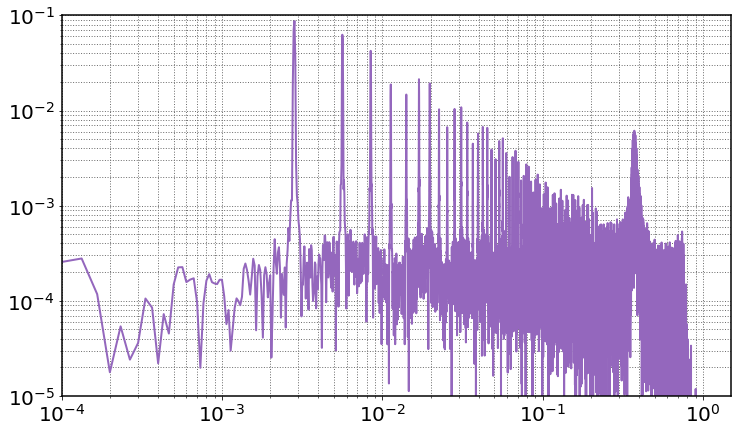

In [63]:
# plot fft results
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

# ax.semilogx(f,V_f_amp,'C4')
# ax.set_ylim([-.005,0.08])

ax.loglog(f,V_f_amp,'C4')
ax.set_ylim([1e-5,1e-1])

ax.set_xlim([1e-4,1.5])

(0.3, 0.5)

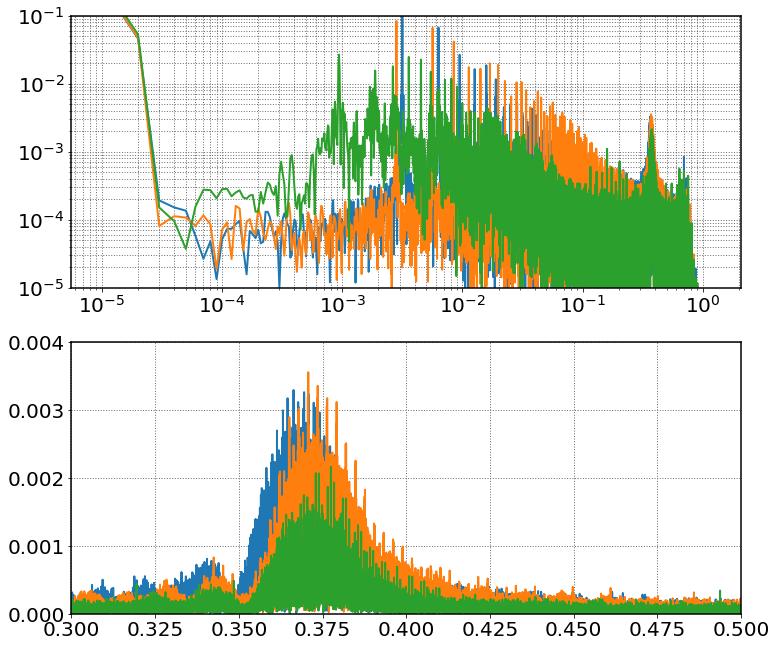

In [101]:
ind_load_list = [7,8,6]
t0 = 1e5
t1 = 2e5


fig = plt.figure(figsize=(12,11))
ax0 = fig.add_subplot(211)
ax1 = fig.add_subplot(212)




ax.set_xlim([1e-4,1.5])
for ii,ind in enumerate(ind_load_list):
    t_load,V_load = load_agilent_trace(name=name_list[ind],data_dir=agilent_data_dir)
    t_load_norm = ((t_load - t_load.min()) / tau_ph).to(u.dimensionless).m
    V_load_norm = V_load / V_load.max()
    t_max = t_load.max().to(u.us)
    dt = t_load[1]-t_load[0].to(u.ps)
    dt_norm = t_load_norm[1] - t_load_norm[0]
    t_max_norm = t_load_norm.max()
    tind0 = find_t(t0,t_load_norm)
    tind1 = find_t(t1,t_load_norm)
    t_fft = t_load_norm[tind0:tind1+1]
    V_fft = V_load_norm[tind0:tind1+1]
    Nt = len(t_fft)
    w = blackman(Nt)
    V_wf = fft(V_fft*w)
    f = np.linspace(0.0, 1.0/(2.0*dt_norm), Nt/2.0)
    f = f[1:Nt_reg//2]
    V_f_amp = (2.0/Nt * np.abs(V_wf[1:Nt//2]))
    ax0.loglog(f,V_f_amp,color='C'+str(ii))
    ax1.plot(f,V_f_amp,color='C'+str(ii))
    
ax0.set_ylim([1e-5,1e-1])
ax1.set_ylim([0,.004])
ax1.set_xlim([0.3,0.5])

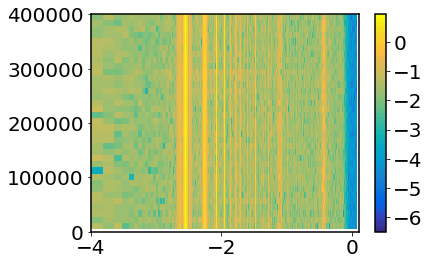

In [93]:
from scipy.signal import spectrogram, get_window
# f, t, Sxx = spectrogram(x, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=-1, mode='psd')[source]

#get_window(window, Nx, fftbins=True)[source]
# window='blackmanharris',
#f_sg, t_sg, Sxx_sg = spectrogram(V_load_norm,fs=1/dt_norm,nperseg=30000,mode='magnitude')

#plt.pcolormesh(t_sg,f_sg,np.log10(Sxx_sg))
#f_sg.shape: 15001
#t_sg.shape: 38
#Sxx_sg.shape: 15001,38
#t_sg_ind = 0
#plt.loglog(f_sg,Sxx_sg[:,t_sg_ind])

f_sg_log = np.log10(f_sg)
Sxx_sg_log = np.log10(Sxx_sg)
plt.pcolormesh(f_sg_log,t_sg,Sxx_sg_log.T)
ax = plt.gca()
ax.set_xlim([-4,0.1])
ax.set_ylim([0,4e5])

plt.colorbar()


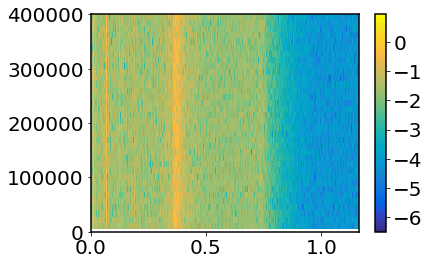

In [94]:
f_sg_log = np.log10(f_sg)
Sxx_sg_log = np.log10(Sxx_sg)
plt.pcolormesh(f_sg,t_sg,Sxx_sg_log.T)
ax = plt.gca()
#ax.set_xlim([-4,0.1])
ax.set_ylim([0,4e5])

plt.colorbar()


## Example 2

In [31]:
# test data load function
## load non-zoomed data
t1_load,V1_load = load_agilent_trace(name='test_ch1',data_dir=agilent_data_dir)
t3_load,V3_load = load_agilent_trace(name='test_ch3',data_dir=agilent_data_dir)
## load of zoom data
t_zoom_load,V_zoom_load = load_agilent_trace(name='zoom_test_ch3',data_dir=agilent_data_dir)

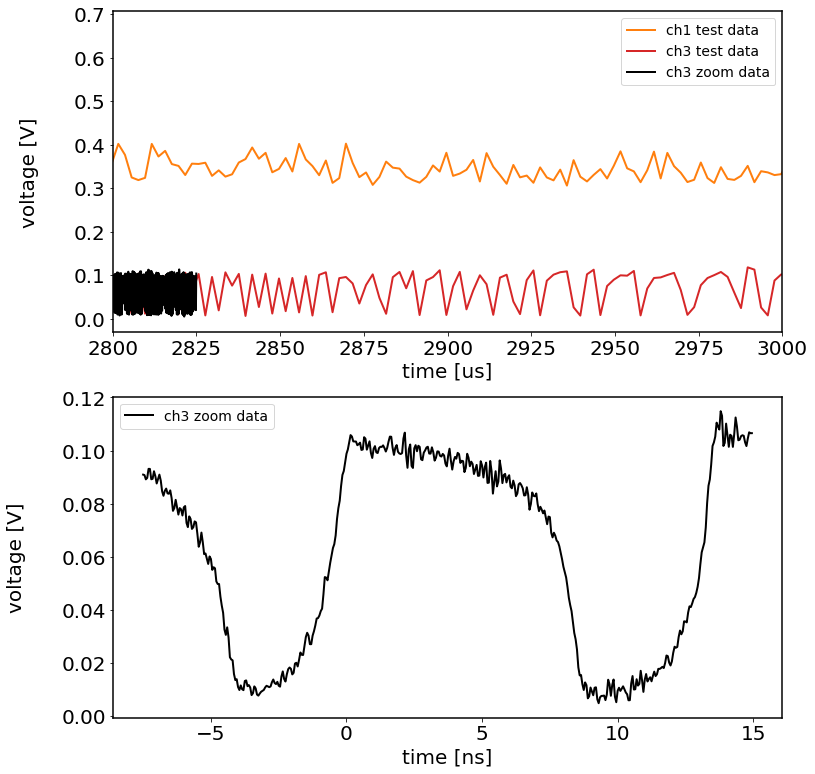

In [32]:
# plot agilent scope test data 
data_skip=2000

fig = plt.figure(figsize=(12,13))
gs = GridSpec(2,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])

ax0.plot(t1_load[::data_skip].to(u.us),V1_load[::data_skip],color='C1',label='ch1 test data')
del t1_load
del V1_load
ax0.plot(t3_load[::data_skip].to(u.us),V3_load[::data_skip],color='C3',label='ch3 test data')
del t3_load
del V3_load
zoom_len = len(t_zoom_load)
ax0.plot(t_zoom_load[::data_skip].to(u.us),V_zoom_load[::data_skip],color='k',label='ch3 zoom data')
t_zoom_plot = t_zoom_load[int(zoom_len/2-150):int(zoom_len/2+300)].to(u.ns) - t_zoom_load[int(zoom_len/2)].to(u.ns)
V_zoom_plot = V_zoom_load[int(zoom_len/2-150):int(zoom_len/2+300)]
ax1.plot(t_zoom_plot,V_zoom_plot,color='k',label='ch3 zoom data')
del t_zoom_load
del V_zoom_load
ax0.set_xlim([2800,3000])
#ax0.set_ylim([-0.05,1.1])
for a in [ax0, ax1]:
    a.grid()
    a.legend()
    a.set_ylabel('voltage [V]',labelpad=35)
ax0.set_xlabel('time [us]')
ax1.set_xlabel('time [ns]')



## spectral analysis of sweep

In [152]:
# import and process Vrb sweep data from fast scope, also save resulting spectra as an array in data folder
sweep_dir = path.normpath(path.join(agilent_data_dir,'Pf_30mW_fineV'))
Vrb = np.linspace(0,2.4,13)
t_delay = np.array([-2.15,1.05,1.5,1.9]) * u.ms
Vrb_str = ['{:1.1f}'.format(VV) for VV in Vrb]
t_delay_str = ['{:1.3f}'.format(tt) for tt in t_delay.m]
#N_f = 50083 # length of freq vector created when this dataset is fft'd
#V_f_amp = np.zeros([N_f,len(Vrb),len(t_delay)])


def sweep_fname(Vind,tind):
    # example 'Agilent_54855A_scope_trace_Vrb0.6_agilent_ch3_P_trans_fast_zoom_delay-2.150'
    return 'Vrb'+Vrb_str[Vind]+'_agilent_ch3_P_trans_fast_zoom_delay'+t_delay_str[tind]



for tind, tt in enumerate(t_delay):
    print('tind: {:}'.format(tind))
    for Vind,VV in enumerate(Vrb):
        t_load,V_load = load_agilent_trace(name=sweep_fname(Vind,tind),data_dir=sweep_dir)
        t_load_norm = ((t_load - t_load.min()) / tau_ph).to(u.dimensionless).m
        V_load_norm = V_load / V_load.max()
        t_max = t_load.max().to(u.us)
        dt = (t_load[1]-t_load[0]).to(u.ps)
        dt_norm = t_load_norm[1] - t_load_norm[0]
        Nt = len(t_load_norm)
        w = blackman(Nt)
        V_wf = fft(V_load_norm*w)
        f = np.linspace(0.0, 1.0/(2.0*dt_norm), Nt/2.0)
        f = f[1:Nt//2]
        V_f_amp = (2.0/Nt * np.abs(V_wf[1:Nt//2]))
        V_f_amp_fname = 'V_f_amp_Vrb'+Vrb_str[Vind]+'_t_delay'+ t_delay_str[tind] +'.np'
        np.save(path.join(sweep_dir,V_f_amp_fname),np.stack((f,V_f_amp)))

tind: 0
tind: 1
tind: 2
tind: 3


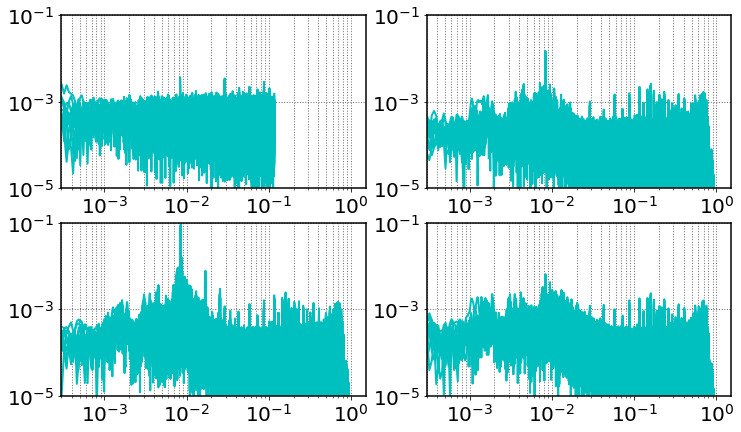

In [156]:
# plot fft results

def sweep_spec_fname(Vind,tind):
    return 'V_f_amp_Vrb'+Vrb_str[Vind]+'_t_delay'+ t_delay_str[tind] +'.np.npy'

fig = plt.figure(figsize=(12,7))
ax00 = fig.add_subplot(221)
ax01 = fig.add_subplot(222)
ax10 = fig.add_subplot(223)
ax11 = fig.add_subplot(224)
ax_list = [ax00,ax01,ax10,ax11]
for tind, tt in enumerate(t_delay):
    ax = ax_list[tind]
    ax.set_xlim([3e-4,1.5])
    for Vind,VV in enumerate(Vrb):
        spec_fname = sweep_spec_fname(Vind,tind)
        spec_fpath = path.join(sweep_dir,spec_fname)
        data = np.load(spec_fpath)
        f = data[0,:]
        spec = data[1,:]
        ax.loglog(f,spec,'C')
        ax.set_ylim([1e-5,1e-1])

        

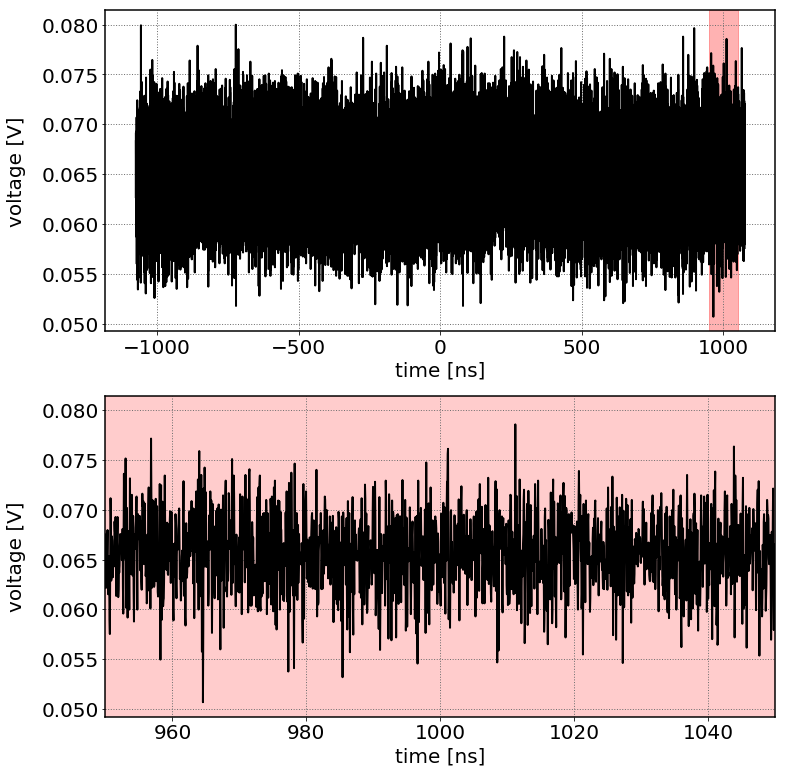

In [183]:
Vind = 12
tind = 2

# plot agilent scope test data 
t_load,V_load = load_agilent_trace(name=sweep_fname(Vind,tind),data_dir=sweep_dir)
data_skip0 = 10 #1
data_skip1 = 1
fig = plt.figure(figsize=(12,13))
gs = GridSpec(2,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
trace_len = len(t_load)
zoom_len0 = 43000 
zoom_len1 = 43000#900
zoom_offset = 1000 * u.ns
x_zoom_width = 100 * u.ns
t_plot0 = t_load[int(trace_len/2-zoom_len0/2):int(trace_len/2+zoom_len0/2)].to(u.ns) - t_load[int(trace_len/2)].to(u.ns)
t_plot1 = t_load[int(trace_len/2-zoom_len1/2):int(trace_len/2+zoom_len1/2)].to(u.ns) - t_load[int(trace_len/2)].to(u.ns)

V_plot0 = V_load[int(trace_len/2-zoom_len0/2):int(trace_len/2+zoom_len0/2)]
V_plot1 = V_load[int(trace_len/2-zoom_len1/2):int(trace_len/2+zoom_len1/2)]
ax0.plot(t_plot0,V_plot0,color='k',label='ch3 zoom data')
ax1.plot(t_plot1,V_plot1,color='k',label='ch3 zoom data')
#ax0.plot(t3_load[::data_skip].to(u.us),V3_load[::data_skip],color='C3',label='ch3 test data')
#del t_load
#del V_load
#ax0.set_xlim([0,28])
x_zoom0 = zoom_offset.m - x_zoom_width.m / 2.0
x_zoom1 = zoom_offset.m + x_zoom_width.m / 2.0
ax0.axvspan(x_zoom0, x_zoom1, alpha=0.3, color='red')
ax1.set_xlim([x_zoom0,x_zoom1])
ax1.axvspan(x_zoom0, x_zoom1, alpha=0.2, color='red')

#ax0.legend()
ax0.set_ylabel('voltage [V]',labelpad=15)
ax1.set_ylabel('voltage [V]',labelpad=15)
ax0.set_xlabel('time [ns]')
ax1.set_xlabel('time [ns]')


# Import and process Vrb sweep

In [ ]:
# set_name ='Pf_30mW_fineV'
# data_dir ='C:/Users/Lab/agilent_scope_data/'
# Vmin = 0 * u.volt
# Vmax = 2.4 * u.volt
# nV = 13
# delay_list = [-2.15*u.ms,1.05*u.ms,1.5*u.ms,1.9*u.ms]


# ODE integration model

## ode solver example

In [5]:
# copied from https://www.danham.me/r/2015/10/29/differential-eq.html
import matplotlib.animation as animation
from scipy.integrate import odeint

def BoatFishSystem(state, t):
    fish, boat = state
    d_fish = fish * (2 - boat - fish)
    d_boat = -boat * (1 - 1.5 * fish)
    return [d_fish, d_boat]


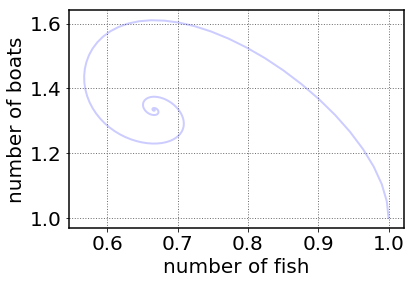

In [8]:
t = np.arange(0, 20, 0.1)
init_state = [1, 1]
state = odeint(BoatFishSystem, init_state, t)

fig = plt.figure()
plt.xlabel('number of fish')
plt.ylabel('number of boats')
plt.plot(state[:, 0], state[:, 1], 'b-', alpha=0.2)

## Thermo-optic + free carrier ODE system

In [22]:
# based on equations 1-3, 15, 17 and 25 in:
# Johnson, Borselli and Painter, "Self-induced optical modulation of the transmission through a high-Q silicon microdisk resonator", OPTICS EXPRESS, Vol. 14, No. 2,  2006 

### Main variables:
# A: intracavity field normalized so that A**2 = U, intracavity energy, [sqrt(J)]
# Delta_omega: effective laser - cavity detuning including nonlinear shifts, [rad/second]
# N: effective number of free carriers overlapping the mode, [1]
# delta_T: mode volume temperature shift from ambient, [K]

### Experimental condition variables:
# lm: laser free space wavelength, [nm]
# f: laser frequency, [THz]
# omega: laser angular frequency, [rad/second]
# E_ph: laser photon energy, [J]
# P_in: pump laser power incident on cavity in bus wavguide, [W]
# Delta_omega_0: laser detuning from cold cavity mode, 2*pi*(f_laser - f_cavity), [rad/sec]
lm = 1550 * u.nm
f = (u.speed_of_light / lm).to(u.THz)
omega = (2 * np.pi * f).to(1/u.second)
E_ph = (u.planck_constant * f).to(u.joule)
#P_in = 0.48 * u.mW
P_in = 0.48 * u.mW # value from Johnson paper
Delta_omega_0 = 2 * np.pi * 0.0 / u.second

### Cavity property variables:
# n_g: group index of waveguide mode near 1550nm, [1] 
# v_g: group velocity of waveguide near 1550nm, [cm/second]
# diameter: diameter of ring resonator, [um]
# circumfrence: circumfrence of ring resonator, [um]
# A_eff: effective area of wavguide mode near 1550nm, [um^2]
# V_eff: effective volume of microring mode near 1550nm, [um^3]
# tau_fc: free carrier lifetime overlapping mode, [ps]
# f_fwhm: microring cavity mode linewidth, [GHz]
# omega_fwhm: microring cavity mode angular linewidth, [rad/second]
# tau_ph: 1/e photon lifetime in microring cavity mode [ps]

n_g = 3.97 # from experiment, 600GHz FSR for 40um diameter ring
v_g = (u.speed_of_light / n_g).to(u.cm/u.second)
diameter = 40 * u.um
circumfrence = np.pi * diameter
A_eff = 0.1 * u.um**2 # not calculated, taken from Ryan's JLT paper
#V_eff = (circumfrence * A_eff).to(u.um**3)
V_eff = (40 * (lm / 3.48)**3 ).to(u.cm**3) # value from Johnson paper
tau_fc = 3 * u.ns # a guess for now
f_fwhm = 1.37 * u.GHz
omega_fwhm = 2 * np.pi * f_fwhm
tau_ph = 1 / omega_fwhm

### material constants:
# n_si: silicon refractive index near 1550nm at 300K, [1]
# c_p_si: silicon heat capacity, [J/g/K]
# rho_si: silicon density, [g/cm^3]
# sigma_c: silicon free carrier absorption cross section near 1550nm, averaged between electrons and holes
# dn_dN: silicon free carrier dispersion near 1550nm, averaged between electrons and holes, [cm^3]
# dn_dT: silicon thermo-optic dispersion near 1550nm, [1/K]
# beta_si: silicon two photon absorption coeffient, [cm/W]

n_si = 3.4757 # RefractiveIndex.INFO, Li 1980, 293K (20C)
c_p_si = 0.7 * u.joule / u.gram / u.degK # ioffe
rho_si = 2.329 * u.gram / u.cm**3 # ioffe
sigma_fc = 1e-21 * u.m**2 # Soref via Johnson, Boroselli and Painter
dn_dN = 1.73e-27 * u.m**3 # Soref via Johnson, Boroselli and Painter
dn_dT = 1.86e-4 / u.degK # via Johnson, Boroselli and Painter
beta_si = 8.4e-12 * u.meter / u.watt # via Johnson, Boroselli and Painter

### mode overlap correction variables (all unitless):
# Gamma_TPA: correction for two photon and Kerr effects
# Gamma_FCA: correction for free carrier effects
# Gamma_th: correction for thermo-optic effect

Gamma_TPA = 1
Gamma_FCA = 1
Gamma_th = 1

### mode volume variables (all in [cm^3]):
# V_TPA: effective volume for two photon and Kerr effects
# V_FCA: effective volume for free carrier effects
# V_th: effective volume for thermo-optic effect

V_TPA = V_eff
V_FCA = V_eff
V_th = V_eff

### rate coefficients:
# xi_TPA: rate of fractional energy absoprtion by TPA per energy U, [rad/sec/J]
# xi_FCA: rate of fractional energy absoprtion by FCA per free carrier N, [rad/sec/carrier] 
# xi_th: rate of mode volume temperature change per unit power absorbed, [K/sec/W]
# xi_fc: rate of free carrier change per unit squared intracavity energy
xi_TPA = Gamma_TPA * beta_si * u.speed_of_light**2 / ( V_TPA * n_g**2 )
xi_FCA = Gamma_FCA * sigma_fc * u.speed_of_light / n_g / V_FCA # eq 9, modified for f.c. number instead of density
xi_th = Gamma_th / ( c_p_si * rho_si * V_th )
xi_fc = Gamma_FCA * beta_si * u.speed_of_light**2 / ( 2 * E_ph * n_g**2 * V_FCA ) # from eq 25, also modified for f.c. number instead of density
### rate variables (all in [rad/second]):
# gamma_TPA: rate of fractional energy absoprtion by TPA, proportional to U
# gamma_FCA: rate of fractional energy absoprtion by FCA, proportional to N which slowly follows U**2
# gamma_th: rate of thermal relaxation of mode volume
# gamma_fc: inverse free-carrier lifetime in cavity mode
# gamma_lin: linear power loss rate from mode, likely dominantly from sidewall roughness scattering
# gamma_c: power coupling rate across directional coupler
# gamma_tot_0: total linear power loss rate from mode, including linear loss and coupling

# gamma_fc = 1 / tau_fc
# gamma_th = 1 * u.MHz # guess for now
# gamma_lin = (2 * np.pi * 380 * u.MHz).to(1/u.second)
# gamma_c = 1 / tau_ph - gamma_lin
# gamma_tot_0 = gamma_lin + gamma_c

# Johnson paper values
gamma_fc = (2 * np.pi * 100 * u.MHz).to(1/u.second)
gamma_th = (2 * np.pi * 0.15 * u.MHz).to(1/u.second) # guess for now
gamma_lin = (2 * np.pi * 860 * u.MHz).to(1/u.second)
gamma_c = (2 * np.pi * 2 * 1.5**2 * u.GHz).to(1/u.second)
gamma_tot_0 = gamma_lin + gamma_c



def f_SiliconMicroringSystem(t,y):
    A_sqrtJ, N, Delta_T_Kelvin = y
    A = A_sqrtJ * np.sqrt(1 * u.joule)
    Delta_T = Delta_T_Kelvin * u.degK
    U = np.abs(A)**2
    gamma_TPA = xi_TPA * U
    gamma_FCA = xi_FCA * N
    gamma_tot = gamma_tot_0 + gamma_TPA + gamma_FCA
    P_abs = ( gamma_TPA + gamma_FCA ) * U # eq 11, neglect linear absorption
    Delta_omega = Delta_omega_0 - omega / n_si * ( dn_dT * Delta_T + dn_dN * N / V_FCA ) # eq 15
    d_A = ( (-gamma_tot / 2.0) + (1j * Delta_omega) ) * A + np.sqrt( gamma_c / 2 * P_in ) # eq !
    d_N = -gamma_fc * N + xi_fc * U**2 # eq 25
    d_Delta_T = -gamma_th * Delta_T + xi_th * P_abs # eq 17
    return [d_A.to(u.joule**(0.5)/u.second).m, 
            d_N.to(1/u.second).m, 
            d_Delta_T.to(u.degK/u.second).m,
           ]

# def jac_SiliconMicroringSystem(t,y):
#     A_sqrtJ, N, Delta_T_Kelvin = y
#     A = A_sqrtJ * np.sqrt(1 * u.joule)
#     Delta_T = Delta_T_Kelvin * u.degK

In [23]:
from scipy.integrate import solve_ivp

t_max = 3 * u.us
#dt = 0.03 * u.ns
A_0 = (0 + 0.0j) * u.joule**(0.5)
N_0 = 0.0
Delta_T_0 = 0 * u.degK

t_span = (0, t_max.to(u.second).m)
y0 = [A_0.to(u.joule**(0.5)).m, 
      N_0,
      Delta_T_0.to(u.degK).m,
     ]
sol = solve_ivp(f_SiliconMicroringSystem, t_span, y0)



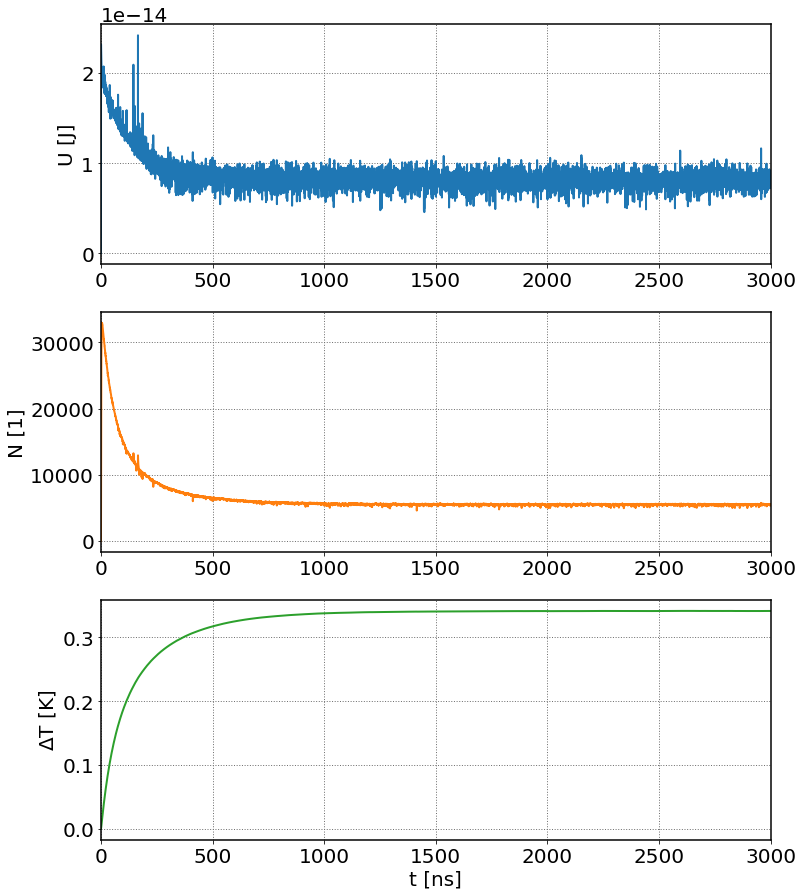

In [24]:
# plot results

t_plot_min = 0 * u.ns
t_plot_max = t_max #10 * u.ns

t = (sol.t*u.second).to(u.ns)
# sol.y.shape: (3,len(sol.t))
A = sol.y[0, :] * np.sqrt(1*u.joule)
N = sol.y[1, :]
Delta_T = sol.y[2, :] * u.degK
U = np.abs(A)**2


fig = plt.figure(figsize=(12,15))
gs = GridSpec(3,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(t, U, '-',color='C0')
ax1.plot(t, N, '-',color='C1')
ax2.plot(t, Delta_T, '-',color='C2')

for a in [ax0,ax1,ax2]:
    a.set_xlim([t_plot_min.to(u.ns).m,t_plot_max.to(u.ns).m])

ax0.set_ylabel('U [J]')
ax1.set_ylabel('N [1]')
ax2.set_ylabel('$\Delta$T [K]')
ax2.set_xlabel('t [ns]')


## attempt 2, with splitting, Jacobian and no units

In [122]:
# parameter values
# first, use values from Johnson, Boroselli and Painter paper to match their results
#pi_factor = 2 * np.pi
pi_factor = 1
#P_in = 40 * u.mW 
P_in = 0.48 * u.mW # value from Johnson paper
n_si = 3.485
lm_l = 1454.12 * u.nm
lm_c = 1453.98 * u.nm
f_l = (u.speed_of_light / lm_l).to(u.THz)
omega_l = (2 * np.pi * f_l).to(1/u.second)
f_c = (u.speed_of_light / lm_c).to(u.THz)
omega_c = (2 * np.pi * f_c).to(1/u.second)
omega = omega_l
#Delta_omega_0 = omega_l - omega_c
#Delta_omega_0 = omega_c - omega_l
E_ph = (u.planck_constant * f_l).to(u.joule)
c_p_si = 0.7 * u.joule / u.gram / u.degK # ioffe
rho_si = 2.329 * u.gram / u.cm**3 # ioffe
sigma_fc = 1e-21 * u.m**2 # Soref via Johnson, Boroselli and Painter
dn_dN = -1.73e-27 * u.m**3 # Soref via Johnson, Boroselli and Painter
dn_dT = 1.86e-4 / u.degK # via Johnson, Boroselli and Painter
beta_si = 8.4e-12 * u.meter / u.watt # Johnson, Boroselli and Painter
V_TPA = 46 * ( lm_c / n_si )**3
V_FCA = 39.9 * ( lm_c / n_si )**3
V_th = V_TPA 
Gamma_TPA = 0.99
Gamma_FCA = 0.99
Gamma_th = 0.99
gamma_0_c = pi_factor * 4.1 * u.GHz
gamma_0_s = pi_factor * 5.8 * u.GHz
gamma_lin = pi_factor * 0.86 * u.GHz
kappa = 1.5 * u.GHz**0.5
gamma_e_0 = pi_factor * 2 * kappa**2
gamma_rad_c =  gamma_0_c - gamma_e_0 - gamma_lin
gamma_rad_s =  gamma_0_s - gamma_e_0 - gamma_lin
gamma_beta = pi_factor * 14.3 * u.GHz
gamma_fc = pi_factor * 98 * u.MHz
gamma_th = pi_factor * 0.15 * u.MHz
n_g = 3.75 # guess, info not provided in TJ Johnson paper
Delta_omega_0 = -3 * gamma_0_c

xi_TPA = Gamma_TPA * beta_si * u.speed_of_light**2 / ( V_TPA * n_g**2 )
xi_FCA = Gamma_FCA * sigma_fc * u.speed_of_light /  n_g 
xi_fc = Gamma_FCA * beta_si * u.speed_of_light**2 / ( V_FCA**2 * n_g**2 * 2 * E_ph )
xi_th = Gamma_th / ( c_p_si * rho_si * V_th )

# convert all parameters to SI (MKS) units and then strip pint units

P_in = P_in.to(u.watt).m
dn_dN = dn_dN.to(u.m**3).m
dn_dT = dn_dT.to(1/u.degK).m

xi_TPA = xi_TPA.to(1/u.second/u.joule).m # two photon loss rate per intracavity energy
xi_FCA = xi_FCA.to(u.m**3/u.second).m # FCA loss rate per free carrier density
xi_fc = xi_fc.to(1/u.m**3/u.second/u.joule**2).m # free carrier production rate per square intracavity energy
xi_th = xi_th.to(u.degK/u.second/u.watt).m # temperature change rate per absorbed power

gamma_0_c = gamma_0_c.to(1/u.second).m
gamma_0_s = gamma_0_s.to(1/u.second).m
gamma_e_0 = gamma_e_0.to(1/u.second).m
gamma_beta = gamma_beta.to(1/u.second).m
gamma_fc = gamma_fc.to(1/u.second).m
gamma_th = gamma_th.to(1/u.second).m
omega = omega.to(1/u.second).m
Delta_omega_0 = Delta_omega_0.to(1/u.second).m


In [123]:
# define functions for ode solver using parameters
def f_SiliconMicroring(t,y):
    a_c, a_s, N, Delta_T = y
    U_c = np.abs(a_c)**2
    U_s = np.abs(a_s)**2
    d_a_c =  ( -0.5 * ( gamma_0_c + xi_TPA * U_c + xi_FCA * N ) + 1j * ( Delta_omega_0 + gamma_beta / 2 - omega / n_si * ( dn_dT * Delta_T + dn_dN * N ) ) ) * a_c + np.sqrt( gamma_e_0 / 2 * P_in ) 
    d_a_s =  ( -0.5 * ( gamma_0_s + xi_TPA * U_s + xi_FCA * N ) + 1j * ( Delta_omega_0 - gamma_beta / 2 - omega / n_si * ( dn_dT * Delta_T + dn_dN * N ) ) ) * a_s + np.sqrt( gamma_e_0 / 2 * P_in ) 
    d_N = -gamma_fc * N + xi_fc * ( U_c**2 + U_s**2 )
    d_Delta_T = -gamma_th * Delta_T + xi_th * ( xi_TPA * ( U_c**2 + U_s**2 ) + xi_FCA * N * ( U_c + U_s ) )
    return [ d_a_c, d_a_s, d_N, d_Delta_T ]

def jac_SiliconMicroring(t,y):
    a_c, a_s, N, Delta_T = y
    a_c_mod = np.abs(a_c)
    a_s_mod = np.abs(a_s)
    U_c = a_c_mod**2
    U_s = a_s_mod**2
    d_d_a_c_d_a_c = ( -0.5 * ( gamma_0_c + 2 * xi_TPA * U_c + xi_FCA * N ) + 1j * ( Delta_omega_0 + gamma_beta / 2 - omega / n_si * ( dn_dT * Delta_T + dn_dN * N ) ) ) 
    d_d_a_s_d_a_s = ( -0.5 * ( gamma_0_s + 2 * xi_TPA * U_s + xi_FCA * N ) + 1j * ( Delta_omega_0 - gamma_beta / 2 - omega / n_si * ( dn_dT * Delta_T + dn_dN * N ) ) ) 
    d_d_a_c_d_N = -1j * omega / n_si * dn_dN * a_c
    d_d_a_c_d_Delta_T = -1j * omega / n_si * dn_dT * a_c
    d_d_a_s_d_N = -1j * omega / n_si * dn_dN * a_s
    d_d_a_s_d_Delta_T = -1j * omega / n_si * dn_dT * a_s
    d_d_a_c = [ d_d_a_c_d_a_c, 0, d_d_a_c_d_N, d_d_a_c_d_Delta_T ]
    d_d_a_s = [ 0, d_d_a_s_d_a_s, d_d_a_s_d_N, d_d_a_s_d_Delta_T ]
    d_d_N = [ 4 * xi_fc * a_c_mod**3, 4 * xi_fc * a_s_mod**3, -gamma_fc, 0.0  ]
    d_d_Delta_T = [ xi_th * ( 4 * xi_TPA * a_c_mod**3 + 2 * xi_FCA * N * a_c_mod ),
                    xi_th * ( 4 * xi_TPA * a_s_mod**3 + 2 * xi_FCA * N * a_s_mod ),
                    xi_th * xi_FCA * ( U_c + U_s ),
                    -gamma_th,
                  ]
    return [ d_d_a_c, d_d_a_s, d_d_N, d_d_Delta_T ]

In [128]:
t_max = 30 * u.us
a_c_0 = (1.0e-17 + 0.0j) * u.joule**(0.5)
a_s_0 = (1.0e-17 + 0.0j) * u.joule**(0.5)
N_0 = 0.0 / u.cm**3
Delta_T_0 = 0 * u.degK

t_span = (0, t_max.to(u.second).m)
y0 = [a_c_0.to(u.joule**(0.5)).m, 
      a_s_0.to(u.joule**(0.5)).m, 
      N_0.to(1/u.m**3).m,
      Delta_T_0.to(u.degK).m,
     ]

from scipy.integrate import solve_ivp
#sol = solve_ivp(f_SiliconMicroring, t_span, y0, method='BDF', jac=jac_SiliconMicroring)
sol = solve_ivp(f_SiliconMicroring, t_span, y0, method='BDF')

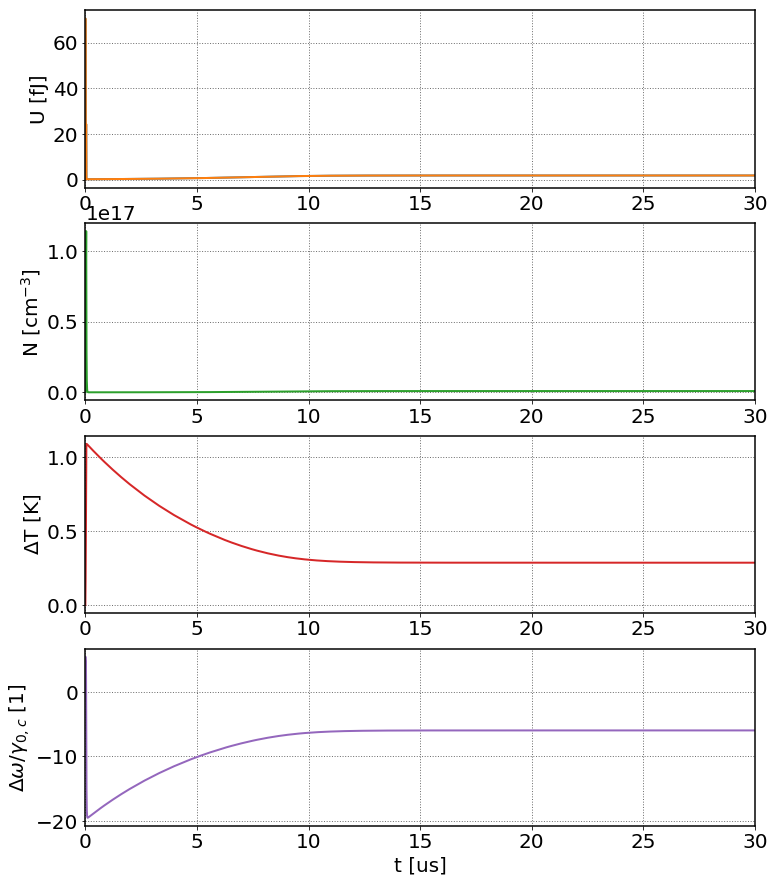

In [129]:
# plot results

t_plot_min = 0 * u.ns
#t_plot_max = 6 * u.ns
t_plot_max = t_max
t = (sol.t*u.second).to(u.us)
# sol.y.shape: (3,len(sol.t))
a_c = sol.y[0, :] * np.sqrt(1*u.joule)
a_s = sol.y[1, :] * np.sqrt(1*u.joule)
N = (sol.y[2, :] / u.m**3).to(1/u.cm**3)
Delta_T = sol.y[3, :] * u.degK
U_c = (np.abs(a_c)**2).to(u.fJ)
U_s = (np.abs(a_c)**2).to(u.fJ)
Delta_omega = ((Delta_omega_0 + gamma_beta / 2 - omega / n_si * ( dn_dT * Delta_T.m + dn_dN * N.to(1/u.m**3).m ) ) / gamma_0_c )

fig = plt.figure(figsize=(12,15))
gs = GridSpec(4,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])

ax0.plot(t, U_c, '-',color='C0')
ax0.plot(t, U_s, '-',color='C1')
ax1.plot(t, N, '-',color='C2')
ax2.plot(t, Delta_T, '-',color='C3')
ax3.plot(t, Delta_omega, '-',color='C4')

for a in [ax0,ax1,ax2,ax3]:
    a.set_xlim([t_plot_min.to(u.us).m,t_plot_max.to(u.us).m])

ax0.set_ylabel('U [fJ]')
ax1.set_ylabel('N [cm$^{-3}$]')
ax2.set_ylabel('$\Delta$T [K]')
ax3.set_ylabel('$\Delta\omega/\gamma_{0,c}$ [1]')
ax3.set_xlabel('t [us]')


## attempt 3, nonthermal

In [135]:
# parameter values
# first, use values from Johnson, Boroselli and Painter paper to match their results
#pi_factor = 2 * np.pi
pi_factor = 1
#P_in = 40 * u.mW 
P_in = 0.48 * u.mW # value from Johnson paper
n_si = 3.485
lm_l = 1454.12 * u.nm
lm_c = 1453.98 * u.nm
f_l = (u.speed_of_light / lm_l).to(u.THz)
omega_l = (2 * np.pi * f_l).to(1/u.second)
f_c = (u.speed_of_light / lm_c).to(u.THz)
omega_c = (2 * np.pi * f_c).to(1/u.second)
omega = omega_l
#Delta_omega_0 = omega_l - omega_c
#Delta_omega_0 = omega_c - omega_l
E_ph = (u.planck_constant * f_l).to(u.joule)
c_p_si = 0.7 * u.joule / u.gram / u.degK # ioffe
rho_si = 2.329 * u.gram / u.cm**3 # ioffe
sigma_fc = 1e-21 * u.m**2 # Soref via Johnson, Boroselli and Painter
dn_dN = -1.73e-27 * u.m**3 # Soref via Johnson, Boroselli and Painter
dn_dT = 1.86e-4 / u.degK # via Johnson, Boroselli and Painter
beta_si = 8.4e-12 * u.meter / u.watt # Johnson, Boroselli and Painter
V_TPA = 46 * ( lm_c / n_si )**3
V_FCA = 39.9 * ( lm_c / n_si )**3
V_th = V_TPA 
Gamma_TPA = 0.99
Gamma_FCA = 0.99
Gamma_th = 0.99
gamma_0_c = pi_factor * 4.1 * u.GHz
gamma_0_s = pi_factor * 5.8 * u.GHz
gamma_lin = pi_factor * 0.86 * u.GHz
kappa = 1.5 * u.GHz**0.5
gamma_e_0 = pi_factor * 2 * kappa**2
gamma_rad_c =  gamma_0_c - gamma_e_0 - gamma_lin
gamma_rad_s =  gamma_0_s - gamma_e_0 - gamma_lin
gamma_beta = pi_factor * 14.3 * u.GHz
gamma_fc = pi_factor * 98 * u.MHz
gamma_th = pi_factor * 0.15 * u.MHz
n_g = 3.75 # guess, info not provided in TJ Johnson paper
Delta_omega_0 = 3 * gamma_0_c

xi_TPA = Gamma_TPA * beta_si * u.speed_of_light**2 / ( V_TPA * n_g**2 )
xi_FCA = Gamma_FCA * sigma_fc * u.speed_of_light /  n_g 
xi_fc = Gamma_FCA * beta_si * u.speed_of_light**2 / ( V_FCA**2 * n_g**2 * 2 * E_ph )
xi_th = Gamma_th / ( c_p_si * rho_si * V_th )

# convert all parameters to SI (MKS) units and then strip pint units

P_in = P_in.to(u.watt).m
dn_dN = dn_dN.to(u.m**3).m
dn_dT = dn_dT.to(1/u.degK).m

xi_TPA = xi_TPA.to(1/u.second/u.joule).m # two photon loss rate per intracavity energy
xi_FCA = xi_FCA.to(u.m**3/u.second).m # FCA loss rate per free carrier density
xi_fc = xi_fc.to(1/u.m**3/u.second/u.joule**2).m # free carrier production rate per square intracavity energy
xi_th = xi_th.to(u.degK/u.second/u.watt).m # temperature change rate per absorbed power

gamma_0_c = gamma_0_c.to(1/u.second).m
gamma_0_s = gamma_0_s.to(1/u.second).m
gamma_e_0 = gamma_e_0.to(1/u.second).m
gamma_beta = gamma_beta.to(1/u.second).m
gamma_fc = gamma_fc.to(1/u.second).m
gamma_th = gamma_th.to(1/u.second).m
omega = omega.to(1/u.second).m
Delta_omega_0 = Delta_omega_0.to(1/u.second).m


In [136]:
# define functions for ode solver using parameters
def f_SiliconMicroring(t,y):
    a_c, a_s, N = y
    U_c = np.abs(a_c)**2
    U_s = np.abs(a_s)**2
    d_a_c =  ( -0.5 * ( gamma_0_c + xi_TPA * U_c + xi_FCA * N ) + 1j * ( Delta_omega_0 + gamma_beta / 2 - omega / n_si * ( dn_dN * N ) ) ) * a_c + np.sqrt( gamma_e_0 / 2 * P_in ) 
    d_a_s =  ( -0.5 * ( gamma_0_s + xi_TPA * U_s + xi_FCA * N ) + 1j * ( Delta_omega_0 - gamma_beta / 2 - omega / n_si * ( dn_dN * N ) ) ) * a_s + np.sqrt( gamma_e_0 / 2 * P_in ) 
    d_N = -gamma_fc * N + xi_fc * ( U_c**2 + U_s**2 )
    return [ d_a_c, d_a_s, d_N ]

def jac_SiliconMicroring(t,y):
    a_c, a_s, N = y
    a_c_mod = np.abs(a_c)
    a_s_mod = np.abs(a_s)
    U_c = a_c_mod**2
    U_s = a_s_mod**2
    d_d_a_c_d_a_c = ( -0.5 * ( gamma_0_c + 2 * xi_TPA * U_c + xi_FCA * N ) + 1j * ( Delta_omega_0 + gamma_beta / 2 - omega / n_si * (  dn_dN * N ) ) ) 
    d_d_a_s_d_a_s = ( -0.5 * ( gamma_0_s + 2 * xi_TPA * U_s + xi_FCA * N ) + 1j * ( Delta_omega_0 - gamma_beta / 2 - omega / n_si * ( dn_dN * N ) ) ) 
    d_d_a_c_d_N = -1j * omega / n_si * dn_dN * a_c
    d_d_a_s_d_N = -1j * omega / n_si * dn_dN * a_s
    d_d_a_c = [ d_d_a_c_d_a_c, 0, d_d_a_c_d_N]
    d_d_a_s = [ 0, d_d_a_s_d_a_s, d_d_a_s_d_N]
    d_d_N = [ 4 * xi_fc * a_c_mod**3, 4 * xi_fc * a_s_mod**3, -gamma_fc ]
    return [ d_d_a_c, d_d_a_s, d_d_N ]

In [140]:
t_max = 30 * u.us
a_c_0 = (1.0e-17 + 0.0j) * u.joule**(0.5)
a_s_0 = (1.0e-17 + 0.0j) * u.joule**(0.5)
N_0 = 0.0 / u.cm**3

t_span = (0, t_max.to(u.second).m)
y0 = [a_c_0.to(u.joule**(0.5)).m, 
      a_s_0.to(u.joule**(0.5)).m, 
      N_0.to(1/u.m**3).m,
     ]

from scipy.integrate import solve_ivp
#sol = solve_ivp(f_SiliconMicroring, t_span, y0, method='BDF', jac=jac_SiliconMicroring)
sol = solve_ivp(f_SiliconMicroring, t_span, y0, method='BDF')

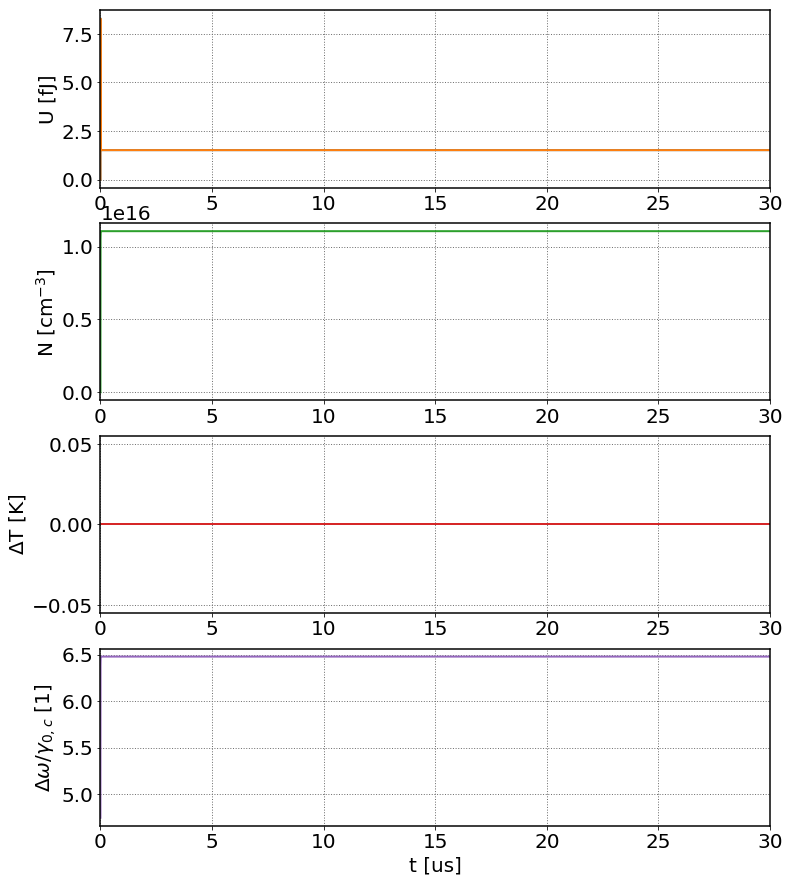

In [141]:
# plot results

t_plot_min = 0 * u.ns
#t_plot_max = 6 * u.ns
t_plot_max = t_max
t = (sol.t*u.second).to(u.us)
# sol.y.shape: (3,len(sol.t))
a_c = sol.y[0, :] * np.sqrt(1*u.joule)
a_s = sol.y[1, :] * np.sqrt(1*u.joule)
N = (sol.y[2, :] / u.m**3).to(1/u.cm**3)
Delta_T = np.zeros(len(sol.y[2, :])) * u.degK
U_c = (np.abs(a_c)**2).to(u.fJ)
U_s = (np.abs(a_c)**2).to(u.fJ)
Delta_omega = ((Delta_omega_0 + gamma_beta / 2 - omega / n_si * ( dn_dT * Delta_T.m + dn_dN * N.to(1/u.m**3).m ) ) / gamma_0_c )

fig = plt.figure(figsize=(12,15))
gs = GridSpec(4,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])

ax0.plot(t, U_c, '-',color='C0')
ax0.plot(t, U_s, '-',color='C1')
ax1.plot(t, N, '-',color='C2')
ax2.plot(t, Delta_T, '-',color='C3')
ax3.plot(t, Delta_omega, '-',color='C4')

for a in [ax0,ax1,ax2,ax3]:
    a.set_xlim([t_plot_min.to(u.us).m,t_plot_max.to(u.us).m])

ax0.set_ylabel('U [fJ]')
ax1.set_ylabel('N [cm$^{-3}$]')
ax2.set_ylabel('$\Delta$T [K]')
ax3.set_ylabel('$\Delta\omega/\gamma_{0,c}$ [1]')
ax3.set_xlabel('t [us]')


## Attempt 4, based on Ryan's paper with only a

In [407]:
# define parameters and functions for ode solver 

Delta = -3.0
s = np.sqrt(5.0)
tau = 0.2 # = tau_c / tau_ph in ryan's model
mu = 30.0
r = 0.2
chi = 10.0

# # without Kerr + TPA terms

# def f_DrivenCavity(t,y):
#     a , n = y
#     d_a = ( ( -1 - 1j*Delta) + ( -1 / mu - 1j ) * n ) * a + s
#     d_n = -2 / tau * n + chi * np.abs(a)**4
#     return [d_a, d_n]

# def jac_DrivenCavity(t,y):
#     a , n = y
#     d_d_a = [ ( ( -1 - 1j*Delta) + ( -1 / mu - 1j ) * n ), ( -1 / mu - 1j ) * a ]
#     d_d_n = [ 4 * chi * np.abs(a)**3, -2 / tau ]
#     return [d_d_a, d_d_n]

# with Kerr + TPA terms

def f_DrivenCavity(t,y):
    a , n = y
    d_a = ( ( -0.5 + 1j*Delta) + ( 1j - r ) * np.abs(a)**2 + ( -1 / mu - 1j ) * n ) * a + s
    d_n = -n / tau * + chi * np.abs(a)**4
    return [d_a, d_n]

def jac_DrivenCavity(t,y):
    a , n = y
    d_d_a = [ ( ( -0.5 + 1j*Delta) + 2 * ( 1j - r ) * np.abs(a)**2 + ( -1 / mu - 1j ) * n ), ( -1 / mu - 1j ) * a ]
    d_d_n = [ 4 * chi * np.abs(a)**3, -1 / tau ]
    return [d_d_a, d_d_n]

In [408]:
t_max = 20.0
a0 = 0.0 + 0.0j
n0 = 0.0
y0 = [a0,n0]
t_span = (0.0, t_max)

sol = solve_ivp(f_DrivenCavity, t_span, y0, method='BDF', jac=jac_DrivenCavity)
#sol = solve_ivp(f_DrivenCavity, t_span, y0, method='BDF')
#sol = solve_ivp(f_DrivenCavity, t_span, y0, method='RK45')

KeyboardInterrupt: 

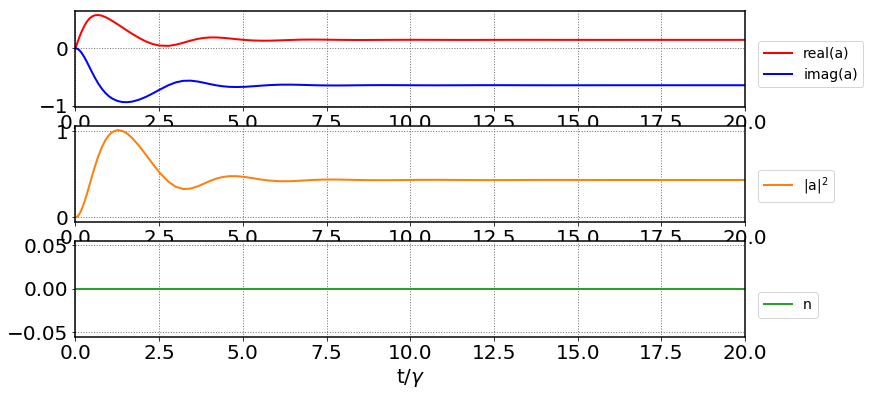

In [406]:
# plot results

t_plot_min = 0.0
t_plot_max = t_max
t = sol.t
a = sol.y[0, :]
n = sol.y[1, :]
U = np.abs(a)**2

fig = plt.figure(figsize=(12,6))
gs = GridSpec(3,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])

ax0.plot(t, np.real(a), '-',color='red',label='real(a)')
ax0.plot(t, np.imag(a), '-',color='blue',label='imag(a)')

ax0.legend(loc=(1.02,0.2))
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([t_plot_min,t_plot_max])


ax1.plot(t, U,'-',color='C1',label='|a|$^2$')
ax1.legend(loc=(1.02,0.2))
ax2.plot(t, n,'-',color='C2',label='n')
ax2.legend(loc=(1.02,0.2))
ax2.set_xlabel('t/$\gamma$')

## attempt 5, based on Ryan's paper with a and a*

In [409]:
# define parameters and functions for ode solver based on Ryan's old paper

Delta = -3.0
beta = 2.0
gamma = 0.75
delta = 0.07
r = 0.2
chi = 150 #10.0

# without Kerr + TPA terms

# def f_DrivenCavity(t,y):
#     a, a_star , n = y
#     d_a = ( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n ) * a + beta
#     d_a_star = np.conjugate( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n ) * a_star + beta
#     d_n = -gamma * n + chi * (a*a_star)**2
#     return [d_a, d_a_star, d_n]

# def jac_DrivenCavity(t,y):
#     a , a_star , n = y
#     d_d_a = [ ( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n ), 0, ( -delta - 1j ) * a ]
#     d_d_a_star = [ 0, np.conjugate( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n ) , np.conjugate(( -delta - 1j ) * a) ]
#     d_d_n = [ 2 * chi * a_star**2 * a , 2 * chi * a**2 * a_star , -gamma ]
#     return [d_d_a, d_d_a_star, d_d_n]

# with TPA term

def f_DrivenCavity(t,y):
    a, a_star , n = y
    d_a = ( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n - (a * a_star) ) * a + beta
    d_a_star = np.conjugate( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n - (a * a_star) ) * a_star + beta
    d_n = -gamma * n + chi * (a*a_star)**2
    return [d_a, d_a_star, d_n]

def jac_DrivenCavity(t,y):
    a , a_star , n = y
    d_d_a = [ ( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n ), -a**2, ( -delta - 1j ) * a ]
    d_d_a_star = [ -1*np.conjugate(a**2), np.conjugate( ( -0.5 - 1j*Delta) + ( -delta - 1j ) * n ) , np.conjugate(( -delta - 1j ) * a) ]
    d_d_n = [ 2 * chi * a_star**2 * a , 2 * chi * a**2 * a_star , -gamma ]
    return [d_d_a, d_d_a_star, d_d_n]


In [410]:
# old model definitions for ode solver based on Ryan's new paper

Delta = 3.0
s = np.sqrt(5.0)
tau = 0.2 # = tau_c / tau_ph in ryan's model
mu = 30.0
r = 0.2
chi = 10.0


# without TPA term

# def f_DrivenCavity(t,y):
#     a, a_star , n = y
#     d_a = ( ( -1 - 1j*Delta) + ( -delta - 1j ) * n ) * a + s
#     d_a_star = np.conjugate( ( -1 - 1j*Delta) + ( -delta - 1j ) * n ) * a_star + s
#     d_n = -gamma * n + chi * (a*a_star)**2
#     return [d_a, d_a_star, d_n]

# def jac_DrivenCavity(t,y):
#     a , a_star , n = y
#     d_d_a = [ ( ( -1 - 1j*Delta) + ( -delta - 1j ) * n ), 0, ( -delta - 1j ) * a ]
#     d_d_a_star = [ 0, np.conjugate( ( -1 - 1j*Delta) + ( -delta - 1j ) * n ) , np.conjugate(( -delta - 1j ) * a) ]
#     d_d_n = [ 2 * chi * a_star**2 * a , 2 * chi * a**2 * a_star , -gamma ]
#     return [d_d_a, d_d_a_star, d_d_n]

# with TPA term

# def f_DrivenCavity(t,y):
#     a, a_star , n = y
#     d_a = ( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ) * a + s
#     d_a_star = np.conjugate( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ) * a_star + s
#     d_n = -n / tau + chi * (a*a_star)**2
#     return [d_a, d_a_star, d_n]

# def jac_DrivenCavity(t,y):
#     a , a_star , n = y
#     d_d_a = [ ( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ), (1j - r) * a**2, ( -1/mu - 1j ) * a ]
#     d_d_a_star = [ -1*np.conjugate((1j - r) * a**2), np.conjugate( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ) , np.conjugate(( -1/mu - 1j ) * a) ]
#     d_d_n = [ 2 * chi * a_star**2 * a , 2 * chi * a**2 * a_star , -1/tau ]
#     return [d_d_a, d_d_a_star, d_d_n]




I'm attempting to add a the temperature of the mode volume to the model. Following <cite data-cite="506115/L3WRQ9MF"></cite> (Eq. 17), I want to include a time dependent deflection of the mode volume temperature $\Delta T$ that evolves according to

\begin{align}
\frac{d}{dt}\Delta T \; [\mathrm{K/s}] &=& -k \Delta T + C^{-1}\left(Q_{abs,TPA} + Q_{abs,FCA} \right) \\
   &=& -k \Delta T + C^{-1}\left[ \beta \xi_a^4 \left(|\bar{a}_c|^4 + |\bar{a}_s|^4\right) + \sigma \xi_n \xi_a^2 \bar{n} \left(|\bar{a}_c|^2 + |\bar{a}_s|^2\right) \right] \\
   &=& -k \Delta T + C^{-1}\left[ \frac{r}{2\gamma v_g^2 \tau_{ph}^2} \left(|\bar{a}_c|^4 + |\bar{a}_s|^4\right) + \frac{1}{2\mu\gamma v_g^2 \tau_{ph}^2} \bar{n} \left(|\bar{a}_c|^2 + |\bar{a}_s|^2\right) \right] \label{'dT_dt_prelim'}
\end{align}

where $Q_{abs,TPA}$ and $Q_{abs,FCA}$ are the absorption power densities (in W/cm$^3$) due to TPA and FCA respectively, $k$ is the temperature relaxation rate of the mode volume (in 1/second). $C^{-1}$ is the rate of temperature increase per unit absorbed power in units of K/second/(Watt/cm$^3$) = K/(Joule/cm$^3$). Just from the units we can tell that $C^{-1}$ (to a good approximation) is just the volumetric heat capacity of silicon,

\begin{equation}
C^{-1} = \left[c_\mathrm{p,si}\rho_\mathrm{si}\right]^{-1} = \left[(2.33\mathrm{g}\mathrm{cm}^{-3}) (0.7\mathrm{J}\mathrm{K}^{-1}\mathrm{g}^{-1})\right]^{-1} = 0.61\mathrm{K}\mathrm{J}^{-1}\mathrm{cm}^3
\end{equation}

To be consistent with the field and carrier density normalizations in Ryan's model <cite data-cite="506115/BV8BCET8"></cite> (Eq. 1 and Appendix Table 1), I've rexpressed $Q_{abs,TPA}$ and $Q_{abs,FCA}$ in terms of the normalized "cosine" and "sine" field amplitudes $\bar{a}_c$ and $\bar{a}_s$, the normalized free carrier density $\bar{n}$ and their respective normalization constants $\xi_a$ and $\xi_n$, defined as

\begin{align}
\xi_a = \left( 2 \gamma v_g \tau_{ph} \right)^{-1/2} \\
\xi_n = \left( \mu \sigma v_g \tau_{ph} \right)^{-1} \\
\end{align}

where $v_g$ (cm/s) is the group velocity of light in the resonator, $\tau_{ph}$ is the 1/e$^2$ photon lifetime equal to 2$\pi\,\Delta f$ where $\Delta f$ is the full width, half maximum of the Lorentzian lineshape of the resonance in GHz, $\sigma$=1.45$\cdot$10$^{-17}$cm$^{-3}$ is the absorption cross section of free carriers in silicon (averaged between electrons and holes), $\gamma=2\pi n_2/\lambda$=3.1$\cdot$10$^{-17}$cm/W is the nonlinear refraction coefficient for silicon, and $r=\beta \lambda / 4\pi n_2$=0.189 and $\mu=\frac{4\pi}{\lambda}\frac{|dn/dn_c|}{d\alpha/dn_c}$=30 are TPA/Kerr and FCD/FCA strength ratios for silicon, respectively. 

We're not done yet! We need to normalize the temperature to be in units of cavity linewidth given the strength of the thermo-optic effect in silicon, and then normalize the rates of temperature relaxation and increase per power to be in those wacky new temperature units. At the end of the day we should only need two new coefficients for this added dynamical equation, and as we can see most of the coefficients of the power density terms are shared and can thus be absorbed into a redefined $C^{-1}$ for normalized temperature.

First we rescale the temperature deflection $\Delta T$ to use $\Delta T = \xi_{T} T$ such that

\begin{align*}
\left| \Delta \omega_{\Delta T} \right|_{T=1} &=& \frac{\omega}{n_{si}}\frac{dn_{si}}{dT}\xi_{T}
 &=& 1/\tau_{ph} \\
 \Rightarrow \xi_{T} &=& \left[\frac{\omega}{n_{si}}\frac{dn_{si}}{dT}\tau_{ph} \right]^{-1} &=& \left[\delta_T v_g \tau_{ph} \right]^{-1}
\end{align*}

where $\delta_T=\frac{\omega}{c}\frac{dn_{si}}{dT}$, in agreement (up to a discrepancy between $n_{si}$ and $n_g$ that I think has to do with the thermal overlap integral) with Equations 10 and 34 of <cite data-cite="506115/S3G5P6UY"></cite>. Now we revisit Eq. \ref{'dT_dt_prelim'}, pulling the factor of $\frac{1}{2\gamma v_g^2 \tau_{ph}^2}$ out of the brackets in the second term and dividing by $\xi_{T} / \tau_{ph}$ to normalize it for calculating the rate of change of $T$ per $\tau_{ph}$ instead instead of $\Delta T$ per second:

\begin{align}
\frac{dT}{dt} &=& -k T +  \zeta\left[ r \left(|\bar{a}_c|^4 + |\bar{a}_s|^4\right) + \frac{1}{\mu} \bar{n} \left(|\bar{a}_c|^2 + |\bar{a}_s|^2\right)  \right] \\
\zeta &=& \frac{\tau_{ph}}{\xi_T}\frac{1}{2 C \gamma v_g^2 \tau_{ph}^2} = \frac{\delta_T}{2 C \gamma v_g  }
\end{align}



In [2]:
rho_si = 2.33 * u.gram / u.cm**3 # density
c_p_si = 0.7 * u.joule / u.degK / u.gram # specific heat capacity near 300K
k_si = 1.3 * u.watt / u.cm / u.degK # thermal conductivity near 300K
C_si = (rho_si * c_p_si).to(u.joule / u.degK / u.cm**3) # volumetric heat capacity near 300K
alpha_si = (k_si / C_si).to(u.cm**2 / u.second) # thermal diffusivity
print('C_si: {:3.3g} J K^-1 cm^-3'.format(C_si.m))
print('alpha_si: {:3.3g} cm^2 / s'.format(alpha_si.m))


rho_glass = 2.2 * u.gram / u.cm**3 # density
c_p_glass = 0.7 * u.joule / u.degK / u.gram # specific heat capacity near 300K
k_glass = 1.38e-2 * u.watt / u.cm / u.degK
C_glass = (rho_glass * c_p_glass).to(u.joule / u.degK / u.cm**3) # volumetric heat capacity near 300K
alpha_glass = (k_glass / C_glass).to(u.cm**2 / u.second) # thermal diffusivity
print('C_glass: {:3.3g} J K^-1 cm^-3'.format(C_glass.m))
print('alpha_glass: {:3.3g} cm^2 / s'.format(alpha_glass.m))

lm = 1550*u.nm
omega = (2*np.pi * u.speed_of_light / lm).to(1/u.second)
dn_dT = 1.8e-4 / u.degK # at 1550nm, 300K
gamma = 3.1e-9 * u.cm / u.watt # = (2 \pi n_2 / \lambda) at 1550nm, from Ryan's older (arXiv version paper)
delta_T = (omega / u.speed_of_light * dn_dT).to(1/u.degK/u.cm)
n_g = 3.97 # from experiment, 600GHz FSR for 40um diameter ring
v_g = u.speed_of_light / n_g
#tau_ph = 80 * u.ps # from experiment on overcoupled cavity
tau_ph = 415 * u.ps # from experiment on undercoupled cavity
zeta = (delta_T / ( 2 * C_si * gamma * v_g )).to(u.dimensionless).m
print('zeta: {:3.3g}'.format(zeta))
xi_T = (1/( delta_T * v_g * tau_ph )).to(u.degK)
print('xi_T: {:3.3g} K'.format(xi_T.m))

# using r**2/(4*alpha*t) as the heat  parameter, calculate t for a given r (distance magnitude)
t_200nm_si = ((200 * u.nm)**2 / ( 4 * alpha_si )).to(u.ps)
t_2um_glass = ((2 * u.um)**2 / ( 4 * alpha_glass )).to(u.us)
t_40um_si = ((40 * u.um)**2 / ( 4 * alpha_si )).to(u.us)
t_40um_glass = ((40 * u.um)**2 / ( 4 * alpha_glass )).to(u.us)
print('t_200nm_si: {:3.1f} ps'.format(t_200nm_si.to(u.ps).m))
print('t_2um_glass: {:3.1f} us'.format(t_2um_glass.to(u.us).m))
print('t_40um_si: {:3.1f} us'.format(t_40um_si.to(u.us).m))
print('t_40um_glass: {:3.1f} us'.format(t_40um_glass.to(u.us).m))

C_si: 1.63 J K^-1 cm^-3
alpha_si: 0.797 cm^2 / s
C_glass: 1.54 J K^-1 cm^-3
alpha_glass: 0.00896 cm^2 / s
zeta: 0.0956
xi_T: 0.0437 K
t_200nm_si: 125.5 ps
t_2um_glass: 1.1 us
t_40um_si: 5.0 us
t_40um_glass: 446.4 us


### Temperature dependence of the thermal model

In [4]:
# import temperature dependence data for relevant material properties from ioffe and a few papers

# data mostly from ioffe and:
# Komma, et al. "Thermo-optic coefficient of silicon at 1550 nm and cryogenic temperatures",
# Appl. Phys. Lett. 101, 041905 (2012); doi: 10.1063/1.4738989
#
#  Zeller and Pohl, "Thermal Conductivity and Specific Heat of Noncrystalline Solids"
# Phys. Rev. B Vol. 4, p. 2029, 15 September 1971


T_dep_path = '/Users/doddgray/Google Drive/Documents/silicon photonics/thermal relaxation'
si_to_vs_T_fname = 'si_low_temp_1550nm_thermo_optic_coeff.csv' # semilogy, [K], [1/K]
sio2_k_vs_T_fname = 'silica_thermal_cond_vs_T.csv' # loglog [K], [W / cm / K]
sio2_cp_vs_T_fname = 'silica specific heat vs T.csv' # loglog [K], [J / g / K]
si_cp_vs_T_fname = 'silicon specific heat vs T ioffe.csv' # loglog [K], [J / g / K]
si_k_vs_T_fname = 'silicon thermal conductivity vs T ioffe.csv' # loglog [K], [W / cm / K]
si_mobility_vs_T_fname = 'silicon mobility vs. T ioffe dset 2.csv' #loglog [K], [cm^2 / V / s]
si_sat_vel_vs_T_fname = 'silicon sat vel vs T ioffe.csv' # semilogx [K], [cm / s]


si_to_vs_T_data = np.loadtxt(path.join(T_dep_path,si_to_vs_T_fname),delimiter=',')
f_si_log10_to_vs_T = interp1d(si_to_vs_T_data[:,0],np.log10(si_to_vs_T_data[:,1]),bounds_error=False,fill_value='extrapolate')
f_si_to_vs_T = lambda T : 10**f_si_log10_to_vs_T(T.to(u.degK).m) / u.degK

sio2_cp_vs_T_data = np.loadtxt(path.join(T_dep_path,sio2_cp_vs_T_fname),delimiter=',')
f_sio2_log10_cp_vs_log10_T = interp1d(np.log10(sio2_cp_vs_T_data[:,0]),np.log10(sio2_cp_vs_T_data[:,1]),bounds_error=False,fill_value='extrapolate')
f_sio2_cp_vs_T = lambda T : 10**f_sio2_log10_cp_vs_log10_T(np.log10(T.to(u.degK).m)) * u.joule / u.gram / u.degK

sio2_k_vs_T_data = np.loadtxt(path.join(T_dep_path,sio2_k_vs_T_fname),delimiter=',')
f_sio2_log10_k_vs_log10_T = interp1d(np.log10(sio2_k_vs_T_data[:,0]),np.log10(sio2_k_vs_T_data[:,1]),bounds_error=False,fill_value='extrapolate')
f_sio2_k_vs_T = lambda T : 10**f_sio2_log10_k_vs_log10_T(np.log10(T.to(u.degK).m)) * u.watt / u.cm / u.degK

si_cp_vs_T_data = np.loadtxt(path.join(T_dep_path,si_cp_vs_T_fname),delimiter=',')
f_si_log10_cp_vs_log10_T = interp1d(np.log10(si_cp_vs_T_data[:,0]),np.log10(si_cp_vs_T_data[:,1]),bounds_error=False,fill_value='extrapolate')
f_si_cp_vs_T = lambda T : 10**f_si_log10_cp_vs_log10_T(np.log10(T.to(u.degK).m)) * u.joule / u.gram / u.degK

si_k_vs_T_data = np.loadtxt(path.join(T_dep_path,si_k_vs_T_fname),delimiter=',')
f_si_log10_k_vs_log10_T = interp1d(np.log10(si_k_vs_T_data[:,0]),np.log10(si_k_vs_T_data[:,1]),bounds_error=False,fill_value='extrapolate')
f_si_k_vs_T = lambda T : 10**f_si_log10_k_vs_log10_T(np.log10(T.to(u.degK).m)) * u.watt / u.cm / u.degK

si_mobility_vs_T_data = np.loadtxt(path.join(T_dep_path,si_mobility_vs_T_fname),delimiter=',')
f_si_log10_mobility_vs_log10_T = interp1d(np.log10(si_mobility_vs_T_data[:,0]),np.log10(si_mobility_vs_T_data[:,1]),bounds_error=False,fill_value='extrapolate')
f_si_mobility_vs_T = lambda T : 10**f_si_log10_mobility_vs_log10_T(np.log10(T.to(u.degK).m)) * u.cm**2 / u.volt / u.second

si_sat_vel_vs_T_data = np.loadtxt(path.join(T_dep_path,si_sat_vel_vs_T_fname),delimiter=',')
f_si_sat_vel_vs_log10_T = interp1d(np.log10(si_sat_vel_vs_T_data[:,0]),si_sat_vel_vs_T_data[:,1],bounds_error=False,fill_value='extrapolate')
f_si_sat_vel_vs_T = lambda T : f_si_sat_vel_vs_log10_T(np.log10(T.to(u.degK).m)) * u.cm / u.second

# use densities to make functions for volumetric heat capacity
rho_si = 2.33 * u.gram / u.cm**3 # silicon density
rho_sio2 = 2.2 * u.gram / u.cm**3 # silica density
f_sio2_C_vs_T = lambda T: (rho_sio2 * f_sio2_cp_vs_T(T)).to(u.joule/u.cm**3/u.degK)
f_si_C_vs_T = lambda T: (rho_si * f_si_cp_vs_T(T)).to(u.joule/u.cm**3/u.degK)

# use volumetric heat capacity and thermal conductivity functions to make functions for thermal diffusivity
f_sio2_alpha_vs_T = lambda T: (f_sio2_k_vs_T(T) / f_sio2_C_vs_T(T)).to(u.cm**2 / u.second)
f_si_alpha_vs_T = lambda T: (f_si_k_vs_T(T) / f_si_C_vs_T(T)).to(u.cm**2 / u.second)

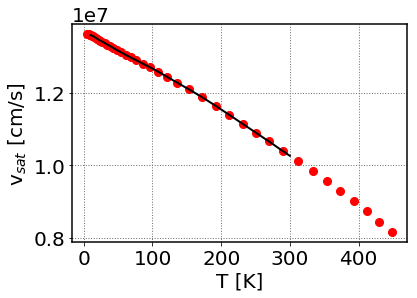

In [8]:
# plots to check fits
T = np.linspace(10,300,291) * u.degK

# plt.semilogy(si_to_vs_T_data[:,0],si_to_vs_T_data[:,1],'ro')
# plt.semilogy(T,f_si_to_vs_T(T),'k')
# ax = plt.gca()

# ax.set_ylabel('dn$_\mathrm{si}$/dT [1]')


# plt.loglog(sio2_k_vs_T_data[:,0],sio2_k_vs_T_data[:,1],'ro')
# plt.loglog(T,f_sio2_k_vs_T(T),'k')

# plt.loglog(sio2_cp_vs_T_data[:,0],sio2_cp_vs_T_data[:,1],'ro')
# plt.loglog(T,f_sio2_cp_vs_T(T),'k')

# plt.loglog(si_k_vs_T_data[:,0],si_k_vs_T_data[:,1],'ro')
# plt.loglog(T,f_si_k_vs_T(T),'k')

# plt.loglog(si_cp_vs_T_data[:,0],si_cp_vs_T_data[:,1],'ro')
# plt.loglog(T,f_si_cp_vs_T(T),'k')

# plt.loglog(si_mobility_vs_T_data[:,0],si_mobility_vs_T_data[:,1],'ro')
# plt.loglog(T,f_si_mobility_vs_T(T),'k')
# ax = plt.gca()
# ax.set_ylabel('mobility [cm$^2$/V/s]')

plt.plot(si_sat_vel_vs_T_data[:,0],si_sat_vel_vs_T_data[:,1],'ro')
plt.plot(T,f_si_sat_vel_vs_T(T),'k')
ax = plt.gca()
ax.set_ylabel('v$_{sat}$ [cm/s]')


ax.set_xlabel('T [K]')

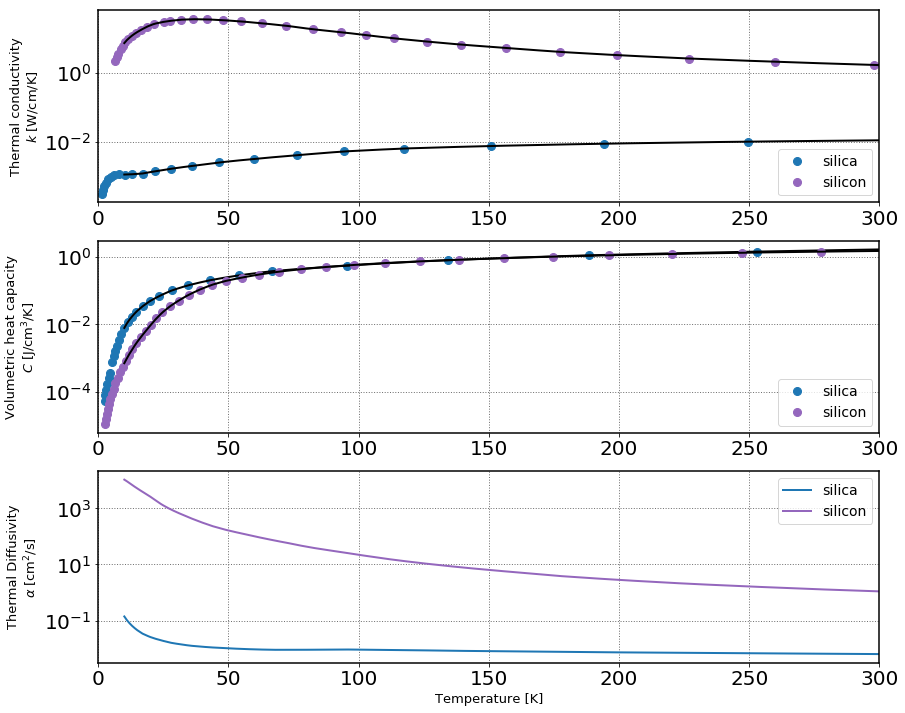

In [281]:
# plot T-dependence of thermal properties of silicon and silica
T = np.linspace(10,300,291) * u.degK
fig = plt.figure(figsize=(14,12))
ax0 = fig.add_subplot(311)
ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)
# rho_si = 2.33 * u.gram / u.cm**3 # silicon density
# rho_sio2 = 2.2 * u.gram / u.cm**3 # silica density
# f_sio2_C_vs_T = lambda T: (rho_sio2 * f_sio2_cp_vs_T(T)).to(u.joule/u.cm**3/u.degK)
# f_si_C_vs_T = lambda T: (rho_si * f_si_cp_vs_T(T)).to(u.joule/u.cm**3/u.degK)

ax0.semilogy(sio2_k_vs_T_data[:,0],sio2_k_vs_T_data[:,1],'o',color='C0',label='silica')
ax0.semilogy(T,f_sio2_k_vs_T(T),'k')

ax0.semilogy(si_k_vs_T_data[:,0],
           si_k_vs_T_data[:,1],
           'o',
           color='C4',
           label='silicon')
ax0.semilogy(T,f_si_k_vs_T(T),'k')


ax0.set_ylabel('Thermal conductivity\n' + '$k$ [W/cm/K]')



ax1.semilogy(sio2_cp_vs_T_data[:,0],
           (rho_sio2 * sio2_cp_vs_T_data[:,1]),
           'o',
           color='C0',
           label='silica')
ax1.semilogy(T,(rho_sio2 * f_sio2_cp_vs_T(T)).to(u.joule/u.cm**3/u.degK),'k')


ax1.semilogy(si_cp_vs_T_data[:,0],
           (rho_si * si_cp_vs_T_data[:,1]),
           'o',
           color='C4',
           label='silicon')
ax1.semilogy(T,(rho_si * f_si_cp_vs_T(T)).to(u.joule/u.cm**3/u.degK),'k')

ax1.set_ylabel('Volumetric heat capacity\n'+ '$C$ [J/cm$^3$/K]')


ax2.semilogy(T,f_sio2_alpha_vs_T(T),'-',color='C0',label='silica')
ax2.semilogy(T,f_si_alpha_vs_T(T),'-',color='C4',label='silicon')

ax2.set_ylabel('Thermal Diffusivity\n'+ r'$\alpha$ [cm$^2$/s]')
ax2.set_xlabel('Temperature [K]')

for ax in [ax0,ax1,ax2]:
    ax.set_xlim([0,300])
    ax.legend()

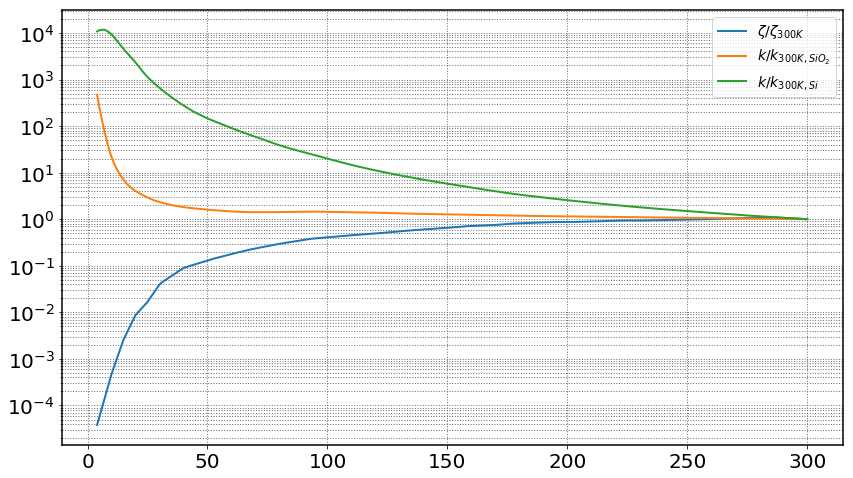

In [292]:
T = np.linspace(4,300,297) * u.degK
lm = 1550*u.nm
omega = (2*np.pi * u.speed_of_light / lm).to(1/u.second)
dn_dT = f_si_to_vs_T(T) # at 1550nm,
gamma = 3.1e-9 * u.cm / u.watt # = (2 \pi n_2 / \lambda) at 1550nm, from Ryan's older (arXiv version paper)
delta_T = (omega / u.speed_of_light * dn_dT).to(1/u.degK/u.cm)
n_g = 3.97 # from experiment, 600GHz FSR for 40um diameter ring
v_g = u.speed_of_light / n_g
#tau_ph = 80 * u.ps # from experiment on overcoupled cavity
tau_ph = 415 * u.ps # from experiment on undercoupled cavity
zeta = (delta_T / ( 2 * C_si * gamma * v_g )).to(u.dimensionless).m
zeta_rel = zeta / zeta[-1]
k_rel_sio2 = (f_sio2_alpha_vs_T(T) / f_sio2_alpha_vs_T(T.max())).to(u.dimensionless).m
k_rel_si = (f_si_alpha_vs_T(T) / f_si_alpha_vs_T(T.max())).to(u.dimensionless).m

w = 1*u.um
V_sat = (w * f_si_sat_vel_vs_T(T) / f_si_mobility_vs_T(T)).to(u.volt)
V_sat_rel = V_sat / V_sat.max()

fig = plt.figure(figsize=(14,8))
ax0 = fig.add_subplot(111)
#ax1 = fig.add_subplot(312)

# ax0.plot(T,zeta_rel,'$\zeta$'+ '/' + '$\zeta_{300K}$')
# ax0.plot(T,k_rel_sio2,'$k'+ '/' + 'k_{300K,SiO_2}$')
# ax0.plot(T,k_rel_si,'$k'+ '/' + 'k_{300K,Si}$')
ax0.semilogy(T,zeta_rel,label='$\zeta$'+ '/' + '$\zeta_{300K}$')
ax0.semilogy(T,k_rel_sio2,label='$k'+ '/' + 'k_{300K,SiO_2}$')
ax0.semilogy(T,k_rel_si,label='$k'+ '/' + 'k_{300K,Si}$')
ax0.legend()

#ax1.semilogy(T,V_sat)

**Thermal Cavity Model**

\begin{align}
\frac{d\bar{a}_c}{dt} &=& \left[ \left(-\frac{1}{2} + i\Delta  + i\frac{\gamma_{bs}}{2}\right) +\left(i - r\right)|\bar{a}_c|^2 + \left(-i - \mu^{-1}\right)\bar{n} + iT \right]\bar{a}_c + s \\
\frac{d\bar{a}_s}{dt} &=& \left[ \left(-\frac{1}{2} + i\Delta  - i\frac{\gamma_{bs}}{2}\right) +\left(i - r\right)|\bar{a}_s|^2 + \left(-i - \mu^{-1}\right)\bar{n} + iT \right]\bar{a}_s + s \\
\frac{dn}{dt} &=& -\frac{\bar{n}}{\tau_{fc}} +  \chi\left(|\bar{a}_c|^4 + |\bar{a}_s|^4\right) \\
\frac{dT}{dt} &=& -k T +  \zeta\left[ r \left(|\bar{a}_c|^4 + |\bar{a}_s|^4\right) + \frac{\bar{n}}{\mu} \left(|\bar{a}_c|^2 + |\bar{a}_s|^2\right)  \right] \\
\end{align}


more words and stuff

In [2]:
# newest model definition based on Ryan's new paper with CW/CCW mode splitting and thermal effects added
Delta = 2.0
s = 0.2 #2*np.sqrt(5)
tau = 0.2 # = tau_c / tau_ph in ryan's model
mu = 30.0
r = 0.2
chi = 10.0
zeta = 0.096
k = 0.01
### gamma_beta: sine/cosine ring mode doublet splitting, in units of linewidth
# experimental values:
gamma_beta = 2.0
#gamma_beta = 0.9 / 1.37 # = 0.66, fit splitting / Lorentzian FWHM in GHz
#gamma_beta = 1.12 / 0.38 # = 2.95, fit splitting / Lorentzian FWHM in GHz
print('gamma_beta: {:3.2f}'.format(gamma_beta))


def f_DrivenCavity(t,y):
    a_c, a_c_star, a_s, a_s_star, n, T = y
    d_a_c = ( ( -0.5 + 1j*Delta + 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + (1j - r) * (a_c * a_c_star) + 1j*T ) * a_c + s
    d_a_c_star = np.conjugate( ( -0.5 + 1j*Delta + 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + (1j - r) * (a_c * a_c_star) + 1j*T ) * a_c_star + s
    d_a_s = ( ( -0.5 + 1j*Delta - 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + (1j - r) * (a_s * a_s_star) + 1j*T ) * a_s + s
    d_a_s_star = np.conjugate( ( -0.5 + 1j*Delta - 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + (1j - r) * (a_s * a_s_star) + 1j*T ) * a_s_star + s
    d_n = -n / tau + chi * ( (a_c*a_c_star)**2 + (a_s*a_s_star)**2 )
    d_T = -k * T + zeta * ( r * ( (a_c*a_c_star)**2 + (a_s*a_s_star)**2 ) + n / mu * ( (a_c*a_c_star) + (a_s*a_s_star) ) )
    return [d_a_c, d_a_c_star, d_a_s, d_a_s_star , d_n, d_T]


def jac_DrivenCavity(t,y):
    a_c, a_c_star, a_s, a_s_star, n, T = y
    d_d_a_c = [ ( ( -0.5 + 1j*Delta + 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + 2 * (1j - r) * (a_c * a_c_star) + 1j*T ), (1j - r) * a_c**2, 0, 0, ( -1/mu - 1j )*a_c, 1j*T*a_c ]
    d_d_a_c_star = [ (-1j - r) * a_c_star**2, np.conjugate( ( -0.5 + 1j*Delta + 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + 2 * (1j - r) * (a_c * a_c_star) + 1j*T ), 0, 0, ( -1/mu + 1j )*a_c_star, -1j*T*a_c_star ]
    d_d_a_s = [ 0, 0, ( ( -0.5 + 1j*Delta - 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + 2 * (1j - r) * (a_s * a_s_star) + 1j*T ), (1j - r) * a_s**2, ( -1/mu - 1j )*a_s, 1j*T*a_s ]
    d_d_a_s_star = [ 0, 0, (-1j - r) * a_s_star**2, np.conjugate( ( -0.5 + 1j*Delta - 1j*gamma_beta/2.0) + ( -1/mu - 1j ) * n + 2 * (1j - r) * (a_s * a_s_star) + 1j*T ), ( -1/mu + 1j )*a_s_star, -1j*T*a_s_star ]
    d_d_n = [ 2 * chi * a_c_star**2 * a_c , 2 * chi * a_c**2 * a_c_star , 2 * chi * a_s_star**2 * a_s , 2 * chi * a_s**2 * a_s_star , -1/tau, 0 ]
    d_d_T = [ zeta*(2*r*a_c_star**2*a_c + n/mu*a_c_star) , zeta*(2*r*a_c_star*a_c**2 + n/mu*a_c) , zeta*(2*r*a_s_star**2*a_s + n/mu*a_s_star) , zeta*(2*r*a_s_star*a_s**2 + n/mu*a_s), zeta/mu * ( (a_c*a_c_star) + (a_s*a_s_star) ), -k ]
    return [d_d_a_c, d_d_a_c_star, d_d_a_s, d_d_a_s_star, d_d_n, d_d_T]



gamma_beta: 2.00


In [4]:
t_max = 2000 #50.0

a_c_0 = 0.0 + 0.0j
a_s_0 = 0.0 + 0.0j
a_c_star_0 = np.conjugate(a_c_0)
a_s_star_0 = np.conjugate(a_s_0)
n0 = 0.0
T0 = 0.0
y0 = [a_c_0,a_c_star_0,a_s_0,a_s_star_0,n0,T0]

# a_0 = 0.0 + 0.0j
# a_star_0 = np.conjugate(a_0)
# n0 = 0.0
# y0 = [a_0,a_star_0,n0]
t_span = (0.0, t_max)
from scipy.integrate import solve_ivp
#sol = solve_ivp(f_DrivenCavity, t_span, y0, method='BDF', jac=jac_DrivenCavity) # 1min 6s 
sol = solve_ivp(f_DrivenCavity, t_span, y0, method='BDF') # 1min10s to integrate t 0 to 6000 (sustained oscillations)
#sol = solve_ivp(f_DrivenCavity, t_span, y0, method='RK45')

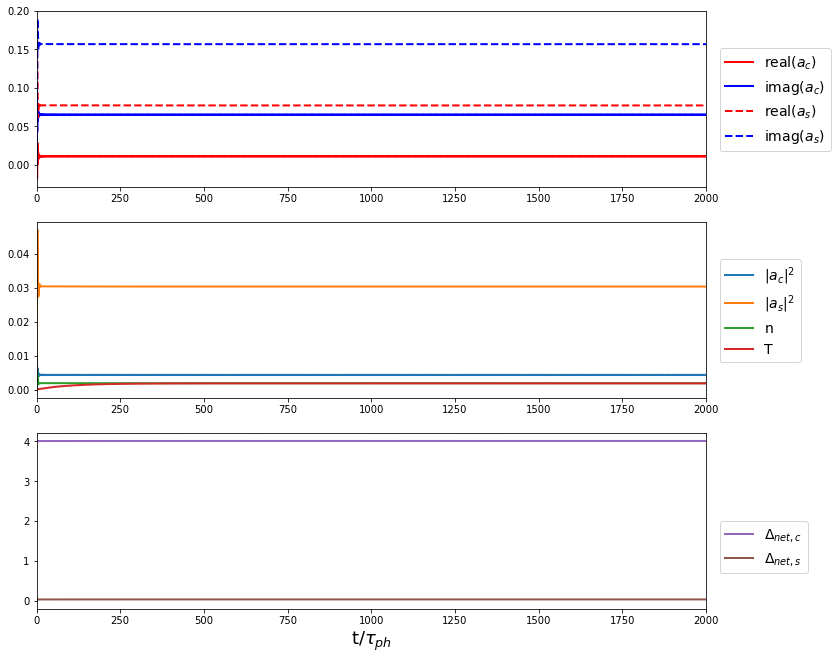

In [6]:
# plot results **low pump power(0.2)**
%matplotlib inline
t_plot_min = 0.0
t_plot_max = t_max

# t_plot_min = 500
# t_plot_max = 510

t = sol.t
a_c = sol.y[0, :]
a_s = sol.y[2, :]
n = sol.y[4, :]
T = sol.y[5, :]
U_c = np.abs(a_c)**2
U_s = np.abs(a_s)**2
Delta_net_c = Delta + gamma_beta + U_c - n + T
Delta_net_s = Delta - gamma_beta + U_s - n + T
fig = plt.figure(figsize=(12,11))
gs = GridSpec(3,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])


ax0.plot(t, np.real(a_c), '-',color='red',label='real($a_c$)')
ax0.plot(t, np.imag(a_c), '-',color='blue',label='imag($a_c$)')
ax0.plot(t, np.real(a_s), '--',color='red',label='real($a_s$)')
ax0.plot(t, np.imag(a_s), '--',color='blue',label='imag($a_s$)')

ax0.legend(loc=(1.02,0.2))
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([t_plot_min,t_plot_max])


ax1.plot(t, U_c,'-',color='C0',label='$|a_c|^2$')
ax1.plot(t, U_s,'-',color='C1',label='$|a_s|^2$')
ax1.plot(t, n,'-',color='C2',label='n')
ax1.plot(t,T,'-',color='C3',label='T')
ax1.legend(loc=(1.02,0.2))

ax2.plot(t,Delta_net_c,'-',color='C4',label='$\Delta_{net,c}$')
ax2.plot(t,Delta_net_s,'-',color='C5',label='$\Delta_{net,s}$')
ax2.set_xlabel(r't/$\tau_{ph}$')
ax2.legend(loc=(1.02,0.2))



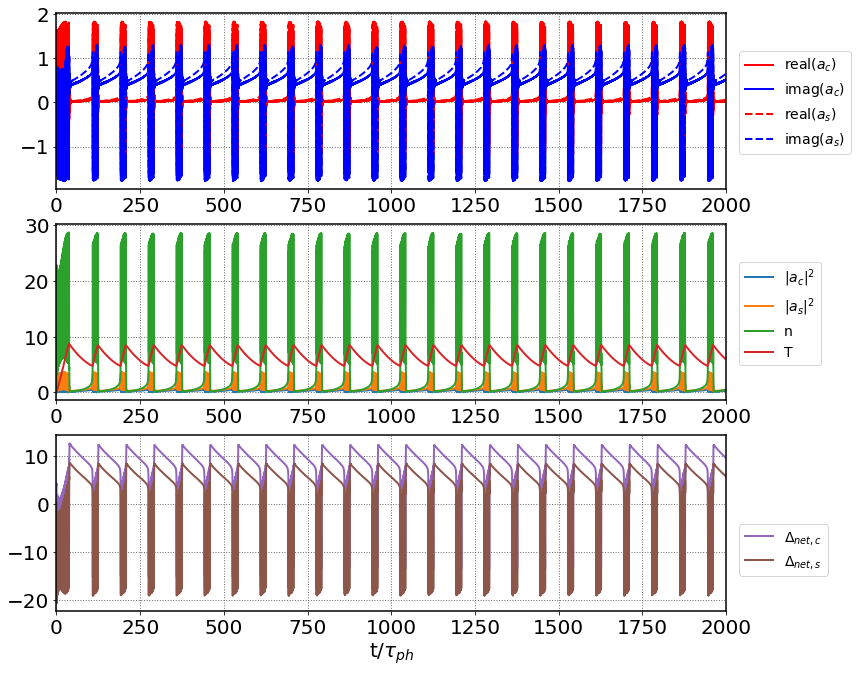

In [319]:
# plot results **older, same parameters but higher pump power(2sqrt(5))**

t_plot_min = 0.0
t_plot_max = t_max

# t_plot_min = 500
# t_plot_max = 510

t = sol.t
a_c = sol.y[0, :]
a_s = sol.y[2, :]
n = sol.y[4, :]
T = sol.y[5, :]
U_c = np.abs(a_c)**2
U_s = np.abs(a_s)**2
Delta_net_c = Delta + gamma_beta + U_c - n + T
Delta_net_s = Delta - gamma_beta + U_s - n + T
fig = plt.figure(figsize=(12,11))
gs = GridSpec(3,1)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])


ax0.plot(t, np.real(a_c), '-',color='red',label='real($a_c$)')
ax0.plot(t, np.imag(a_c), '-',color='blue',label='imag($a_c$)')
ax0.plot(t, np.real(a_s), '--',color='red',label='real($a_s$)')
ax0.plot(t, np.imag(a_s), '--',color='blue',label='imag($a_s$)')

ax0.legend(loc=(1.02,0.2))
for ax in [ax0,ax1,ax2]:
    ax.set_xlim([t_plot_min,t_plot_max])


ax1.plot(t, U_c,'-',color='C0',label='$|a_c|^2$')
ax1.plot(t, U_s,'-',color='C1',label='$|a_s|^2$')
ax1.plot(t, n,'-',color='C2',label='n')
ax1.plot(t,T,'-',color='C3',label='T')
ax1.legend(loc=(1.02,0.2))

ax2.plot(t,Delta_net_c,'-',color='C4',label='$\Delta_{net,c}$')
ax2.plot(t,Delta_net_s,'-',color='C5',label='$\Delta_{net,s}$')
ax2.set_xlabel(r't/$\tau_{ph}$')
ax2.legend(loc=(1.02,0.2))



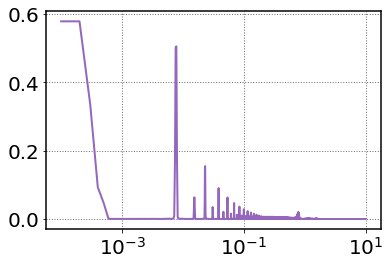

In [252]:

# from scipy.signal import blackman
# from scipy.fftpack import fft
# t_reg = np.linspace(0,t_max,2*len(t))
# U_c_reg = np.interp(t_reg,t,U_c)
# Nt_reg = len(t_reg)
# dt_reg = t_reg[1] - t_reg[0]
# U_c_reg_f = fft(U_c_reg)

# w = blackman(Nt_reg)
# U_c_reg_wf = fft(U_c_reg*w)
# f = np.linspace(0.0, 1.0/(2.0*dt_reg), Nt_reg/2)
# f = f[1:Nt_reg//2]
# U_f_amp = (2.0/Nt_reg * np.abs(U_c_reg_wf[1:Nt_reg//2]))
# plt.loglog(f[1:Nt_reg//2], 2.0/Nt_reg * np.abs(U_c_reg_f[1:Nt_reg//2]),'C0')
# plt.loglog(f[1:Nt_reg//2], 2.0/Nt_reg * np.abs(U_c_reg_wf[1:Nt_reg//2]),'C3')

#plt.semilogx(f[1:Nt_reg//2], 2.0/Nt_reg * np.abs(U_c_reg_f[1:Nt_reg//2]),'C0')
#plt.semilogx(f[1:Nt_reg//2], 2.0/Nt_reg * np.abs(U_c_reg_wf[1:Nt_reg//2])*f[1:Nt_reg//2],'C3')
#plt.semilogx(f,U_f_amp,'C3')

f_reg = np.linspace(0,10,100001)
U_f_reg = np.interp(f_reg,f,U_f_amp)
plt.semilogx(f_reg,U_f_reg,'-',color='C4')

In [ ]:
U_f_reg = np.interp

In [248]:
len(t)

54267

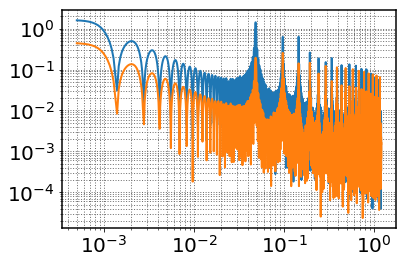

In [223]:
from scipy.signal import lombscargle
nf = 2e4
normval = t.shape[0]
f = np.linspace(5e-4, 1.2, nf)
p_c = sp.signal.lombscargle(t[t>450], U_c[t>450], f)
p_s = sp.signal.lombscargle(t[t>450], U_s[t>450], f)
p_c_norm = np.sqrt(4*(p_c/normval))
p_s_norm = np.sqrt(4*(p_s/normval))

plt.loglog(f,p_c_norm,'C0')
plt.loglog(f,p_s_norm,'C1')

In [669]:
# interesting parameter sets:

## Quasi-sustained oscillations...
# Delta = -3.0
# s = 0.6*np.sqrt(5.0)
# tau = 0.2 # = tau_c / tau_ph in ryan's model
# mu = 30.0
# r = 0.2
# chi = 10.0
# gamma_beta = 2 # sine/cosine ring mode doublet splitting, in units of linewidth
# zeta = 0.096
# k = 0.01

## sustained oscillations
# Delta = 2
# s = 1.5
# tau = 1 # = tau_c / tau_ph in ryan's model
# mu = 30.0
# r = 0.2
# chi = 10.0
# gamma_beta = 2 # sine/cosine ring mode doublet splitting, in units of linewidth
# zeta = 0.096
# k = 0.01


In [625]:
# define amplitude function to detect/measure free carrier oscillations in integrated solution 

def fco_amp(t,U,t_probe=30):
    U_probe = U[t>t_probe]
    return (U_probe.max() - U_probe.min())/U_probe.mean()
    
def f_DrivenCavity(t,y,s,Delta):
    a, a_star , n = y
    d_a = ( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ) * a + s
    d_a_star = np.conjugate( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ) * a_star + s
    d_n = -n / tau + chi * (a*a_star)**2
    return [d_a, d_a_star, d_n]

def jac_DrivenCavity(t,y,s,Delta):
    a , a_star , n = y
    d_d_a = [ ( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ), (1j - r) * a**2, ( -1/mu - 1j ) * a ]
    d_d_a_star = [ -1*np.conjugate((1j - r) * a**2), np.conjugate( ( -0.5 + 1j*Delta) + ( -1/mu - 1j ) * n + (1j - r) * (a * a_star) ) , np.conjugate(( -1/mu - 1j ) * a) ]
    d_d_n = [ 2 * chi * a_star**2 * a , 2 * chi * a**2 * a_star , -1/tau ]
    return [d_d_a, d_d_a_star, d_d_n]


def ode_int_sweep(n_s,n_Delta,s_sq_min=1e-5,s_sq_max=10,Delta_min=-3,Delta_max=3):
    #n_s = 8
    #n_Delta = 10
    s_sq = np.linspace(s_sq_min,s_sq_max,n_s)
    Delta = np.linspace(Delta_min,Delta_max,n_Delta)
    traces = []
    amp = np.empty([n_s,n_Delta])
    s = np.sqrt(s_sq)
    t_max = 50.0
    a_0 = 0.0 + 0.0j
    a_star_0 = np.conjugate(a_0)
    n0 = 0.0
    y0 = [a_0,a_star_0,n0]
    t_span = (0.0, t_max)
    for sind,ss in enumerate(s):
        for Dind,DD in enumerate(Delta):
            sol = solve_ivp(fun=lambda t, y: f_DrivenCavity(t, y, ss, DD),
                            t_span=t_span,
                            y0=y0,
                            method='BDF',
                            jac=lambda t, y: jac_DrivenCavity(t, y, ss, DD),
                           )
            t = sol.t
            a = sol.y[0, :]
            n = sol.y[2, :]
            trace = np.stack((t,a,n))
            traces.append(trace)
            U = np.abs(a)**2
            amp[sind,Dind] = fco_amp(t,U)
    return s_sq, Delta, traces, amp

def collect_ode_int_sweep(n_s,n_Delta,s_sq_min=1e-5,s_sq_max=10,Delta_min=-3,
                          Delta_max=3,name='',data_dir='/Users/doddgray/Google Drive/data/',return_data=True):
    timestamp_str = datetime.strftime(datetime.now(),'%Y_%m_%d_%H_%M_%S')
    fname = 'ode_int_sweep_' + name + '_' + timestamp_str
    fpath = path.join(data_dir,fname)
    s_sq,Delta,traces,amp = ode_int_sweep(n_s,n_Delta,s_sq_min=s_sq_min,s_sq_max=s_sq_max,
                                Delta_min=Delta_min,Delta_max=Delta_max)
    data = {'s_sq':s_sq,'Delta':Delta,'traces':traces,'amp':amp}
    print('saving to '+fpath)
    with open(fpath, 'wb') as f:
        pickle.dump(data, f,fix_imports=True,protocol=pickle.HIGHEST_PROTOCOL)
    if return_data:
        return data
    

def load_ode_int_sweep(name='',data_dir='/Users/doddgray/Google Drive/data/',verbose=False):
    file_list =  glob(path.normpath(data_dir)+path.normpath('/ode_int_sweep_' + name + '_*'))
    latest_file = max(file_list,key=path.getctime)
    if verbose:
        print('Loading ' + name +' trace from file: ' + path.basename(path.normpath(latest_file)))
    with open(latest_file, 'rb') as handle:
        data = pickle.load(handle)
    return data


In [433]:
# prototype ode integration sweep
n_s = 8
n_Delta = 10
s_sq = np.linspace(0,10,n_s)
Delta = np.linspace(-3,3,n_Delta)
amp = np.empty([n_s,n_Delta])
s = np.sqrt(s_sq)

t_max = 50.0
a_0 = 0.0 + 0.0j
a_star_0 = np.conjugate(a_0)
n0 = 0.0
y0 = [a_0,a_star_0,n0]
t_span = (0.0, t_max)

for sind,ss in enumerate(s):
    for Dind,DD in enumerate(Delta):
        sol = solve_ivp(fun=lambda t, y: f_DrivenCavity(t, y, ss, DD),
                        t_span=t_span,
                        y0=y0,
                        method='BDF',
                        jac=lambda t, y: jac_DrivenCavity(t, y, ss, DD),
                       )
        t = sol.t
        U = np.abs(sol.y[0, :])**2
        amp[sind,Dind] = fco_amp(t,U)

In [497]:
# use sweep function based on prototype including save and load 
# n_s = 31
# n_Delta = 30
# data = collect_ode_int_sweep(n_s,n_Delta,name='Delta_s_sweep_tau0.2_mu30_r0.2_chi10_nonthermal')

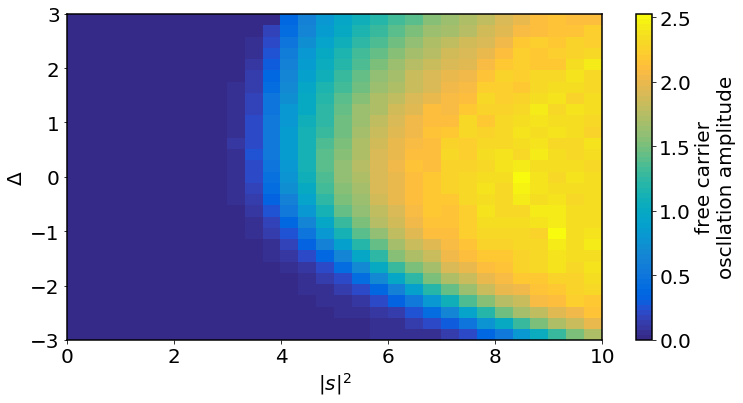

In [510]:
# plot s, Delta sweep results
loaded_data = load_ode_int_sweep(name='Delta_s_sweep_tau0.2_mu30_r0.2_chi10_nonthermal')
fig = plt.figure(figsize=(12,6))
gs = GridSpec(1,1)
ax0 = fig.add_subplot(gs[0])
p0 = ax0.pcolormesh(loaded_data['s_sq'],loaded_data['Delta'],loaded_data['amp'].T)
ax0.set_xlabel('$|s|^2$')
ax0.set_ylabel('$\Delta$')
plt.colorbar(p0,label='free carrier\noscllation amplitude')

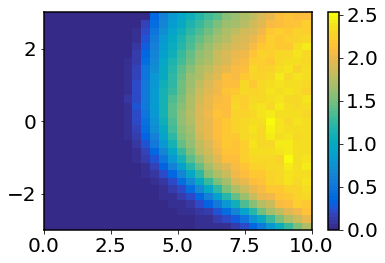

# Prototype data analysis on one dataset

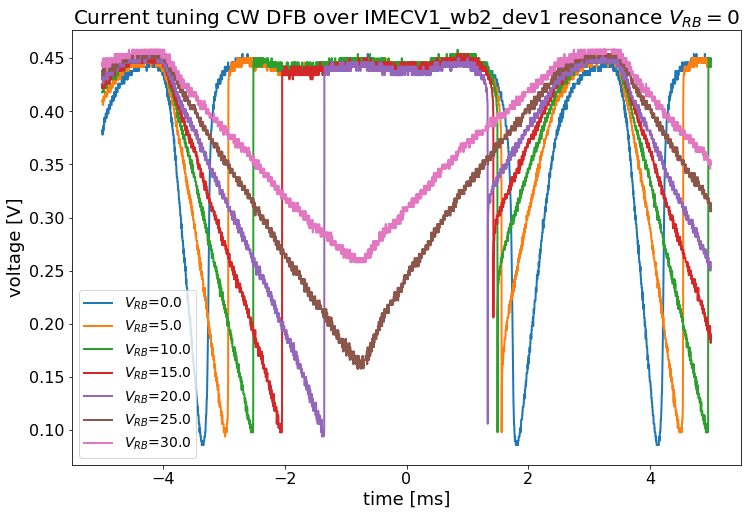

In [8]:
# load and plot data collected with Vrb_sweep (no fast scope traces)

# def Vrb_sweep(Vrb_list,set_name,set_dir='C:/Users/Lab/agilent_scope_data'):
#     for Vind, VV in enumerate(Vrb_list):
#         if (VV.to(u.volt).m < 40.0):
#             xhr_write(VV)
#         else:
#             raise Exception('attempted to write voltage above 40V to XHR')
#         sleep(1)
#         scope.stop_acquire()
#         # collect Tek scope traces
#         collect_scope_trace(channel=1,name='Vrb{:2.1f}_tek_ch1_P_trans_slow'.format(VV.m),data_dir=set_dir,return_data=False)
#         collect_scope_trace(channel=2,name='Vrb{:2.1f}_tek_ch2_P_ref'.format(VV.m),data_dir=set_dir,return_data=False)
#         collect_scope_trace(channel=3,name='Vrb{:2.1f}_tek_ch3_Vmod'.format(VV.m),data_dir=set_dir,return_data=False)
#         collect_scope_trace(channel=4,name='Vrb{:2.1f}_tek_ch4_I_TPA'.format(VV.m),data_dir=set_dir,return_data=False)
#         scope.run_acquire()

set_name ='Pf_10mW'
data_dir ='C:/Users/Lab/agilent_scope_data/'
Vmin = 0 * u.volt
Vmax = 30 * u.volt
nV = 7
#delay_list = [-1.25*u.ms,1.05*u.ms,1.35*u.ms,1.95*u.ms,2.8*u.ms]
Vrb_list = np.linspace(Vmin.to(u.volt).m,Vmax.to(u.volt).m,nV) * u.volt
set_dir = os.path.join(data_dir,set_name)


data_skip = 30
# ipd_T_ratio = (V_T_0[::10]-np.mean(V_T_bg)).max()/V_ipd_0[::10].max()

# ipd_T_ratio_2 = (V_T_2[::10]-np.mean(V_T_bg_2)).max()/V_ipd_2[::10].max()

#ref_scale=8
#laser_scale = 1
#plt.rcParams['axes.titlepad'] = 60 
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#ax.plot(t_T_0[::10].to(u.us),V_T_0[::10]-np.mean(V_T_bg),'C0',label='Dev1 wg transmission')
#ax.plot(t_ipd_0[::10].to(u.us),V_ipd_0[::10]*ipd_T_ratio,'C3',label='laser power')

#ax.plot(t_T_2[::10].to(u.us),V_T_2[::10]-np.mean(V_T_bg_2),'C0',label='Dev1 wg transmission')
#ax.plot(t_ipd_2[::10].to(u.us),V_ipd_2[::10]*ipd_T_ratio_2,'C3',label='laser power')
#ax.plot(t_mod_0[::10],V_mod_0[::10],'C4',label='modulation signal')

#ax.set_xlim([1544,1550])
#ax.set_ylim([-0.001,0.02])
ax.grid()
ax.legend()
ax.set_xlabel('time [us]')
ax.set_ylabel('voltage [V]')

ax.set_title('Current tuning CW DFB over IMECV1_wb2_dev1 resonance $V_{RB}=0$')

for Vind, VV in enumerate(Vrb_list):
    name_Pref='Vrb{:2.1f}_tek_ch2_P_ref'.format(VV.m)
    name_Pt='Vrb{:2.1f}_tek_ch1_P_trans_slow'.format(VV.m)
    t_Pt, V_Pt = load_scope_trace(data_dir=set_dir,name=name_Pt)
    ax.plot(t_Pt[::data_skip].to(u.ms),V_Pt[::data_skip],label='$V_{RB}$='+'{:2.1f}'.format(VV.m))
    
ax.grid()
ax.legend()
ax.set_xlabel('time [ms]')
ax.set_ylabel('voltage [V]')


In [2]:
from scipy.optimize import fsolve
import math

def equations(p):
    x, y = p
    return (x+y**2-4, math.exp(x) + x*y - 3)

x, y =  fsolve(equations, (1, 1))

print(equations((x, y)))

(4.4508396968012676e-11, -1.0512035686360832e-11)


In [20]:
P = 1 * u.mW
tau = 80 * u.ps
alpha_lin = 0.1 / u.cm
alpha_scatter = 0.25 / u.cm
ng = 3.9
gamma_lin = (u.speed_of_light / ng * alpha_lin).to(u.GHz)
gamma_scatter = (u.speed_of_light / ng * alpha_scatter).to(u.GHz)
theta = 1.0 / 300.0
lm = 1550 * u.nm
nu = (u.speed_of_light/lm)
E_ph = lm.to(u.joule,'sp')
A = 0.1 * u.um**2
d = 40 * u.um
circumfrence = np.pi * d
gamma_couple = (theta * u.speed_of_light / ng / circumfrence).to(u.GHz)
V = A * circumfrence
V_TPA = 0.95 * V # guess
V_FCA = 0.98 * V # guess
Gamma_fca = 1
Gamma_tpa = 1
Gamma_th = 1
Gamma_fcd = Gamma_fca
Gamma_kerr = Gamma_tpa
I = 1 # assume the coupler is low-loss 
# Si parameters from Barclay, Srinivasan, Painter paper
n = 3.45
sigma = 14.5e-22 * u.m**2
sigma_prime = sigma * (u.speed_of_light/ng)
xi_e = 8.8e-28 * u.m**3
xi_h = 4.6e-28 * u.m**3
xi = (xi_e + xi_h) / 2.0 # keep it simple for now
n2 = 4.4e-18 * u.m**2 / u.watt
beta = 8.4e-12 * u.m / u.watt
beta_prime = (u.speed_of_light / ng)**2 *  beta
n2_prime = (u.speed_of_light/ng) * n2
dn_dT = 1.86e-4 / u.degK

def gamma_tpa_bar(U):
    return ( Gamma_tpa * beta_prime  * U / V_FCA  ).to(u.Hz)

def gamma_fca_bar(U):
    return ( Gamma_fca * ( tau * sigma_prime * beta_prime / ( 2 * E_ph ) * (U / V_FCA)**2 ) ).to(u.Hz)

def P_abs(U):
    return (( gamma_lin + gamma_TPA_bar(U) + gamma_fca_bar(U) ) * U).to(u.watt)

def delta_n_bar_th(U):
    return ((Gamma_th / n) * ( dn_dT * dT_dPabs * P_abs(U) )).to(u.dimensionless).m

def delta_n_bar_kerr(U):
    return ((Gamma_kerr / n) * n2_prime  * U / V_kerr  ).to(u.dimensionless).m

def delta_n_bar_fcd(U):
    return ((Gamma_fcd / n) * ( tau * xi * beta_prime / ( 2 * E_ph ) * (U / V_FCA)**2 ) ).to(u.dimensionless).m

def gamma_i(U,tau,gamma_lin,gamma_scatter):
    return gamma_tpa_bar(U) + gamma_fca_bar(U,tau) + gamma_lin + gamma_scatter

def K(U,tau,gamma_lin,gamma_scatter,gamma_couple):
    return gamma_couple / gamma_i(U,tau,gamma_lin,gamma_scatter)

# # Eq 6 from Barclay paper, to be solved iteratively
def eq(U,P):
    #U = U_pJ * u.pJ
    KK = K(U,tau,gamma_lin,gamma_scatter,gamma_couple)
    gg = gamma_i(U,tau,gamma_lin,gamma_scatter)
    U_res_pJ = (U - ( 4 * KK / ( 1 + KK )**2 ) / gg  * P).to(u.pJ).m
    return U_res_pJ

def delta_n_bar(U):
    return delta_n_bar_kerr(U) + delta_n_bar_fcd(U) + delta_n_bar_th(U)

def solve_U(P):
    def eq_P(p):
        return eq(p*u.pJ,P)
    U_sol_pJ =  fsolve(eq_P, (1))
    return U_sol_pJ * u.pJ

P = np.linspace(0,10,1000) * u.mW
U_sol = np.zeros(len(P)) * u.pJ

for Pind, PP in enumerate(P):
    U_sol[Pind] = solve_U(PP)
    print('soln {}'.format(Pind))

soln 0
soln 1
soln 2
soln 3
soln 4
soln 5
soln 6
soln 7
soln 8
soln 9
soln 10
soln 11
soln 12
soln 13
soln 14
soln 15
soln 16
soln 17
soln 18
soln 19
soln 20
soln 21
soln 22
soln 23
soln 24
soln 25
soln 26
soln 27
soln 28
soln 29
soln 30
soln 31
soln 32
soln 33
soln 34
soln 35
soln 36
soln 37
soln 38
soln 39
soln 40
soln 41
soln 42
soln 43
soln 44
soln 45
soln 46
soln 47
soln 48
soln 49
soln 50
soln 51
soln 52
soln 53
soln 54
soln 55
soln 56
soln 57
soln 58
soln 59
soln 60
soln 61
soln 62
soln 63
soln 64
soln 65
soln 66
soln 67
soln 68
soln 69
soln 70
soln 71
soln 72
soln 73
soln 74
soln 75
soln 76
soln 77
soln 78
soln 79
soln 80
soln 81
soln 82
soln 83
soln 84
soln 85
soln 86
soln 87
soln 88
soln 89
soln 90
soln 91
soln 92
soln 93
soln 94
soln 95
soln 96
soln 97
soln 98
soln 99
soln 100
soln 101
soln 102
soln 103
soln 104
soln 105
soln 106
soln 107
soln 108
soln 109
soln 110
soln 111
soln 112
soln 113
soln 114
soln 115
soln 116
soln 117
soln 118
soln 119
soln 120
soln 121
soln 122
sol

soln 924
soln 925
soln 926
soln 927
soln 928
soln 929
soln 930
soln 931
soln 932
soln 933
soln 934
soln 935
soln 936
soln 937
soln 938
soln 939
soln 940
soln 941
soln 942
soln 943
soln 944
soln 945
soln 946
soln 947
soln 948
soln 949
soln 950
soln 951
soln 952
soln 953
soln 954
soln 955
soln 956
soln 957
soln 958
soln 959
soln 960
soln 961
soln 962
soln 963
soln 964
soln 965
soln 966
soln 967
soln 968
soln 969
soln 970
soln 971
soln 972
soln 973
soln 974
soln 975
soln 976
soln 977
soln 978
soln 979
soln 980
soln 981
soln 982
soln 983
soln 984
soln 985
soln 986
soln 987
soln 988
soln 989
soln 990
soln 991
soln 992
soln 993
soln 994
soln 995
soln 996
soln 997
soln 998
soln 999


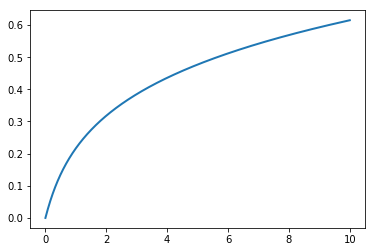

In [24]:
# plot result
%matplotlib inline
plt.plot(P,U_sol)

# Thermal relaxation time modeling

In [234]:
# import data from Lumerical
data_dir = '/Users/doddgray/Box Sync/lumerical/thermal relaxation/1550nm microrings IMEC V1'
fig_dir = data_dir
#fname = 'thermal_relaxation_transient_analysis.mat'
fname = 'thermal_relaxation_symmetric_transient_analysis.mat'
fpath = path.join(data_dir,fname)
f = h5py.File(fpath,'r')

### import:
# x_mode
# y_mode
# t
# Q_i
# Q_max_t
# delta_T_i
# delta_neff_th
# ng
# dn_th

x = (f['x_mode'].value.view(np.float).squeeze() * u.m).to(u.um)
y = (f['y_mode'].value.view(np.float).squeeze() * u.m).to(u.um)
t = (f['t'].value.view(np.float).squeeze() * u.second).to(u.us)
Q_max_t = (f['Q_max_t'].value.view(np.float).squeeze() * u.watt / u.m**3 ).to(u.watt / u.cm**3)
Q_i = (f['Q_i'].value.view(np.float).squeeze() * u.watt / u.m**3 ).to(u.watt / u.cm**3)
delta_T_i = f['delta_T_i'].value.view(np.float).squeeze() * u.degK 
delta_neff_th = f['delta_neff_th'].value.view(np.float).squeeze() 
dn_th = f['dn_th'].value.view(np.float).squeeze() 
n_g_lumerical = f['ng']


delta_T_max_t = np.max(np.max(delta_T_i,axis=1),axis=1)

In [235]:
def find_tind(tt):
    tind = np.argmin(np.abs(t-tt))
    return tind

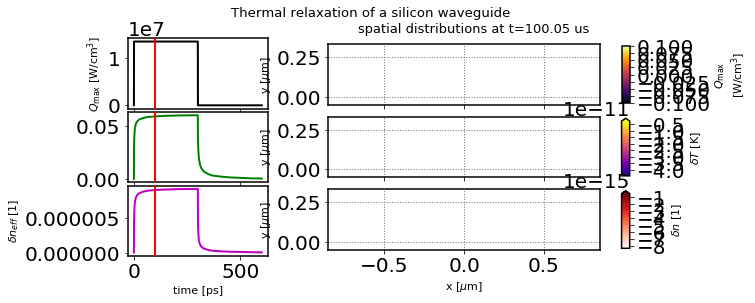

In [29]:
# interactive plots of Ip(t), alpha(t), g(x,y,t), n(x,y,t) and p(x,y,t) 

## Widgets
from matplotlib.widgets import Slider, Button, RadioButtons
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


tt0 = 200 * u.picosecond
tind0 = find_tind(tt0)
vline_color = 'r'
vline_alpha = 1
Q_cmap = cm.inferno
delta_T_cmap = cm.plasma
dn_th_cmap = cm.Reds
vmax_n = 2e15
vmax_p = 3e15
vmax_g = 5e27
xmin = -0.85 # [um]
xmax = 0.85 # [um]
ymin = -0.05 # [um]
ymax = 0.33 # [um]


plt.rcParams['axes.labelsize'] = 11
plt.rcParams['font.size'] = 11


fig = plt.figure(figsize=(9,4))
gs = GridSpec(1,3,width_ratios=[0.7,0.3,1.5],wspace=0)
                
gs0 = GridSpecFromSubplotSpec(3,1,subplot_spec=gs[0],height_ratios=[1,1,1],hspace=0.05)
gs1 = GridSpecFromSubplotSpec(9,3,subplot_spec=gs[2],width_ratios=[1,0.08,0.03],height_ratios=[0.13,1,0.13,0.13,1,0.13,0.13,1,0.13],hspace=0,wspace=0)
    
ax00 = fig.add_subplot(gs0[0])
ax00.plot(t.to(u.us),Q_max_t,'k',zorder=2)
ax00.set_ylim([-0.05*np.max(Q_max_t.magnitude),1.05*np.max(Q_max_t.magnitude)])
vline00, = ax00.plot([tt0.magnitude,tt0.magnitude],[-1e10,1e10],color=vline_color,alpha=vline_alpha,zorder=3)
ax00.set_ylabel(r'$Q_\mathrm{max}$ [W/cm$^3$]')


ax10 = fig.add_subplot(gs0[1])
ax10.plot(t.to(u.us),delta_T_max_t,'g',zorder=2)
ax10.set_ylim([-0.05*np.max(delta_T_max_t.magnitude),1.05*np.max(delta_T_max_t.magnitude)])
vline10, = ax10.plot([tt0.magnitude,tt0.magnitude],[-1e10,1e10],color=vline_color,alpha=vline_alpha,zorder=3)
#ax10.set_ylabel(r'$\delta\T_\mathrm{max}$ [K]')



ax20 = fig.add_subplot(gs0[2])
ax20.plot(t.to(u.us),delta_neff_th,'m',zorder=2)
ax20.set_ylim([-0.05*np.max(delta_neff_th),1.05*np.max(delta_neff_th)])
vline20, = ax20.plot([tt0.magnitude,tt0.magnitude],[-1e10,1e10],color=vline_color,alpha=vline_alpha,zorder=3)
ax20.set_ylabel(r'$\delta n_{eff}$ [1]')
ax20.set_xlabel(r'time [ps]')

ax02 = fig.add_subplot(gs1[0:3,0])
p02 = ax02.pcolormesh(x,
                      y,
                      Q_i[tind0,:,:],
                      cmap=Q_cmap)

ax12 = fig.add_subplot(gs1[3:6,0])
p12 = ax12.pcolormesh(x,
                      y,
                      delta_T_i[tind0,:,:],
                      cmap = delta_T_cmap,
                      )


ax22 = fig.add_subplot(gs1[6:,0])
p22 = ax22.pcolormesh(x,
                      y,
                      dn_th[tind0,:,:],
                      cmap = dn_th_cmap,
                      )

for a in [ax02,ax12,ax22]:
    a.set_xlim([xmin,xmax])
    a.set_ylim([ymin,ymax])
    a.set_aspect('equal')
    a.grid()
    a.set_ylabel('y [$\mu$m]')

for a in [ax02,ax12]:
    a.set_xticklabels([])
    
ax22.set_xlabel('x [$\mu$m]')

p_axes = [ax02,ax12,ax22]
p_data = [Q_i,delta_T_i,dn_th]
p_cmaps = [Q_cmap,delta_T_cmap,dn_th_cmap]
p_vmax = [vmax_g,vmax_n,vmax_p]


for a in [ax00,ax10]:
    a.set_xticklabels([])

for a in [ax00,ax10,ax20]:
    a.grid()

    
cax02 = fig.add_subplot(gs1[1,2])
cbar02 = plt.colorbar(p02,cax=cax02)
cbar02.set_label(r'$Q_\mathrm{max}$' + '\n' + r'[W/cm$^{3}$]')    

cax12 = fig.add_subplot(gs1[4,2])
cbar12 = plt.colorbar(p12,cax=cax12,extend='max')
cbar12.set_label(r'$\delta T$ [K]')    
#cbar12.set_ticks(np.array([0,0.5,1])*vmax_n)

cax22 = fig.add_subplot(gs1[7,2])
cbar22 = plt.colorbar(p22,cax=cax22,extend='max')
cbar22.set_label(r'$\delta n$ [1]') 
#cbar22.set_ticks(np.array([0,0.5,1])*vmax_p)

t_label = fig.text(0.48,0.9,'spatial distributions at t={:3.3g} us'.format(tt0.magnitude),fontsize=13)

fig.suptitle('Thermal relaxation of a silicon waveguide',y=0.99)

def update(tt):
    tind = find_tind(tt*u.picosecond)
    for vl in [vline00,vline10,vline20]:
        vl.set_xdata([tt,tt])
    for (a,data,ccmm) in zip(p_axes,p_data,p_cmaps):
        a.pcolormesh(x,
                     y,
                     data[tind,:,:],
                     cmap=ccmm,
                     )
        a.set_xlim([xmin,xmax])
        a.set_ylim([ymin,ymax])
        a.set_aspect('equal')
        t_label.set_text('spatial distributions at t={:5.5g} us'.format(tt))
        a.grid()

    fig.canvas.draw_idle()

#tt_slider.on_changed(update)

interact(update, tt=widgets.FloatSlider(min=0,max=600,step=0.01,value=100.05));


In [236]:
# fitting 
from scipy.optimize import curve_fit
t0 = 0.0 * u.us
t1 = 0.1 * u.us
t2 = 0.3 * u.us
t3 = 299 * u.us
t4 = 300 * u.us

tind0 = find_tind(t0)
tind1 = find_tind(t1)
tind2 = find_tind(t2)
tind3 = find_tind(t3)
tind4 = find_tind(t4)

delta_neff_max = np.mean(delta_neff_th[tind2:tind3])

delta_neff_th_turn_on = delta_neff_th[tind1:tind2] / delta_neff_max
delta_neff_th_turn_off = delta_neff_th[tind4:] / delta_neff_max

t_turn_on = t[tind1:tind2].to(u.us).magnitude
t_turn_off = t[tind4:].to(u.us).magnitude

# def f_dneff_turn_on(x, tau0):
#     return (1 - np.exp( -1 * ( x - t1.to(u.us).magnitude ) / tau0 ) )

# def f_dneff_turn_off(x, tau1):
#     return np.exp( -1 * ( x - t4.to(u.us).magnitude ) / tau1 ) 

def f_dneff_turn_on(x, tau0):
    return tau0 * np.sqrt(x - t1.to(u.us).m)

def f_dneff_turn_off(x, tau1):
    return np.exp( -1 * ( x - t4.to(u.us).magnitude ) / tau1 ) 

popt_turn_on, pcov_turn_on = curve_fit(f_dneff_turn_on, t_turn_on, delta_neff_th_turn_on)
popt_turn_off, pcov_turn_off = curve_fit(f_dneff_turn_off, t_turn_off, delta_neff_th_turn_off)

tau0_fit = popt_turn_on[0] * u.us
tau0_err = pcov_turn_on[0,0] * u.us
tau1_fit = popt_turn_off[0] * u.us
tau1_err = pcov_turn_off[0,0] * u.us


print('Fit Values:')
print('tau0: {:3.3g} +- {:3.3g} us'.format(tau0_fit.magnitude,tau0_err.magnitude))
print('tau1: {:3.3g} +- {:3.3g} us'.format(tau1_fit.magnitude,tau1_err.magnitude))

t_turn_on_fit = np.linspace(t1.magnitude,t2.magnitude,300) 
t_turn_off_fit = np.linspace(t4.magnitude,600,300) 

delta_neff_th_turn_on_fit = f_dneff_turn_on(t_turn_on_fit, tau0_fit.magnitude)
delta_neff_th_turn_off_fit = f_dneff_turn_off(t_turn_off_fit, tau1_fit.magnitude)


Fit Values:
tau0:   1 +- inf us
tau1: 88.6 +- 46.9 us


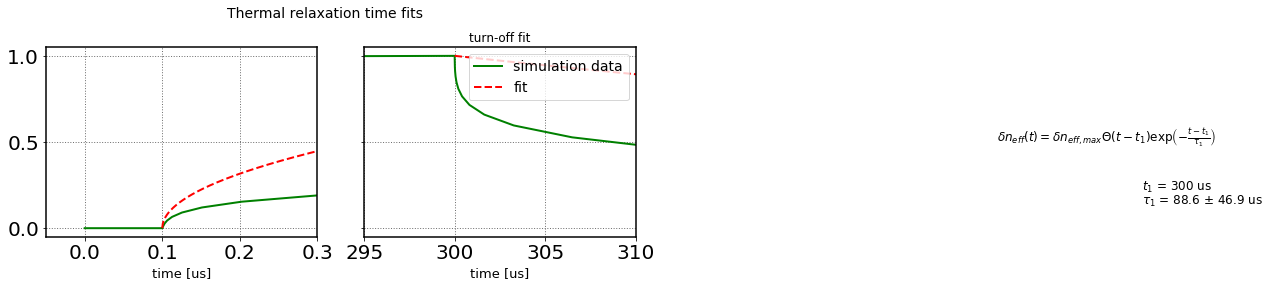

In [238]:
# plots to show thermal relaxation time constant fits
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.facecolor']= 'w'
plt.rcParams['savefig.facecolor']= 'w'
plt.rcParams['figure.facecolor']= 'w'

turn_on_fit_fn_tex = r"$\delta n_{eff}(t) =$" + "\n" + r"$\delta n_{eff,max} \Theta(t-t_0) \left[ 1 - \exp\left(-\frac{t-t_0}{\tau_0} \right) \right]$"
turn_off_fit_fn_tex = r"$\delta n_{eff}(t) = \delta n_{eff,max} \Theta(t-t_1)  \exp\left(-\frac{t-t_1}{\tau_1} \right) $"

x_text0 = 60
y_text0 = 0.5
x_text1 = 330
y_text1 = 0.5
delta_y_text = 0.08
delta_x_text = 8
text_fs = 12
subtitle_fs = 12
fig  = plt.figure(figsize=(9.5,4),facecolor='w')
gs = GridSpec(2,2,height_ratios=[0.02,1],hspace=0,wspace=0.05)

ax0 = fig.add_subplot(gs[1,0])
ax1 = fig.add_subplot(gs[1,1])

for a in [ax0,ax1]:
    a.plot(t.to(u.us),delta_neff_th/delta_neff_th.max(),'g',label='simulation data')
    #a.grid()
    a.set_xlabel('time [us]')
    #a.set_ylim([0,1.1])

ax0.plot(t_turn_on_fit,delta_neff_th_turn_on_fit,'r--',label='turn-on fit')
#ax0.set_xlim([-10,300])
ax0.set_xlim([-0.05,0.3])
# ax0.set_ylabel('$normalized \delta n_{eff}$ [1]')
# ax0.set_title('turn-on fit',fontsize=subtitle_fs)
# ax0.text(x_text0,y_text0,turn_on_fit_fn_tex,fontsize=text_fs)
# ax0.text(x_text0+delta_x_text,y_text0-3.5*delta_y_text,r'$t_0$ = {:3.3g} us'.format(t1.magnitude),fontsize=text_fs)
# ax0.text(x_text0+delta_x_text,y_text0-4.5*delta_y_text,r'$\tau_0$ = {:3.3g} $\pm$ {:3.3g} us'.format(tau0_fit.magnitude,tau0_err.magnitude),fontsize=text_fs)

ax1.plot(t_turn_off_fit,delta_neff_th_turn_off_fit,'r--',label='fit')
ax1.set_xlim([295,310])
ax1.set_yticklabels([])
ax1.set_title('turn-off fit',fontsize=subtitle_fs)
ax1.legend(loc='upper right')
ax1.text(x_text1,y_text1,turn_off_fit_fn_tex,fontsize=text_fs)
ax1.text(x_text1+delta_x_text,y_text1-3.5*delta_y_text,r'$t_1$ = {:3.3g} us'.format(t4.magnitude),fontsize=text_fs)
ax1.text(x_text1+delta_x_text,y_text1-4.5*delta_y_text,r'$\tau_1$ = {:3.3g} $\pm$ {:3.3g} us'.format(tau1_fit.magnitude,tau1_err.magnitude),fontsize=text_fs)

fig.suptitle('Thermal relaxation time fits',fontsize=14,y=0.99)

gs.tight_layout(fig)


#fig_dir = '/Users/doddgray/Box Sync/lumerical/carrier_sweep_out/self_consistent_velocity_saturation'
fig_dir = '/Users/doddgray/Google Drive/figs'
fname = 'tpa_fca_fits_by_hand_vel_sat.png'
save_fig = False
if save_fig:
    plt.savefig(path.join(fig_dir,fname),
                dpi=400, 
                facecolor='w',
                edgecolor='w',
                orientation='portrait', 
                transparent=False, 
                bbox_inches='tight', 
                pad_inches=0.1,
                frameon=None)

ValueError: x and y must have same first dimension, but have shapes (1000, 1) and (162,)

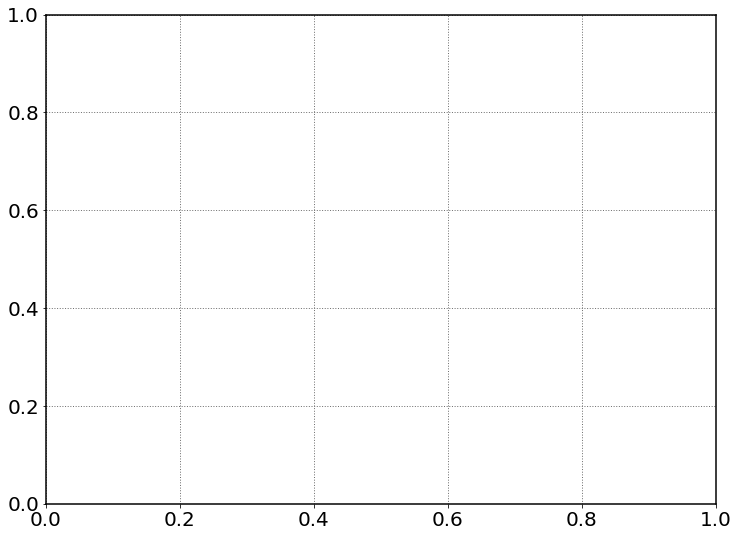

In [130]:
dneff = delta_neff_th/delta_neff_th.max()
ln_dneff = np.log(dneff)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.plot((t).to(u.us),(delta_neff_th/delta_neff_th.max()),'g.-')
#ax.loglog((t-t4).to(u.us),dneff,'g.-')
#ax.set_ylim([3e-1,1.5])
ax.set_xlim([0,2])



C_si: 1.63 J K^-1 cm^-3
alpha_si: 0.797 cm^2 / s
C_glass: 1.54 J K^-1 cm^-3
alpha_glass: 0.00896 cm^2 / s


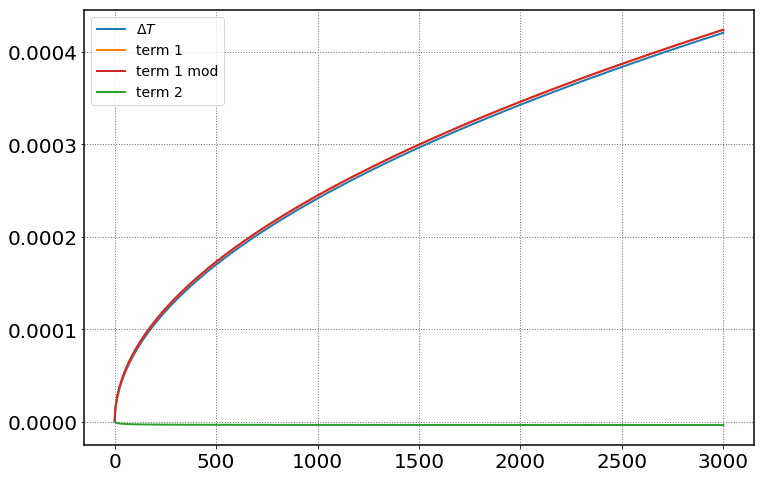

In [139]:
rho_si = 2.33 * u.gram / u.cm**3 # density
c_p_si = 0.7 * u.joule / u.degK / u.gram # specific heat capacity near 300K
k_si = 1.3 * u.watt / u.cm / u.degK # thermal conductivity near 300K
C_si = (rho_si * c_p_si).to(u.joule / u.degK / u.cm**3) # volumetric heat capacity near 300K
alpha_si = (k_si / C_si).to(u.cm**2 / u.second) # thermal diffusivity
print('C_si: {:3.3g} J K^-1 cm^-3'.format(C_si.m))
print('alpha_si: {:3.3g} cm^2 / s'.format(alpha_si.m))

rho_glass = 2.2 * u.gram / u.cm**3 # density
c_p_glass = 0.7 * u.joule / u.degK / u.gram # specific heat capacity near 300K
k_glass = 1.38e-2 * u.watt / u.cm / u.degK
C_glass = (rho_glass * c_p_glass).to(u.joule / u.degK / u.cm**3) # volumetric heat capacity near 300K
alpha_glass = (k_glass / C_glass).to(u.cm**2 / u.second) # thermal diffusivity
print('C_glass: {:3.3g} J K^-1 cm^-3'.format(C_glass.m))
print('alpha_glass: {:3.3g} cm^2 / s'.format(alpha_glass.m))

t = np.expand_dims(np.linspace(0,3000,1000),1) * u.us
r = np.expand_dims(np.linspace(0,300,5000),0) * u.um

T_inf = 300 * u.degK
q0 = 1 * u.mW / u.cm**2
r_val = 0.5*u.um
rind = int(np.argmin(np.abs(r-r_val)))
term1 = (q0 / k_glass * 2 * np.sqrt(alpha_glass * t / np.pi) * np.exp(-r**2 / ( 4 * alpha_glass * t ))).to(u.degK)
term1_mod = (q0 / k_glass * 2 * np.sqrt(alpha_glass * t / np.pi)).to(u.degK) * (r/r)
term2 = ((q0 / k_glass) * (-r) * ( 1 - np.erf( r / 2 / np.sqrt(alpha_glass * t) )  ) ).to(u.degK)
delta_T = term1 + term2
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(t,delta_T[:,rind],color='C0',label='$\Delta T$')
ax.plot(t,term1[:,rind],color='C1',label='term 1')
ax.plot(t,term1_mod[:,rind],color='C3',label='term 1 mod')
ax.plot(t,term2[:,rind],color='C2',label='term 2')
ax.legend()
#ax.set_xlim([0,100])

# Conditions for Sustained Free Carrier Oscillations

## Without Feedback

First let's consider models for combined free carrier and thermal dynamics from previous papers. Two good references are <cite data-cite="506115/L3WRQ9MF"></cite> and <cite data-cite="506115/VKMHWK6P"></cite>. From the Soltani paper we find the following model for thermal and free carrier effects and associated conditions for sustained free carrier oscillation.

### Model and definitions
![](soltani_eq_1.png)
![](soltani_eq_3.png)

subject to the following definitions:

![](soltani_eq_2.png)
![](soltani_eq_4.png)
![](soltani_delta_lm_def.png)
![](soltani_Gfca_def.png)

"In this analysis, an amplitude $a (S_{in})$ and phase $φ_a (φ_{in})$ are designated to the resonator mode (input waveguide mode). The resonator (waveguide) mode is normalized such that the squared magnitude of $a (S_{in})$ represents the resonator energy $U$ (waveguide input power $P_{in}$)...$ω_0$ is the resonator cold resonance frequency; $κ$ is the waveguide-resonator coupling constant, which is related to the waveguide-resonator coupling $Q$ ($Q_e$) as $|κ|^2 = ω_0 /Q_e$ (without lack of generality we assume that κ is real); $P_{out}$ is the waveguide output power; $δω_L$ is the detuning of the laser frequency from the resonator cold frequency (i.e. $δω_L = ω_{Laser} − ω_0$); $\Delta ω_0$ is the resonance shift of the resonator mainly due to refractive index change induced by thermo-optic ($\Delta n|θ = A_{th}θ$, $A_{th} = 1.84 × 10^{−4} K^{−1}$, $θ$ is temperature) and FC dispersion ($\Delta n_{|FC}$)...$Q_L$ is the loaded $Q$ of the resonator, which is composed of three parts: (1)$Q_0$, (2) $Q_e$ and (3) the nonlinear contribution which includes $Q_{TPA}$ and $Q_{FC}$...$\tau_{FC}$ is the free carrier lifetime; $\tau_{th}$ and $K$ are the thermal lifetime and thermal conductance of the resonator, respectively...



Condtions for free carrier ("fast") oscillation and thermal+free carrier self pulsing ("slow oscillation") are found to be

### Free Carrier ("Fast") Oscillation Condition
![](soltani_eq_6.png)

### Thermal+Free Carrier self-pulsing ("Slow Oscillation") Condition
![](soltani_eq_7.png)


for sustained free carrier oscillations we want (6) above to be true and (7) to be false. Note that $G_{TPA}$ and $G_{FCA}$ above should really both be $G_{FCA}$. I'm pretty confident this is just a typo based on the supplemental, where $G_{TPA}$ appears in the same equations and positions as $G_{FCA}$ in the paper, although is not defined. Bleh.



In [24]:
# define, calculate and report model parameter values

lm_0 = 1550 * u.nm
f_0 = lm_0.to(u.THz,'sp')
omega_0 = 2 * np.pi * f_0
E_ph = (u.planck_constant * f_0).to(u.joule)
n_g = 3.97 # from experiment, 600GHz FSR for 40um diameter ring
v_g = (u.speed_of_light / n_g).to(u.cm/u.second)
diameter = 40 * u.um
circumfrence = np.pi * diameter
A_eff = 0.1 * u.um**2 # not calculated, taken from Ryan's JLT paper
V_eff = (circumfrence * A_eff).to(u.um**3)
tau_fc = 30 * u.picosecond # a guess for now
f_fwhm = 2.21 * u.GHz
omega_fwhm = 2 * np.pi * f_fwhm
tau_ph = 80 * u.ps



####### Ryan's normalized coefficients at 1.55um ############
gamma = 3.1e-9 * u.cm / u.watt # 2 \pi n_2 / \lambda
r = 0.189  # \beta \lambda / ( 4 \pi n_2 ) = beta / ( 2 * gamma )
#############################################################
beta = r * 2 * gamma 
G = ( beta / ( 2 * E_ph ) * ( v_g / V_eff )**2 ).to(1/u.cm**3/u.second/u.joule**2) # rate of change (by TPA) of e-h pair density per square Joule in mode
dn_dN = (-1.73e-27 / u.meter**3).to(1/u.cm**3) # from Soref via Johnson/Painter, probably averaged over e and h

print('lm_0: {:4.1f} nm'.format(lm_0.m))
print('f_0: {:3.1f} THz'.format(f_0.m))
print('E_ph: {:3.3g} J'.format(E_ph.m))
print('v_g: {:3.2g} cm/s'.format(v_g.m))
print('V_eff: {:3.3g} um^3'.format(V_eff.m))
print('tau_fc: {:4.1f} ps'.format(tau_fc.m))
print('tau_ph: {:4.1f} ps'.format(tau_ph.m))
print('tau_fc/tau_ph: {:2.3f}'.format((tau_fc/tau_ph).to(u.dimensionless).m))
print('beta: {:3.2g} cm/watt'.format(beta.m))
print('G: {:3.2g} cm^(-3) s^(-1) J^(-2)'.format(G.m))

lm_0: 1550.0 nm
f_0: 193.4 THz
E_ph: 1.28e-19 J
v_g: 7.6e+09 cm/s
V_eff: 12.6 um^3
tau_fc: 30.0 ps
tau_ph: 53.1 ps
tau_fc/tau_ph: 0.565
beta: 1.2e-09 cm/watt
G: 1.7e+51 cm^(-3) s^(-1) J^(-2)


### Model Parameter Values

| Parameter [unit] | Value   | Reference |
|------|------|------|
|   $\omega_0$ [2$\pi\cdot$THz]  | $2\pi\cdot${{f_0.m}} |   expt.   |

## With Feedback

In [ ]:
beta = 1.2e-09 u.cm/u.watt
A = 0.1 * u.um**2
d = 40 * u.um
circumfrence = np.pi * d


In [1]:
9 * 110 / 840.

1.18

In [2]:
9 * 40 / 840.

0.429

In [3]:
200000/0.429

4.66e+05

In [11]:
# TPA current near Kerr comb threshold, estimate WITHOUT CORRECTIONS for standing wave ring split ring modes
# and imperfect impedance matching


# xi_a, which converts between the circulating field $a$ in normalized units and field strength in real units 
# (root intensity, sqrt(W/cm^2) ), was calculated from Lorentzian fits to experimental data for the undercoupled
# cavities on IMEC V1 to be approximately:

xi_a_sq = 6e6 * u.watt / u.cm**2

# We'll assume a mode area of 0.1 um^2, and that we want |s|^2 ~ |\bar{a}|^2 ~ 20 for Kerr comb threshold
# from this we can estimate the circulating power in the ring near Kerr comb threshold in milliwatts
S_sq = 20
A = 0.1 * u.um**2
P_th = (A * xi_a_sq * S_sq).to(u.mW)
I_th =  (xi_a_sq * S_sq).to(u.W/u.cm**2)
print('P_th: {:3.1f} mW'.format(P_th.m))
print('I_th: {:3.1g} W/cm^2'.format(I_th.m))

# I'm not sure what the grating coupling efficiency is during an experiment (it isn't stable as I change the 
# sample temp, etc.) but I can get a good idea of the circulating power from the TPA current. We know the ring 
# is 40um in diameter and we know the TPA coefficent for 1550nm in silicon, so we can estimate the TPA
# current at threshold

# I need to calculate beta from the quantities Ryan used in the arXiv version of the "Conditions for..." paper
lm = 1550 * u.nm
E_ph = (u.planck_constant * u.speed_of_light / lm).to(u.eV)
print('E_ph: {:3.2f} eV'.format(E_ph.m))
r = 0.189 # = beta / (2 * gamma)
gamma = 3.1e-9 * u.cm/u.watt
beta = (2 * r * gamma).to(u.cm/u.watt)
print('beta: {:3.2g} cm/W'.format(beta.m))
diameter = 40 * u.um
V_mode = (np.pi * diameter * A).to(u.cm**3)
print('V_mode: {:3.2g} cm^3'.format(V_mode.m))
I_tpa_th = (( u.elementary_charge / ( 2 * E_ph ) ) * (beta * I_th**2) * V_mode).to(u.mA)
print('I_tpa_th: {:3.2f} mA'.format(I_tpa_th.m))

P_th: 120.0 mW
I_th: 1e+08 W/cm^2
E_ph: 0.80 eV
beta: 1.2e-09 cm/W
V_mode: 1.3e-11 cm^3
I_tpa_th: 0.13 mA


In [13]:
# TPA current near Kerr comb threshold, estimate WITH CORRECTIONS for standing wave ring split ring modes
# and imperfect impedance matching

# xi_a, which converts between the circulating field $a$ in normalized units and field strength in real units 
# (root intensity, sqrt(W/cm^2) ), was calculated from Lorentzian fits to experimental data for the undercoupled
# cavities on IMEC V1 to be approximately:

# xi_a_sq = 6e6 * u.watt / u.cm**2

# But xi_a_sq should be inversely proportional to sqrt(n2), and for a standing wave modes, both n2 and beta 
# effectively increase by a factor 3/2 (since \int\cos^2|_0^\pi=\pi/2 and \int\cos^4|_0^\pi=3\pi/8). Thus 
# xi_a_sq should be 6e6 W/cm^2 / sqrt(3/2)

xi_a_sq = 6e6 * u.watt / u.cm**2 / np.sqrt(3/2)

print('xi_a_sq: {:3.2g} W/cm^2'.format(xi_a_sq.m))

# We'll assume a mode area of 0.1 um^2, and that we want |s|^2 ~ |\bar{a}|^2 ~ 20 for Kerr comb threshold
# from this we can estimate the circulating power in the ring near Kerr comb threshold in milliwatts
S_sq = 10
A = 0.1 * u.um**2
P_th = (A * xi_a_sq * S_sq).to(u.mW)
I_th =  (xi_a_sq * S_sq).to(u.W/u.cm**2)
print('P_th: {:3.1f} mW'.format(P_th.m))
print('I_th: {:3.1g} W/cm^2'.format(I_th.m))

# I'm not sure what the grating coupling efficiency is during an experiment (it isn't stable as I change the 
# sample temp, etc.) but I can get a good idea of the circulating power from the TPA current. We know the ring 
# is 40um in diameter and we know the TPA coefficent for 1550nm in silicon, so we can estimate the TPA
# current at threshold

# I need to calculate beta from the quantities Ryan used in the arXiv version of the "Conditions for..." paper
lm = 1550 * u.nm
E_ph = (u.planck_constant * u.speed_of_light / lm).to(u.eV)
print('E_ph: {:3.2f} eV'.format(E_ph.m))
r = 0.189 # = beta / (2 * gamma)
gamma = 3.1e-9 * u.cm/u.watt
beta = (2 * r * gamma).to(u.cm/u.watt)
beta_eff = 3/2.0 * beta
print('beta: {:3.2g} cm/W'.format(beta.m))
print('beta_eff: {:3.2g} cm/W'.format(beta_eff.m))

## Now we need to correct beta for the standing wave modes. Since the intensity for a given circulating power in a standing wave mode is increased by a factor of \int\cos^2 over an integral number of 2\pi phase delays,


diameter = 40 * u.um
V_mode = (np.pi * diameter * A).to(u.cm**3)
print('V_mode: {:3.2g} cm^3'.format(V_mode.m))

# We need to assume that we'll be coupling light into both modes and producing TPA current from both, even though likely only one will oscillate (especially if the laser is in between them, as I suspect would be necessary)

# Thus the TPA current measured at threshold should be ~2x larger than that generated by the mode that will oscillate

I_tpa_th_one_mode = (( u.elementary_charge / ( 2 * E_ph ) ) * (beta_eff * I_th**2) * V_mode).to(u.mA)
I_tpa_th = 2*I_tpa_th_one_mode
print('I_tpa_th: {:3.2f} mA'.format(I_tpa_th.m))

xi_a_sq: 4.9e+06 W/cm^2
P_th: 49.0 mW
I_th: 5e+07 W/cm^2
E_ph: 0.80 eV
beta: 1.2e-09 cm/W
beta_eff: 1.8e-09 cm/W
V_mode: 1.3e-11 cm^3
I_tpa_th: 0.07 mA


In [7]:
1/(2*np.pi*0.429e9) * 1e12

371

<div class="cite2c-biblio"></div>

# Multistability tuning traces

In [46]:
# load some data and prototype function to be used during data collection to identify detuning region "in between" doublet modes

def P_Vrb_sweep_load(V_VCA_list,Vrb_list,set_name,data_dir='C:/Users/Lab/agilent_scope_data'):
    set_dir = path.normpath(path.join(data_dir,set_name))
    # first find length of traces by loading first trace from the first Vrb value
    Vrb0 = Vrb_list[0]
    Vvca0 = V_VCA_list[0]
    t,P_ref_V0 = load_scope_trace(name='Vrb{:1.2f}_Vvca{:1.3f}_ch2_P_ref'.format(Vrb0.m,Vvca0.m),data_dir=set_dir)
    # create arrays to hold loaded data
    L = len(P_ref_V0)
    V_P_T = np.zeros((L,len(V_VCA_list),len(Vrb_list)))*u.volt
    V_P_ref = np.zeros((L,len(V_VCA_list),len(Vrb_list)))*u.volt
    V_mod = np.zeros((L,len(V_VCA_list),len(Vrb_list)))*u.volt
    V_I_TPA = np.zeros((L,len(V_VCA_list),len(Vrb_list)))*u.volt
    # load data into newly created arrays
    for Vind, VV in enumerate(Vrb_list):
        for Pind, PP in enumerate(V_VCA_list):
            t,V_P_T[:,Pind,Vind] =load_scope_trace(name='Vrb{:1.2f}_Vvca{:1.3f}_Vgain*'.format(VV.m,PP.m),data_dir=set_dir)
            t,V_P_ref[:,Pind,Vind] = load_scope_trace(name='Vrb{:1.2f}_Vvca{:1.3f}_ch2_P_ref'.format(VV.m,PP.m),data_dir=set_dir)
            t,V_mod[:,Pind,Vind] = load_scope_trace(name='Vrb{:1.2f}_Vvca{:1.3f}_ch3_Vmod'.format(VV.m,PP.m),data_dir=set_dir)
            t,V_I_TPA[:,Pind,Vind] = load_scope_trace(name='Vrb{:1.2f}_Vvca{:1.3f}_TIAsens*'.format(VV.m,PP.m),data_dir=set_dir)
    return {'Vrb_list':Vrb_list,'t':t,'V_P_T':V_P_T,'V_P_ref':V_P_ref,'V_mod':V_mod,'V_I_TPA':V_I_TPA}


In [47]:
set_name='highVrb_ds1'
V_VCA_highVrb_ds1 = np.linspace(1.5,4.3,10)*u.volt
Vrb_highVrb_ds1 = np.linspace(0,20,10)*u.volt
Vrb_highVrb_ds1 = Vrb_highVrb_ds1[:2]
data = P_Vrb_sweep_load(V_VCA_highVrb_ds1,Vrb_highVrb_ds1,set_name='highVrb_ds1')

In [48]:
from scipy import signal
b, a = signal.butter(4, 0.003)

R = np.zeros(data['V_P_T'].shape)

for Pind,PP in enumerate(V_VCA_highVrb_ds1):
    n_ratio = 300
    V_P_ref_filt = signal.filtfilt(b, a, data['V_P_ref'][:,Pind,0], padlen=150)
    ratio = np.mean(data['V_P_T'][:n_ratio,Pind,0].m/V_P_ref_filt[:n_ratio])
    print('ratio: {:3.1f}'.format(ratio))
    R[:,Pind,0] = 1-data['V_P_T'][:,Pind,0].m/(ratio*V_P_ref_filt)

data['R'] = R

ratio: 6.5
ratio: 1.2
ratio: 0.6
ratio: 0.3
ratio: 0.1
ratio: 0.1
ratio: 0.1
ratio: 0.1
ratio: 0.1
ratio: 0.1


(0.034, 0.0405)

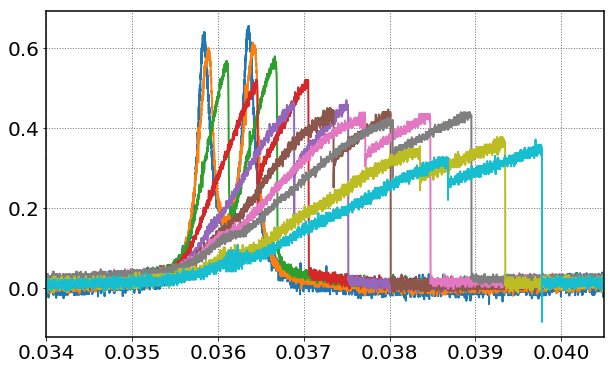

In [64]:
# data_dir='C:/Users/Lab/agilent_scope_data'
# set_name='highVrb_ds1'
# set_dir = path.normpath(path.join(data_dir,set_name))
# t,V = load_scope_trace(name='Vrb{:1.2f}_Vvca{:1.3f}_Vgain*'.format(Vrb_highVrb_ds1[0].m,V_VCA_highVrb_ds1[8].m),data_dir=set_dir)

%matplotlib inline

fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
#ax1 = fig.add_subplot(212)

for Pind,PP in enumerate(V_VCA_highVrb_ds1):
    n_ratio = 300
    ax0.plot(data['t'],data['R'][:,Pind,0])

# Pind = 9
# ax0.plot(data['t'][2:],data['V_P_T'][:,Pind,0],color=f'C{Pind}')
# ax1.plot(data['t'][2:],np.diff(data['V_P_T'][:,Pind,0],2),color=f'C{Pind}')


ax0.set_xlim([0.034,0.0405])

In [143]:
from scipy.signal import find_peaks, find_peaks_cwt

peak_inds00 = []
peak_inds01 = []
peak_inds10 = []
peak_inds11 = []


for Pind,PP in enumerate(V_VCA_highVrb_ds1):
    height=.13
    threshold=None
    distance=100
    peak_inds00.append(find_peaks(data['V_P_T'][:,Pind,0],height=height,threshold=threshold,distance=distance)[0])

    height=.01
    threshold=None
    distance=100
    peak_inds10.append(find_peaks(np.diff(data['V_P_T'][:,Pind,0],1),height=height,threshold=threshold,distance=distance)[0])

    height=.13
    threshold=None
    distance=100
    peak_inds01.append(find_peaks(data['V_I_TPA'][:,Pind,0],height=height,threshold=threshold,distance=distance)[0])

    height=.2
    threshold=None
    distance=30
    peak_inds11.append(find_peaks(-1*np.diff(data['V_I_TPA'][:,Pind,0],1)/max(abs(np.diff(data['V_I_TPA'][:,Pind,0],1))),height=height,threshold=threshold,distance=distance)[0])

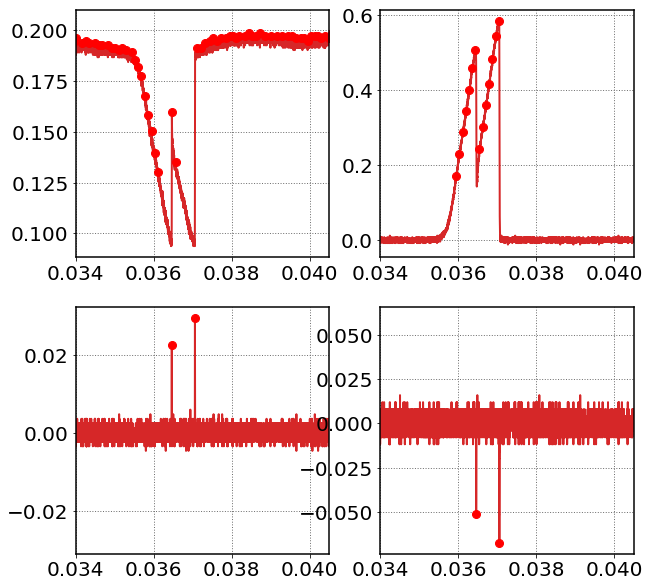

In [144]:
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax00 = fig.add_subplot(221)
ax10 = fig.add_subplot(223)

ax01 = fig.add_subplot(222)
ax11 = fig.add_subplot(224)



Pind = 3
ax00.plot(data['t'],data['V_P_T'][:,Pind,0],color=f'C{Pind}')
ax00.plot(np.array([data['t'][ind].m for ind in peak_inds00[Pind].astype(int)]),np.array([data['V_P_T'][:,Pind,0][ind].m for ind in peak_inds00[Pind].astype(int)]),'ro')
ax10.plot(data['t'][1:],np.diff(data['V_P_T'][:,Pind,0],1),color=f'C{Pind}')
ax10.plot(np.array([data['t'][ind].m for ind in peak_inds10[Pind].astype(int)]),np.array([np.diff(data['V_P_T'][:,Pind,0],1)[ind] for ind in peak_inds10[Pind].astype(int)]),'ro')

ax01.plot(data['t'],data['V_I_TPA'][:,Pind,0],color=f'C{Pind}')
ax01.plot(np.array([data['t'][ind].m for ind in peak_inds01[Pind].astype(int)]),np.array([data['V_I_TPA'][:,Pind,0][ind].m for ind in peak_inds01[Pind].astype(int)]),'ro')
ax11.plot(data['t'][1:],np.diff(data['V_I_TPA'][:,Pind,0],1),color=f'C{Pind}')
ax11.plot(np.array([data['t'][ind].m for ind in peak_inds11[Pind].astype(int)]),np.array([np.diff(data['V_I_TPA'][:,Pind,0],1)[ind] for ind in peak_inds11[Pind].astype(int)]),'ro')

for a in [ax00,ax10,ax01,ax11]:
    a.set_xlim([0.034,0.0405])

In [213]:
Pind = 8
t_full = data['t']
V_full = data['V_I_TPA'][:,Pind,0]
V_mod_full = data['V_mod'][:,Pind,0]

In [224]:
# prototype function to find first jump in thermal hysteresis loop, then reprogram frequency sweep settings
# to stop between the two jumps and turn back, thus accessing the "tristability"
from scipy.signal import find_peaks

def find_first_jump(t_full,V_full,V_mod_full,tlim0=0.034*u.second,tlim1=0.041*u.second):
    t = t_full[(t_full>tlim0)*(t_full<tlim1)]
    V = V_full[(t_full>tlim0)*(t_full<tlim1)]
    V_mod = V_mod_full[(t_full>tlim0)*(t_full<tlim1)]
    height=.2
    distance=30
    x = -1*np.diff(V,1)/max(abs(np.diff(V,1))) # array in which peaks will be sought
    peak_inds = find_peaks(x,height=height,distance=distance)[0].astype(int)
    ind_peak1 = peak_inds[np.argsort(np.array([x[ind] for ind in peak_inds]))[-2]] # index of second largest peak in function (should be first in time)
    ind_peak2 = peak_inds[np.argsort(np.array([x[ind] for ind in peak_inds]))[-1]] # index of largest peak in function (should be second in time)
#     t_peak1 = t[ind_peak1] # time of second largest peak in function (should be first in time)
#     t_peak2 = t[ind_peak2] # time of largest peak in function (should be second in time)
    #ind_target = int((ind_peak1 + ind_peak2)/2)
    V_mod_target =( V_mod[ind_peak1] + V_mod[ind_peak2])/2.0
    return V_mod_target

# np.array([t[ii].m for ii in np.argsort(np.array([x[ind].m for ind in peak_inds]))])

In [225]:
V_mod_target = find_first_jump(t_full,V_full,V_mod_full) # -0.0146 volt


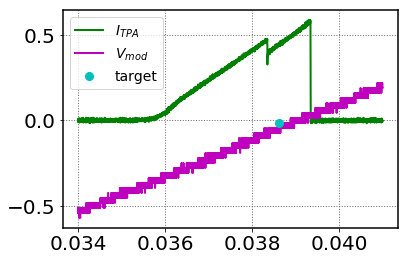

In [226]:
tlim0=0.034*u.second
tlim1=0.041*u.second
t_full_target = t_full[(t_full>tlim0)*(t_full<tlim1)][int(np.argmin(abs(V_mod_full[(t_full>tlim0)*(t_full<tlim1)].m - V_mod_target.m)))]
plt.plot(t_full[(t_full>tlim0)*(t_full<tlim1)],V_full[(t_full>tlim0)*(t_full<tlim1)],'g',label='$I_{TPA}$')
plt.plot(t_full[(t_full>tlim0)*(t_full<tlim1)],V_mod_full[(t_full>tlim0)*(t_full<tlim1)],'m',label='$V_{mod}$')
plt.plot(t_full_target,V_mod_target,'co',label='target')
plt.legend()

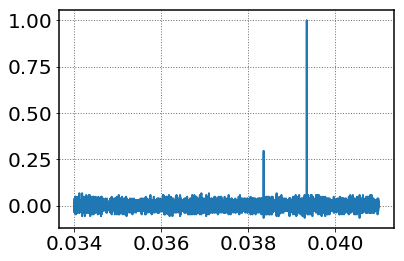